In [2]:
########################################################################################
# Davi Frossard, 2016                                                                  #
# VGG16 implementation in TensorFlow                                                   #
# Details:                                                                             #
# http://www.cs.toronto.edu/~frossard/post/vgg16/                                      #
#                                                                                      #
# Model from https://gist.github.com/ksimonyan/211839e770f7b538e2d8#file-readme-md     #
# Weights from Caffe converted using https://github.com/ethereon/caffe-tensorflow      #
########################################################################################
import tensorflow as tf
import numpy as np
from scipy.misc import imread, imresize
import os



def consin(p=[],q=[]):

    # 获取 p、q 数组的维度信息
    shape_n = len(p)

    # 求出p，q的乘积和
    sum_xy = sum([p[i]*q[i] for i in range(shape_n)])
    # 分别求出p，q的平方和
    sum_x_sq = sum([p[i]**2 for i in range(shape_n)])
    sum_y_sq = sum([q[i]**2 for i in range(shape_n)])
    # 求出consin相关系数
    up = sum_xy
    down = (sum_x_sq*sum_y_sq)**.5
    # 若down为零则不能计算，return 0
    if down == 0 :return 0

    result = up/down
    return result
def file_name(file_dir):   
      L=[]
      for root, dirs, files in os.walk(file_dir):  
          for file in files:  
              if os.path.splitext(file)[1] == '.jpg':  
                 L.append(os.path.join(root, file))  
      return L




class vgg16:
    def __init__(self, imgs, weights=None, sess=None):
        self.imgs = imgs
        self.convlayers()
        self.fc_layers()
        self.probs = tf.nn.softmax(self.fc3l)
        if weights is not None and sess is not None:
            self.load_weights(weights, sess)


    def convlayers(self):
        self.parameters = []

        # zero-mean input
        with tf.name_scope('preprocess') as scope:
            mean = tf.constant([123.68, 116.779, 103.939], dtype=tf.float32, shape=[1, 1, 1, 3], name='img_mean')
            images = self.imgs-mean

        # conv1_1
        with tf.name_scope('conv1_1') as scope:
            kernel = tf.Variable(tf.truncated_normal([3, 3, 3, 64], dtype=tf.float32,
                                                     stddev=1e-1), name='weights')
            conv = tf.nn.conv2d(images, kernel, [1, 1, 1, 1], padding='SAME')
            biases = tf.Variable(tf.constant(0.0, shape=[64], dtype=tf.float32),
                                 trainable=True, name='biases')
            out = tf.nn.bias_add(conv, biases)
            self.conv1_1 = tf.nn.relu(out, name=scope)
            self.parameters += [kernel, biases]

        # conv1_2
        with tf.name_scope('conv1_2') as scope:
            kernel = tf.Variable(tf.truncated_normal([3, 3, 64, 64], dtype=tf.float32,
                                                     stddev=1e-1), name='weights')
            conv = tf.nn.conv2d(self.conv1_1, kernel, [1, 1, 1, 1], padding='SAME')
            biases = tf.Variable(tf.constant(0.0, shape=[64], dtype=tf.float32),
                                 trainable=True, name='biases')
            out = tf.nn.bias_add(conv, biases)
            self.conv1_2 = tf.nn.relu(out, name=scope)
            self.parameters += [kernel, biases]

        # pool1
        self.pool1 = tf.nn.max_pool(self.conv1_2,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME',
                               name='pool1')

        # conv2_1
        with tf.name_scope('conv2_1') as scope:
            kernel = tf.Variable(tf.truncated_normal([3, 3, 64, 128], dtype=tf.float32,
                                                     stddev=1e-1), name='weights')
            conv = tf.nn.conv2d(self.pool1, kernel, [1, 1, 1, 1], padding='SAME')
            biases = tf.Variable(tf.constant(0.0, shape=[128], dtype=tf.float32),
                                 trainable=True, name='biases')
            out = tf.nn.bias_add(conv, biases)
            self.conv2_1 = tf.nn.relu(out, name=scope)
            self.parameters += [kernel, biases]

        # conv2_2
        with tf.name_scope('conv2_2') as scope:
            kernel = tf.Variable(tf.truncated_normal([3, 3, 128, 128], dtype=tf.float32,
                                                     stddev=1e-1), name='weights')
            conv = tf.nn.conv2d(self.conv2_1, kernel, [1, 1, 1, 1], padding='SAME')
            biases = tf.Variable(tf.constant(0.0, shape=[128], dtype=tf.float32),
                                 trainable=True, name='biases')
            out = tf.nn.bias_add(conv, biases)
            self.conv2_2 = tf.nn.relu(out, name=scope)
            self.parameters += [kernel, biases]

        # pool2
        self.pool2 = tf.nn.max_pool(self.conv2_2,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME',
                               name='pool2')

        # conv3_1
        with tf.name_scope('conv3_1') as scope:
            kernel = tf.Variable(tf.truncated_normal([3, 3, 128, 256], dtype=tf.float32,
                                                     stddev=1e-1), name='weights')
            conv = tf.nn.conv2d(self.pool2, kernel, [1, 1, 1, 1], padding='SAME')
            biases = tf.Variable(tf.constant(0.0, shape=[256], dtype=tf.float32),
                                 trainable=True, name='biases')
            out = tf.nn.bias_add(conv, biases)
            self.conv3_1 = tf.nn.relu(out, name=scope)
            self.parameters += [kernel, biases]

        # conv3_2
        with tf.name_scope('conv3_2') as scope:
            kernel = tf.Variable(tf.truncated_normal([3, 3, 256, 256], dtype=tf.float32,
                                                     stddev=1e-1), name='weights')
            conv = tf.nn.conv2d(self.conv3_1, kernel, [1, 1, 1, 1], padding='SAME')
            biases = tf.Variable(tf.constant(0.0, shape=[256], dtype=tf.float32),
                                 trainable=True, name='biases')
            out = tf.nn.bias_add(conv, biases)
            self.conv3_2 = tf.nn.relu(out, name=scope)
            self.parameters += [kernel, biases]

        # conv3_3
        with tf.name_scope('conv3_3') as scope:
            kernel = tf.Variable(tf.truncated_normal([3, 3, 256, 256], dtype=tf.float32,
                                                     stddev=1e-1), name='weights')
            conv = tf.nn.conv2d(self.conv3_2, kernel, [1, 1, 1, 1], padding='SAME')
            biases = tf.Variable(tf.constant(0.0, shape=[256], dtype=tf.float32),
                                 trainable=True, name='biases')
            out = tf.nn.bias_add(conv, biases)
            self.conv3_3 = tf.nn.relu(out, name=scope)
            self.parameters += [kernel, biases]

        # pool3
        self.pool3 = tf.nn.max_pool(self.conv3_3,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME',
                               name='pool3')

        # conv4_1
        with tf.name_scope('conv4_1') as scope:
            kernel = tf.Variable(tf.truncated_normal([3, 3, 256, 512], dtype=tf.float32,
                                                     stddev=1e-1), name='weights')
            conv = tf.nn.conv2d(self.pool3, kernel, [1, 1, 1, 1], padding='SAME')
            biases = tf.Variable(tf.constant(0.0, shape=[512], dtype=tf.float32),
                                 trainable=True, name='biases')
            out = tf.nn.bias_add(conv, biases)
            self.conv4_1 = tf.nn.relu(out, name=scope)
            self.parameters += [kernel, biases]

        # conv4_2
        with tf.name_scope('conv4_2') as scope:
            kernel = tf.Variable(tf.truncated_normal([3, 3, 512, 512], dtype=tf.float32,
                                                     stddev=1e-1), name='weights')
            conv = tf.nn.conv2d(self.conv4_1, kernel, [1, 1, 1, 1], padding='SAME')
            biases = tf.Variable(tf.constant(0.0, shape=[512], dtype=tf.float32),
                                 trainable=True, name='biases')
            out = tf.nn.bias_add(conv, biases)
            self.conv4_2 = tf.nn.relu(out, name=scope)
            self.parameters += [kernel, biases]

        # conv4_3
        with tf.name_scope('conv4_3') as scope:
            kernel = tf.Variable(tf.truncated_normal([3, 3, 512, 512], dtype=tf.float32,
                                                     stddev=1e-1), name='weights')
            conv = tf.nn.conv2d(self.conv4_2, kernel, [1, 1, 1, 1], padding='SAME')
            biases = tf.Variable(tf.constant(0.0, shape=[512], dtype=tf.float32),
                                 trainable=True, name='biases')
            out = tf.nn.bias_add(conv, biases)
            self.conv4_3 = tf.nn.relu(out, name=scope)
            self.parameters += [kernel, biases]

        # pool4
        self.pool4 = tf.nn.max_pool(self.conv4_3,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME',
                               name='pool4')

        # conv5_1
        with tf.name_scope('conv5_1') as scope:
            kernel = tf.Variable(tf.truncated_normal([3, 3, 512, 512], dtype=tf.float32,
                                                     stddev=1e-1), name='weights')
            conv = tf.nn.conv2d(self.pool4, kernel, [1, 1, 1, 1], padding='SAME')
            biases = tf.Variable(tf.constant(0.0, shape=[512], dtype=tf.float32),
                                 trainable=True, name='biases')
            out = tf.nn.bias_add(conv, biases)
            self.conv5_1 = tf.nn.relu(out, name=scope)
            self.parameters += [kernel, biases]

        # conv5_2
        with tf.name_scope('conv5_2') as scope:
            kernel = tf.Variable(tf.truncated_normal([3, 3, 512, 512], dtype=tf.float32,
                                                     stddev=1e-1), name='weights')
            conv = tf.nn.conv2d(self.conv5_1, kernel, [1, 1, 1, 1], padding='SAME')
            biases = tf.Variable(tf.constant(0.0, shape=[512], dtype=tf.float32),
                                 trainable=True, name='biases')
            out = tf.nn.bias_add(conv, biases)
            self.conv5_2 = tf.nn.relu(out, name=scope)
            self.parameters += [kernel, biases]

        # conv5_3
        with tf.name_scope('conv5_3') as scope:
            kernel = tf.Variable(tf.truncated_normal([3, 3, 512, 512], dtype=tf.float32,
                                                     stddev=1e-1), name='weights')
            conv = tf.nn.conv2d(self.conv5_2, kernel, [1, 1, 1, 1], padding='SAME')
            biases = tf.Variable(tf.constant(0.0, shape=[512], dtype=tf.float32),
                                 trainable=True, name='biases')
            out = tf.nn.bias_add(conv, biases)
            self.conv5_3 = tf.nn.relu(out, name=scope)
            self.parameters += [kernel, biases]

        # pool5
        self.pool5 = tf.nn.max_pool(self.conv5_3,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME',
                               name='pool4')

    def fc_layers(self):
        # fc1
        with tf.name_scope('fc1') as scope:
            shape = int(np.prod(self.pool5.get_shape()[1:]))
            fc1w = tf.Variable(tf.truncated_normal([shape, 4096],
                                                         dtype=tf.float32,
                                                         stddev=1e-1), name='weights')
            fc1b = tf.Variable(tf.constant(1.0, shape=[4096], dtype=tf.float32),
                                 trainable=True, name='biases')
            pool5_flat = tf.reshape(self.pool5, [-1, shape])
            fc1l = tf.nn.bias_add(tf.matmul(pool5_flat, fc1w), fc1b)
            self.fc1 = tf.nn.relu(fc1l)
            self.parameters += [fc1w, fc1b]

        # fc2
        with tf.name_scope('fc2') as scope:
            fc2w = tf.Variable(tf.truncated_normal([4096, 4096],
                                                         dtype=tf.float32,
                                                         stddev=1e-1), name='weights')
            fc2b = tf.Variable(tf.constant(1.0, shape=[4096], dtype=tf.float32),
                                 trainable=True, name='biases')
            fc2l = tf.nn.bias_add(tf.matmul(self.fc1, fc2w), fc2b)
            self.fc2 = tf.nn.relu(fc2l)
            self.parameters += [fc2w, fc2b]

        # fc3
        with tf.name_scope('fc3') as scope:
            fc3w = tf.Variable(tf.truncated_normal([4096, 1000],
                                                         dtype=tf.float32,
                                                         stddev=1e-1), name='weights')
            fc3b = tf.Variable(tf.constant(1.0, shape=[1000], dtype=tf.float32),
                                 trainable=True, name='biases')
            self.fc3l = tf.nn.bias_add(tf.matmul(self.fc2, fc3w), fc3b)
            self.parameters += [fc3w, fc3b]

    def load_weights(self, weight_file, sess):
        weights = np.load(weight_file)
        keys = sorted(weights.keys())
        for i, k in enumerate(keys):
            print (i, k, np.shape(weights[k]))
            sess.run(self.parameters[i].assign(weights[k]))

if __name__ == '__main__':
    sess = tf.Session()
    imgs = tf.placeholder(tf.float32, [None, 224, 224, 3])
    vgg = vgg16(imgs, 'vgg16_weights.npz', sess)

    # img1 = imread('3.jpg', mode='RGB')
    # img1 = imresize(img1, (224, 224))
    #
    # img2 = imread('6.jpg', mode='RGB')
    # img2 = imresize(img2, (224, 224))
    #
    # img7 = imread('7.jpg', mode='RGB')
    # img7 = imresize(img7, (224, 224))
    #
    # img8 = imread('8.jpg', mode='RGB')
    # img8 = imresize(img8, (224, 224))
    #
    # # prob = sess.run(vgg.probs, feed_dict={vgg.imgs: [img1]})[0]
    # # conv5_3 = sess.run(vgg.conv5_3, feed_dict={vgg.imgs: [img1]})[0]
    # # pool5_value = sess.run(vgg.pool5, feed_dict={vgg.imgs: [img1]})[0]
    #
    # ##########################
    # fc1_value1 = sess.run(vgg.fc1, feed_dict={vgg.imgs: [img1]})[0]
    # fc1_value2 = sess.run(vgg.fc1, feed_dict={vgg.imgs: [img2]})[0]
    #
    # fc1_value7 = sess.run(vgg.fc1, feed_dict={vgg.imgs: [img7]})[0]
    # fc1_value8 = sess.run(vgg.fc1, feed_dict={vgg.imgs: [img8]})[0]
    #
    # udis1_2 = np.sqrt(np.sum(np.square(fc1_value1 - fc1_value2)))
    # udis2_3 = np.sqrt(np.sum(np.square(fc1_value2 - fc1_value7)))
    # udis7_8 = np.sqrt(np.sum(np.square(fc1_value7 - fc1_value8)))

    num_image_zhang = 0
    list_u_dis = []
    list_consin_result = []
    
    for i in range(len(os.listdir('./ImageData/positexample/')) - 1):
        list_vercrot = []
        num_image_zhang = num_image_zhang + 1
        all_same_image_path = file_name('./ImageData/positexample/'+ 'all_image' + str(num_image_zhang) + '.jpg')
        for path in all_same_image_path:
            print(path)
            img_raw = imread(path)
            img_size224 = imresize(img_raw, (224, 224))
            fc1_value_now = sess.run(vgg.fc1, feed_dict={vgg.imgs: [img_size224]})[0]
            list_vercrot.append(list(fc1_value_now))
        np_vercrot = np.array(list_vercrot)
        for j_v in range(len(list_vercrot) - 1):
            print(j_v)
            u_dis = np.sqrt(np.sum(np.square(np_vercrot[j_v] - np_vercrot[j_v+1])))
            consin_result = consin(np_vercrot[j_v],np_vercrot[j_v+1])
            list_u_dis.append(u_dis)
            list_consin_result.append(consin_result)
            
                
                
            # np_all_images = np.row_stack(np_all_images,fc1_value_now)
            # print(type(np_all_images))
            # print(len(np_all_images))
            # print(type(fc1_value_now))
            # print(fc1_value_now)
            
            
        # print(len(os.listdir('./ImageData/positexample/')) - 1)
        
        
        
        
        
    '''    
        
        img_raw = imread('ImageData/counterexample/' +'counterexample'+ str(num_image_zhang) + '.jpg', mode='RGB')
        img_size224 = imresize(img_raw, (224, 224))
        print("./all_images/" + str(num_image_zhang) + ".jpg")

        fc1_value_now = sess.run(vgg.fc1, feed_dict={vgg.imgs: [img_size224]})[0]
        if num_image_zhang != 1:
            img_raw_last =  imread(r"ImageData/counterexample/" +"counterexample"+ str(num_image_zhang -1 ) + ".jpg", mode='RGB')
            img_size224_last = imresize(img_raw_last, (224, 224))
            fc1_value_last = sess.run(vgg.fc1, feed_dict={vgg.imgs: [img_size224_last]})[0]

            # 计算欧式距离
            u_dis = np.sqrt(np.sum(np.square(fc1_value_now - fc1_value_last)))
            consin_result = consin(fc1_value_now,fc1_value_last)
            list_u_dis.append(u_dis)
            list_consin_result.append(consin_result)
            print( "当前照片是 ",str(num_image_zhang) + ".jpg","与照片",str(num_image_zhang - 1) + ".jpg    ","欧式距离：   ",u_dis,"      相似度：  ",consin_result)

'''



    # print()
    ###################################
    # preds = (np.argsort(prob)[::-1])[0:5]
    # for p in preds:
    #     print (class_names[p], prob[p])


0 conv1_1_W (3, 3, 3, 64)
1 conv1_1_b (64,)
2 conv1_2_W (3, 3, 64, 64)
3 conv1_2_b (64,)
4 conv2_1_W (3, 3, 64, 128)
5 conv2_1_b (128,)
6 conv2_2_W (3, 3, 128, 128)
7 conv2_2_b (128,)
8 conv3_1_W (3, 3, 128, 256)
9 conv3_1_b (256,)
10 conv3_2_W (3, 3, 256, 256)
11 conv3_2_b (256,)
12 conv3_3_W (3, 3, 256, 256)
13 conv3_3_b (256,)
14 conv4_1_W (3, 3, 256, 512)
15 conv4_1_b (512,)
16 conv4_2_W (3, 3, 512, 512)
17 conv4_2_b (512,)
18 conv4_3_W (3, 3, 512, 512)
19 conv4_3_b (512,)
20 conv5_1_W (3, 3, 512, 512)
21 conv5_1_b (512,)
22 conv5_2_W (3, 3, 512, 512)
23 conv5_2_b (512,)
24 conv5_3_W (3, 3, 512, 512)
25 conv5_3_b (512,)
26 fc6_W (25088, 4096)
27 fc6_b (4096,)
28 fc7_W (4096, 4096)
29 fc7_b (4096,)
30 fc8_W (4096, 1000)
31 fc8_b (1000,)
./ImageData/positexample/all_image1.jpg/twamark_shortwhitecen.jpg


/root/anaconda3/envs/tensorflow-3.5/lib/python3.5/site-packages/ipykernel_launcher.py:326: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/root/anaconda3/envs/tensorflow-3.5/lib/python3.5/site-packages/ipykernel_launcher.py:327: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


./ImageData/positexample/all_image1.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image1.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image1.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image1.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image1.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image1.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image1.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image1.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image1.jpg/1rotate.jpg
./ImageData/positexample/all_image1.jpg/brightenhance.jpg
./ImageData/positexample/all_image1.jpg/transpose2.jpg
./ImageData/positexample/all_image1.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image1.jpg/4rotate.jpg
./ImageData/positexample/all_image1.jpg/all_image1.jpg
./ImageData/positexample/all_image1.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image1.jpg/twamark_shortblacklt.jpg
./Imag

./ImageData/positexample/all_image2.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image2.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image2.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image2.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image2.jpg/sharpenhance.jpg
./ImageData/positexample/all_image2.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image2.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image2.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image2.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image2.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image3.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image3.jpg/twamark_shortyellowrt.jpg
./ImageData/positex

./ImageData/positexample/all_image4.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image4.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image4.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image4.jpg/2rotate.jpg
./ImageData/positexample/all_image4.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image4.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image4.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image4.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image4.jpg/contrastenhance.jpg
./ImageData/positexample/all_image4.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image4.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image4.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image4.jpg/gray.jpg
./ImageData/positexample/all_image4.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image4.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image4.jpg/twamark_shortgre

./ImageData/positexample/all_image6.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image6.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image6.jpg/transpose3.jpg
./ImageData/positexample/all_image6.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image6.jpg/colorenhance.jpg
./ImageData/positexample/all_image6.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image6.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image6.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image6.jpg/3rotate.jpg
./ImageData/positexample/all_image6.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image6.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image6.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image6.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image6.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image6.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image6.jpg/t

./ImageData/positexample/all_image8.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image8.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image8.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image8.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image8.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image8.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image8.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image8.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image8.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image8.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image8.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image8.jpg/transpose1.jpg
./ImageData/positexample/all_image8.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image8.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image8.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all

35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image10.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image10.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image10.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image10.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image10.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image10.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image10.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image10.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image10.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image10.jpg/1rotate.jpg
./ImageData/positexample/all_image10.jpg/brightenhance.jpg
./ImageData/positexample/all_image10.jpg/transpose2.jpg
./ImageData/positexample/all_image10.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image10.jpg/4rotate.jpg
./ImageData/p

./ImageData/positexample/all_image11.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image11.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image11.jpg/gray.jpg
./ImageData/positexample/all_image11.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image11.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image11.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image11.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image11.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image11.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image11.jpg/sharpenhance.jpg
./ImageData/positexample/all_image11.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image11.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image11.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image11.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image11.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10

./ImageData/positexample/all_image13.jpg/3rotate.jpg
./ImageData/positexample/all_image13.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image13.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image13.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image13.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image13.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image13.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image13.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image13.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image13.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image13.jpg/2rotate.jpg
./ImageData/positexample/all_image13.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image13.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image13.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image13.jpg/twamark_longblacktop.jpg
./ImageData/positexample/al

./ImageData/positexample/all_image15.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image15.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image15.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image15.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image15.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image15.jpg/transpose1.jpg
./ImageData/positexample/all_image15.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image15.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image15.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image15.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image15.jpg/transpose3.jpg
./ImageData/positexample/all_image15.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image15.jpg/colorenhance.jpg
./ImageData/positexample/all_image15.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image15.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample

./ImageData/positexample/all_image17.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image17.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image17.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image17.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image17.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image17.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image17.jpg/1rotate.jpg
./ImageData/positexample/all_image17.jpg/brightenhance.jpg
./ImageData/positexample/all_image17.jpg/transpose2.jpg
./ImageData/positexample/all_image17.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image17.jpg/4rotate.jpg
./ImageData/positexample/all_image17.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image17.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image17.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image17.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image17.jpg/twamark_sh

./ImageData/positexample/all_image18.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image18.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image18.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image18.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image18.jpg/sharpenhance.jpg
./ImageData/positexample/all_image18.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image18.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image18.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image18.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image18.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image19.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image19.jpg/twamark_shortyellowrt.jpg
./Image

./ImageData/positexample/all_image20.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image20.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image20.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image20.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image20.jpg/2rotate.jpg
./ImageData/positexample/all_image20.jpg/all_image20.jpg
./ImageData/positexample/all_image20.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image20.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image20.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image20.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image20.jpg/contrastenhance.jpg
./ImageData/positexample/all_image20.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image20.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image20.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image20.jpg/gray.jpg
./ImageData/positexample/all_image20.jpg/twamark_s

./ImageData/positexample/all_image22.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image22.jpg/transpose1.jpg
./ImageData/positexample/all_image22.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image22.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image22.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image22.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image22.jpg/transpose3.jpg
./ImageData/positexample/all_image22.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image22.jpg/colorenhance.jpg
./ImageData/positexample/all_image22.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image22.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image22.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image22.jpg/3rotate.jpg
./ImageData/positexample/all_image22.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image22.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image22

./ImageData/positexample/all_image24.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image24.jpg/all_image24.jpg
./ImageData/positexample/all_image24.jpg/1rotate.jpg
./ImageData/positexample/all_image24.jpg/brightenhance.jpg
./ImageData/positexample/all_image24.jpg/transpose2.jpg
./ImageData/positexample/all_image24.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image24.jpg/4rotate.jpg
./ImageData/positexample/all_image24.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image24.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image24.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image24.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image24.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image24.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image24.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image24.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image24.jpg/twamark_shortbluerb

./ImageData/positexample/all_image25.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image25.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image25.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image25.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image25.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image26.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image26.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image26.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image26.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image26.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image26.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image26.jpg/twamark_shortcyanrb.jpg
./Im

./ImageData/positexample/all_image27.jpg/2rotate.jpg
./ImageData/positexample/all_image27.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image27.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image27.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image27.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image27.jpg/contrastenhance.jpg
./ImageData/positexample/all_image27.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image27.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image27.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image27.jpg/gray.jpg
./ImageData/positexample/all_image27.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image27.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image27.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image27.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image27.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image27.

./ImageData/positexample/all_image29.jpg/transpose3.jpg
./ImageData/positexample/all_image29.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image29.jpg/colorenhance.jpg
./ImageData/positexample/all_image29.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image29.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image29.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image29.jpg/3rotate.jpg
./ImageData/positexample/all_image29.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image29.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image29.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image29.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image29.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image29.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image29.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image29.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_i

./ImageData/positexample/all_image31.jpg/4rotate.jpg
./ImageData/positexample/all_image31.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image31.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image31.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image31.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image31.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image31.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image31.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image31.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image31.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image31.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image31.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image31.jpg/transpose1.jpg
./ImageData/positexample/all_image31.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image31.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_

./ImageData/positexample/all_image32.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image33.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image33.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image33.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image33.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image33.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image33.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image33.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image33.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image33.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image33.jpg/1rotate.jpg
./ImageData/positexample/all_image33.jpg/brightenhance.jpg
./ImageData/positexample/all

./ImageData/positexample/all_image34.jpg/contrastenhance.jpg
./ImageData/positexample/all_image34.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image34.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image34.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image34.jpg/gray.jpg
./ImageData/positexample/all_image34.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image34.jpg/all_image34.jpg
./ImageData/positexample/all_image34.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image34.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image34.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image34.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image34.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image34.jpg/sharpenhance.jpg
./ImageData/positexample/all_image34.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image34.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image34.jpg

./ImageData/positexample/all_image36.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image36.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image36.jpg/3rotate.jpg
./ImageData/positexample/all_image36.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image36.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image36.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image36.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image36.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image36.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image36.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image36.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image36.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image36.jpg/2rotate.jpg
./ImageData/positexample/all_image36.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image36.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/a

./ImageData/positexample/all_image38.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image38.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image38.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image38.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image38.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image38.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image38.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image38.jpg/transpose1.jpg
./ImageData/positexample/all_image38.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image38.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image38.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image38.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image38.jpg/transpose3.jpg
./ImageData/positexample/all_image38.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image38.jpg/colorenhance.jpg
./ImageData/positexample/all_

./ImageData/positexample/all_image40.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image40.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image40.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image40.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image40.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image40.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image40.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image40.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image40.jpg/all_image40.jpg
./ImageData/positexample/all_image40.jpg/1rotate.jpg
./ImageData/positexample/all_image40.jpg/brightenhance.jpg
./ImageData/positexample/all_image40.jpg/transpose2.jpg
./ImageData/positexample/all_image40.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image40.jpg/4rotate.jpg
./ImageData/positexample/all_image40.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image40.jpg/twamark_shortb

./ImageData/positexample/all_image41.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image41.jpg/all_image41.jpg
./ImageData/positexample/all_image41.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image41.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image41.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image41.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image41.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image41.jpg/sharpenhance.jpg
./ImageData/positexample/all_image41.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image41.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image41.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image41.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image41.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51


./ImageData/positexample/all_image43.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image43.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image43.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image43.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image43.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image43.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image43.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image43.jpg/2rotate.jpg
./ImageData/positexample/all_image43.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image43.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image43.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image43.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image43.jpg/contrastenhance.jpg
./ImageData/positexample/all_image43.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image43.jpg/twamark_longcyantop.jpg
./ImageData/positexample

./ImageData/positexample/all_image45.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image45.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image45.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image45.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image45.jpg/transpose1.jpg
./ImageData/positexample/all_image45.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image45.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image45.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image45.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image45.jpg/transpose3.jpg
./ImageData/positexample/all_image45.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image45.jpg/colorenhance.jpg
./ImageData/positexample/all_image45.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image45.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image45.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/

./ImageData/positexample/all_image47.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image47.jpg/all_image47.jpg
./ImageData/positexample/all_image47.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image47.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image47.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image47.jpg/1rotate.jpg
./ImageData/positexample/all_image47.jpg/brightenhance.jpg
./ImageData/positexample/all_image47.jpg/transpose2.jpg
./ImageData/positexample/all_image47.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image47.jpg/4rotate.jpg
./ImageData/positexample/all_image47.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image47.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image47.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image47.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image47.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image47.jpg/twamark_shortbluelb

./ImageData/positexample/all_image48.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image48.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image48.jpg/sharpenhance.jpg
./ImageData/positexample/all_image48.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image48.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image48.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image48.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image48.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image49.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image49.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image49.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image49.jpg/twamark_shortpurplelb.jpg
./Image

./ImageData/positexample/all_image50.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image50.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image50.jpg/2rotate.jpg
./ImageData/positexample/all_image50.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image50.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image50.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image50.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image50.jpg/contrastenhance.jpg
./ImageData/positexample/all_image50.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image50.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image50.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image50.jpg/all_image50.jpg
./ImageData/positexample/all_image50.jpg/gray.jpg
./ImageData/positexample/all_image50.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image50.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image50.jpg/twamark_s

./ImageData/positexample/all_image52.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image52.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image52.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image52.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image52.jpg/transpose3.jpg
./ImageData/positexample/all_image52.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image52.jpg/colorenhance.jpg
./ImageData/positexample/all_image52.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image52.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image52.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image52.jpg/3rotate.jpg
./ImageData/positexample/all_image52.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image52.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image52.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image52.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/a

./ImageData/positexample/all_image54.jpg/brightenhance.jpg
./ImageData/positexample/all_image54.jpg/transpose2.jpg
./ImageData/positexample/all_image54.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image54.jpg/4rotate.jpg
./ImageData/positexample/all_image54.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image54.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image54.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image54.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image54.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image54.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image54.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image54.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image54.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image54.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image54.jpg/all_image54.jpg
./ImageData/positexample/all_image54.jpg/twama

./ImageData/positexample/all_image55.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image55.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image55.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image55.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image56.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image56.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image56.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image56.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image56.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image56.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image56.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image56.jpg/twamark_shortyellowcen.jpg
./Im

./ImageData/positexample/all_image57.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image57.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image57.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image57.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image57.jpg/contrastenhance.jpg
./ImageData/positexample/all_image57.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image57.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image57.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image57.jpg/gray.jpg
./ImageData/positexample/all_image57.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image57.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image57.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image57.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image57.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image57.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexa

./ImageData/positexample/all_image59.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image59.jpg/colorenhance.jpg
./ImageData/positexample/all_image59.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image59.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image59.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image59.jpg/3rotate.jpg
./ImageData/positexample/all_image59.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image59.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image59.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image59.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image59.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image59.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image59.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image59.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image59.jpg/twamark_longwhitetop.jpg
./ImageData/positexa

./ImageData/positexample/all_image61.jpg/4rotate.jpg
./ImageData/positexample/all_image61.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image61.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image61.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image61.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image61.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image61.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image61.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image61.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image61.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image61.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image61.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image61.jpg/transpose1.jpg
./ImageData/positexample/all_image61.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image61.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image63.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image63.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image63.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image63.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image63.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image63.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image63.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image63.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image63.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image63.jpg/1rotate.jpg
./ImageData/positexample/all_image63.jpg/brightenhance.jpg
./ImageData/positexample/all_image63.jpg/transpose2.jpg
./ImageData/positexample/all_image63.

./ImageData/positexample/all_image64.jpg/contrastenhance.jpg
./ImageData/positexample/all_image64.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image64.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image64.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image64.jpg/gray.jpg
./ImageData/positexample/all_image64.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image64.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image64.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image64.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image64.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image64.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image64.jpg/sharpenhance.jpg
./ImageData/positexample/all_image64.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image64.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image64.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_i

./ImageData/positexample/all_image66.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image66.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image66.jpg/3rotate.jpg
./ImageData/positexample/all_image66.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image66.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image66.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image66.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image66.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image66.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image66.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image66.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image66.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image66.jpg/2rotate.jpg
./ImageData/positexample/all_image66.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image66.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/a

./ImageData/positexample/all_image68.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image68.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image68.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image68.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image68.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image68.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image68.jpg/all_image68.jpg
./ImageData/positexample/all_image68.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image68.jpg/transpose1.jpg
./ImageData/positexample/all_image68.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image68.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image68.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image68.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image68.jpg/transpose3.jpg
./ImageData/positexample/all_image68.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_i

./ImageData/positexample/all_image70.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image70.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image70.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image70.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image70.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image70.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image70.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image70.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image70.jpg/1rotate.jpg
./ImageData/positexample/all_image70.jpg/brightenhance.jpg
./ImageData/positexample/all_image70.jpg/transpose2.jpg
./ImageData/positexample/all_image70.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image70.jpg/4rotate.jpg
./ImageData/positexample/all_image70.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image70.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image70.jpg/twama

./ImageData/positexample/all_image71.jpg/gray.jpg
./ImageData/positexample/all_image71.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image71.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image71.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image71.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image71.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image71.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image71.jpg/sharpenhance.jpg
./ImageData/positexample/all_image71.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image71.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image71.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image71.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image71.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
5

./ImageData/positexample/all_image73.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image73.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image73.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image73.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image73.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image73.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image73.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image73.jpg/2rotate.jpg
./ImageData/positexample/all_image73.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image73.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image73.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image73.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image73.jpg/contrastenhance.jpg
./ImageData/positexample/all_image73.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image73.jpg/twamark_longcyantop.jpg
./ImageData/positexample

./ImageData/positexample/all_image75.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image75.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image75.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image75.jpg/transpose1.jpg
./ImageData/positexample/all_image75.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image75.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image75.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image75.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image75.jpg/transpose3.jpg
./ImageData/positexample/all_image75.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image75.jpg/colorenhance.jpg
./ImageData/positexample/all_image75.jpg/all_image75.jpg
./ImageData/positexample/all_image75.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image75.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image75.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image

./ImageData/positexample/all_image77.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image77.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image77.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image77.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image77.jpg/1rotate.jpg
./ImageData/positexample/all_image77.jpg/brightenhance.jpg
./ImageData/positexample/all_image77.jpg/transpose2.jpg
./ImageData/positexample/all_image77.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image77.jpg/4rotate.jpg
./ImageData/positexample/all_image77.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image77.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image77.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image77.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image77.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image77.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image77.jpg/twamark_lon

./ImageData/positexample/all_image78.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image78.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image78.jpg/sharpenhance.jpg
./ImageData/positexample/all_image78.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image78.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image78.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image78.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image78.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image79.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image79.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image79.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image79.jpg/twamark_shortpurplelb.jpg
./Image

./ImageData/positexample/all_image80.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image80.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image80.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image80.jpg/2rotate.jpg
./ImageData/positexample/all_image80.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image80.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image80.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image80.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image80.jpg/contrastenhance.jpg
./ImageData/positexample/all_image80.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image80.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image80.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image80.jpg/gray.jpg
./ImageData/positexample/all_image80.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image80.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image80.jpg/

./ImageData/positexample/all_image82.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image82.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image82.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image82.jpg/transpose3.jpg
./ImageData/positexample/all_image82.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image82.jpg/colorenhance.jpg
./ImageData/positexample/all_image82.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image82.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image82.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image82.jpg/3rotate.jpg
./ImageData/positexample/all_image82.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image82.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image82.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image82.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image82.jpg/twamark_longgreentop.jpg
./ImageData/positexample/

./ImageData/positexample/all_image84.jpg/brightenhance.jpg
./ImageData/positexample/all_image84.jpg/transpose2.jpg
./ImageData/positexample/all_image84.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image84.jpg/4rotate.jpg
./ImageData/positexample/all_image84.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image84.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image84.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image84.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image84.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image84.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image84.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image84.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image84.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image84.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image84.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image84

./ImageData/positexample/all_image85.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image85.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image85.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image85.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image86.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image86.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image86.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image86.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image86.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image86.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image86.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image86.jpg/twamark_shortyellowcen.jpg
./Im

./ImageData/positexample/all_image87.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image87.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image87.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image87.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image87.jpg/contrastenhance.jpg
./ImageData/positexample/all_image87.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image87.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image87.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image87.jpg/gray.jpg
./ImageData/positexample/all_image87.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image87.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image87.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image87.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image87.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image87.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexa

./ImageData/positexample/all_image89.jpg/transpose3.jpg
./ImageData/positexample/all_image89.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image89.jpg/colorenhance.jpg
./ImageData/positexample/all_image89.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image89.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image89.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image89.jpg/3rotate.jpg
./ImageData/positexample/all_image89.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image89.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image89.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image89.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image89.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image89.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image89.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image89.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_i

./ImageData/positexample/all_image91.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image91.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image91.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image91.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image91.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image91.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image91.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image91.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image91.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image91.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image91.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image91.jpg/transpose1.jpg
./ImageData/positexample/all_image91.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image91.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image91.jpg/twamark_longgreenmiddle.jpg
./ImageData/p

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image93.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image93.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image93.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image93.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image93.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image93.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image93.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image93.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image93.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image93.jpg/1rotate.jpg
./ImageData/positexample/all_image93.jpg/brightenhance.jpg
./ImageData/positexample/all_image93.jpg/transpose2.jpg
./ImageData/positexample/all_image93.

./ImageData/positexample/all_image94.jpg/contrastenhance.jpg
./ImageData/positexample/all_image94.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image94.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image94.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image94.jpg/gray.jpg
./ImageData/positexample/all_image94.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image94.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image94.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image94.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image94.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image94.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image94.jpg/sharpenhance.jpg
./ImageData/positexample/all_image94.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image94.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image94.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_i

./ImageData/positexample/all_image96.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image96.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image96.jpg/3rotate.jpg
./ImageData/positexample/all_image96.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image96.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image96.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image96.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image96.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image96.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image96.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image96.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image96.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image96.jpg/2rotate.jpg
./ImageData/positexample/all_image96.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image96.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/a

./ImageData/positexample/all_image98.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image98.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image98.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image98.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image98.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image98.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image98.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image98.jpg/transpose1.jpg
./ImageData/positexample/all_image98.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image98.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image98.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image98.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image98.jpg/transpose3.jpg
./ImageData/positexample/all_image98.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image98.jpg/colorenhance.jpg
./ImageData/positexample/all_

./ImageData/positexample/all_image100.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image100.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image100.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image100.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image100.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image100.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image100.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image100.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image100.jpg/1rotate.jpg
./ImageData/positexample/all_image100.jpg/brightenhance.jpg
./ImageData/positexample/all_image100.jpg/transpose2.jpg
./ImageData/positexample/all_image100.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image100.jpg/4rotate.jpg
./ImageData/positexample/all_image100.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image100.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_im

./ImageData/positexample/all_image101.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image101.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image101.jpg/gray.jpg
./ImageData/positexample/all_image101.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image101.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image101.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image101.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image101.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image101.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image101.jpg/sharpenhance.jpg
./ImageData/positexample/all_image101.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image101.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image101.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image101.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image101.jpg/twamark_shortbluert.jpg
0
1
2
3

./ImageData/positexample/all_image103.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image103.jpg/3rotate.jpg
./ImageData/positexample/all_image103.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image103.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image103.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image103.jpg/all_image103.jpg
./ImageData/positexample/all_image103.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image103.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image103.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image103.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image103.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image103.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image103.jpg/2rotate.jpg
./ImageData/positexample/all_image103.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image103.jpg/twamark_shortgreenrt.jpg
./ImageData/positexamp

./ImageData/positexample/all_image105.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image105.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image105.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image105.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image105.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image105.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image105.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image105.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image105.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image105.jpg/transpose1.jpg
./ImageData/positexample/all_image105.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image105.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image105.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image105.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image105.jpg/transpose3.jpg
./ImageD

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image107.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image107.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image107.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image107.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image107.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image107.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image107.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image107.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image107.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image107.jpg/1rotate.jpg
./ImageData/positexample/all_image107.jpg/brightenhance.jpg
./ImageData/positexample/all_image107.jpg/transpose2.jpg
./ImageData/positexample/

./ImageData/positexample/all_image108.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image108.jpg/contrastenhance.jpg
./ImageData/positexample/all_image108.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image108.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image108.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image108.jpg/gray.jpg
./ImageData/positexample/all_image108.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image108.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image108.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image108.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image108.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image108.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image108.jpg/sharpenhance.jpg
./ImageData/positexample/all_image108.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image108.jpg/twamark_shortwhitelb.jpg
./ImageData/posi

./ImageData/positexample/all_image110.jpg/colorenhance.jpg
./ImageData/positexample/all_image110.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image110.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image110.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image110.jpg/3rotate.jpg
./ImageData/positexample/all_image110.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image110.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image110.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image110.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image110.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image110.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image110.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image110.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image110.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image110.jpg/2rotate.jpg
./ImageData/posite

./ImageData/positexample/all_image112.jpg/4rotate.jpg
./ImageData/positexample/all_image112.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image112.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image112.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image112.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image112.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image112.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image112.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image112.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image112.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image112.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image112.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image112.jpg/transpose1.jpg
./ImageData/positexample/all_image112.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image112.jpg/twamark_longyellowtop.jpg
./ImageData/po

./ImageData/positexample/all_image113.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image113.jpg/twamark_shortbluert.jpg
./ImageData/positexample/all_image113.jpg/all_image113.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image114.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image114.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image114.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image114.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image114.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image114.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image114.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image114.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image114.jpg/twamark_shortblackrb.jpg
.

./ImageData/positexample/all_image115.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image115.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image115.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image115.jpg/contrastenhance.jpg
./ImageData/positexample/all_image115.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image115.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image115.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image115.jpg/gray.jpg
./ImageData/positexample/all_image115.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image115.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image115.jpg/all_image115.jpg
./ImageData/positexample/all_image115.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image115.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image115.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image115.jpg/twamark_longpurplemiddle.jpg
./ImageData/po

./ImageData/positexample/all_image117.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image117.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image117.jpg/transpose3.jpg
./ImageData/positexample/all_image117.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image117.jpg/colorenhance.jpg
./ImageData/positexample/all_image117.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image117.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image117.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image117.jpg/3rotate.jpg
./ImageData/positexample/all_image117.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image117.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image117.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image117.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image117.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image117.jpg/twamark_shortwhiterb.jpg
./ImageData

./ImageData/positexample/all_image119.jpg/brightenhance.jpg
./ImageData/positexample/all_image119.jpg/transpose2.jpg
./ImageData/positexample/all_image119.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image119.jpg/4rotate.jpg
./ImageData/positexample/all_image119.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image119.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image119.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image119.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image119.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image119.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image119.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image119.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image119.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image119.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image119.jpg/twamark_shortpurplerb.jpg
./ImageData/positexam

./ImageData/positexample/all_image120.jpg/sharpenhance.jpg
./ImageData/positexample/all_image120.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image120.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image120.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image120.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image120.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image121.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image121.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image121.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image121.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image121.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image121.jpg/twamark_longcyanbelow.jpg

./ImageData/positexample/all_image122.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image122.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image122.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image122.jpg/2rotate.jpg
./ImageData/positexample/all_image122.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image122.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image122.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image122.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image122.jpg/contrastenhance.jpg
./ImageData/positexample/all_image122.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image122.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image122.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image122.jpg/gray.jpg
./ImageData/positexample/all_image122.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image122.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/a

./ImageData/positexample/all_image124.jpg/transpose1.jpg
./ImageData/positexample/all_image124.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image124.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image124.jpg/all_image124.jpg
./ImageData/positexample/all_image124.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image124.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image124.jpg/transpose3.jpg
./ImageData/positexample/all_image124.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image124.jpg/colorenhance.jpg
./ImageData/positexample/all_image124.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image124.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image124.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image124.jpg/3rotate.jpg
./ImageData/positexample/all_image124.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image124.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_i

./ImageData/positexample/all_image126.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image126.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image126.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image126.jpg/1rotate.jpg
./ImageData/positexample/all_image126.jpg/brightenhance.jpg
./ImageData/positexample/all_image126.jpg/transpose2.jpg
./ImageData/positexample/all_image126.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image126.jpg/4rotate.jpg
./ImageData/positexample/all_image126.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image126.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image126.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image126.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image126.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image126.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image126.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image1

./ImageData/positexample/all_image127.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image127.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image127.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image127.jpg/sharpenhance.jpg
./ImageData/positexample/all_image127.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image127.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image127.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image127.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image127.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image128.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image128.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image128.jpg/twamark_longcyanmidd

./ImageData/positexample/all_image129.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image129.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image129.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image129.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image129.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image129.jpg/2rotate.jpg
./ImageData/positexample/all_image129.jpg/all_image129.jpg
./ImageData/positexample/all_image129.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image129.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image129.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image129.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image129.jpg/contrastenhance.jpg
./ImageData/positexample/all_image129.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image129.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image129.jpg/twamark_shortwhitert.jpg
./ImageData/posite

./ImageData/positexample/all_image131.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image131.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image131.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image131.jpg/transpose1.jpg
./ImageData/positexample/all_image131.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image131.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image131.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image131.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image131.jpg/transpose3.jpg
./ImageData/positexample/all_image131.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image131.jpg/colorenhance.jpg
./ImageData/positexample/all_image131.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image131.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image131.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image131.jpg/3rotate.jpg
./ImageData/positexampl

./ImageData/positexample/all_image133.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image133.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image133.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image133.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image133.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image133.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image133.jpg/1rotate.jpg
./ImageData/positexample/all_image133.jpg/brightenhance.jpg
./ImageData/positexample/all_image133.jpg/transpose2.jpg
./ImageData/positexample/all_image133.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image133.jpg/4rotate.jpg
./ImageData/positexample/all_image133.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image133.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image133.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image133.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image13

./ImageData/positexample/all_image134.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image134.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image134.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image134.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image134.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image134.jpg/sharpenhance.jpg
./ImageData/positexample/all_image134.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image134.jpg/all_image134.jpg
./ImageData/positexample/all_image134.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image134.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image134.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image134.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./Im

./ImageData/positexample/all_image136.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image136.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image136.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image136.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image136.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image136.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image136.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image136.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image136.jpg/2rotate.jpg
./ImageData/positexample/all_image136.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image136.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image136.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image136.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image136.jpg/contrastenhance.jpg
./ImageData/positexample/all_image136.jpg/twamark_shortcyanrt.jpg
./Image

./ImageData/positexample/all_image138.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image138.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image138.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image138.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image138.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image138.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image138.jpg/transpose1.jpg
./ImageData/positexample/all_image138.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image138.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image138.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image138.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image138.jpg/transpose3.jpg
./ImageData/positexample/all_image138.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image138.jpg/colorenhance.jpg
./ImageData/positexample/all_image138.jpg/twamark_longwhitebelow.jpg
./ImageData/p

63
64
65
66
67
./ImageData/positexample/all_image140.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image140.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image140.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image140.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image140.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image140.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image140.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image140.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image140.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image140.jpg/1rotate.jpg
./ImageData/positexample/all_image140.jpg/brightenhance.jpg
./ImageData/positexample/all_image140.jpg/transpose2.jpg
./ImageData/positexample/all_image140.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image140.jpg/4rotate.jpg
./ImageData/positexample/all_image140.jpg/twamark_shortpurplert.jpg
./ImageData/pos

./ImageData/positexample/all_image141.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image141.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image141.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image141.jpg/gray.jpg
./ImageData/positexample/all_image141.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image141.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image141.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image141.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image141.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image141.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image141.jpg/sharpenhance.jpg
./ImageData/positexample/all_image141.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image141.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image141.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image141.jpg/twamark_longyellowbelow.jpg
./Image

./ImageData/positexample/all_image143.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image143.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image143.jpg/3rotate.jpg
./ImageData/positexample/all_image143.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image143.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image143.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image143.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image143.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image143.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image143.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image143.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image143.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image143.jpg/2rotate.jpg
./ImageData/positexample/all_image143.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image143.jpg/twamark_shortgreenrt.jpg
./ImageData

./ImageData/positexample/all_image145.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image145.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image145.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image145.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image145.jpg/all_image145.jpg
./ImageData/positexample/all_image145.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image145.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image145.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image145.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image145.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image145.jpg/transpose1.jpg
./ImageData/positexample/all_image145.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image145.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image145.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image145.jpg/twamark_shortyellowlt.jpg
./Imag

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image147.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image147.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image147.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image147.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image147.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image147.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image147.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image147.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image147.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image147.jpg/1rotate.jpg
./ImageData/positexample/all_image147.jpg/brightenhance.jpg
./ImageData/positexample/all_image147.jpg/transpose2.jpg
./ImageData/positexample/

./ImageData/positexample/all_image148.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image148.jpg/contrastenhance.jpg
./ImageData/positexample/all_image148.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image148.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image148.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image148.jpg/gray.jpg
./ImageData/positexample/all_image148.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image148.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image148.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image148.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image148.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image148.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image148.jpg/sharpenhance.jpg
./ImageData/positexample/all_image148.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image148.jpg/twamark_shortwhitelb.jpg
./ImageData/posi

./ImageData/positexample/all_image150.jpg/colorenhance.jpg
./ImageData/positexample/all_image150.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image150.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image150.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image150.jpg/3rotate.jpg
./ImageData/positexample/all_image150.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image150.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image150.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image150.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image150.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image150.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image150.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image150.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image150.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image150.jpg/2rotate.jpg
./ImageData/posite

./ImageData/positexample/all_image152.jpg/4rotate.jpg
./ImageData/positexample/all_image152.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image152.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image152.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image152.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image152.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image152.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image152.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image152.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image152.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image152.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image152.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image152.jpg/transpose1.jpg
./ImageData/positexample/all_image152.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image152.jpg/all_image152.jpg
./ImageData/positexampl

./ImageData/positexample/all_image153.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image153.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image153.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image154.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image154.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image154.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image154.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image154.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image154.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image154.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image154.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image154.jpg/twamark_shortblac

./ImageData/positexample/all_image155.jpg/2rotate.jpg
./ImageData/positexample/all_image155.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image155.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image155.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image155.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image155.jpg/contrastenhance.jpg
./ImageData/positexample/all_image155.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image155.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image155.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image155.jpg/gray.jpg
./ImageData/positexample/all_image155.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image155.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image155.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image155.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image155.jpg/twamark_shortblackcen.jpg
./ImageData/positexamp

./ImageData/positexample/all_image157.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image157.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image157.jpg/all_image157.jpg
./ImageData/positexample/all_image157.jpg/transpose3.jpg
./ImageData/positexample/all_image157.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image157.jpg/colorenhance.jpg
./ImageData/positexample/all_image157.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image157.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image157.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image157.jpg/3rotate.jpg
./ImageData/positexample/all_image157.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image157.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image157.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image157.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image157.jpg/twamark_longgreentop.jpg
./ImageData/positex

./ImageData/positexample/all_image159.jpg/1rotate.jpg
./ImageData/positexample/all_image159.jpg/brightenhance.jpg
./ImageData/positexample/all_image159.jpg/transpose2.jpg
./ImageData/positexample/all_image159.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image159.jpg/4rotate.jpg
./ImageData/positexample/all_image159.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image159.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image159.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image159.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image159.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image159.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image159.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image159.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image159.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image159.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image1

./ImageData/positexample/all_image160.jpg/sharpenhance.jpg
./ImageData/positexample/all_image160.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image160.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image160.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image160.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image160.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image161.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image161.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image161.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image161.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image161.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image161.jpg/twamark_longcyanbelow.jpg

./ImageData/positexample/all_image162.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image162.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image162.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image162.jpg/2rotate.jpg
./ImageData/positexample/all_image162.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image162.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image162.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image162.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image162.jpg/contrastenhance.jpg
./ImageData/positexample/all_image162.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image162.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image162.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image162.jpg/gray.jpg
./ImageData/positexample/all_image162.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image162.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/a

./ImageData/positexample/all_image164.jpg/transpose1.jpg
./ImageData/positexample/all_image164.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image164.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image164.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image164.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image164.jpg/transpose3.jpg
./ImageData/positexample/all_image164.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image164.jpg/colorenhance.jpg
./ImageData/positexample/all_image164.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image164.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image164.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image164.jpg/3rotate.jpg
./ImageData/positexample/all_image164.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image164.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image164.jpg/twamark_longpurpletop.jpg
./ImageData/positexam

./ImageData/positexample/all_image166.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image166.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image166.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image166.jpg/1rotate.jpg
./ImageData/positexample/all_image166.jpg/brightenhance.jpg
./ImageData/positexample/all_image166.jpg/transpose2.jpg
./ImageData/positexample/all_image166.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image166.jpg/4rotate.jpg
./ImageData/positexample/all_image166.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image166.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image166.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image166.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image166.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image166.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image166.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image1

./ImageData/positexample/all_image167.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image167.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image167.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image167.jpg/sharpenhance.jpg
./ImageData/positexample/all_image167.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image167.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image167.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image167.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image167.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image168.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image168.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image168.jpg/twamark_longcyanmidd

./ImageData/positexample/all_image169.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image169.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image169.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image169.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image169.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image169.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image169.jpg/2rotate.jpg
./ImageData/positexample/all_image169.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image169.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image169.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image169.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image169.jpg/contrastenhance.jpg
./ImageData/positexample/all_image169.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image169.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image169.jpg/twamark_shortwhitert.jpg
./ImageDat

./ImageData/positexample/all_image171.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image171.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image171.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image171.jpg/transpose1.jpg
./ImageData/positexample/all_image171.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image171.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image171.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image171.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image171.jpg/transpose3.jpg
./ImageData/positexample/all_image171.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image171.jpg/colorenhance.jpg
./ImageData/positexample/all_image171.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image171.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image171.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image171.jpg/3rotate.jpg
./ImageData/positexampl

./ImageData/positexample/all_image173.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image173.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image173.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image173.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image173.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image173.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image173.jpg/1rotate.jpg
./ImageData/positexample/all_image173.jpg/brightenhance.jpg
./ImageData/positexample/all_image173.jpg/transpose2.jpg
./ImageData/positexample/all_image173.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image173.jpg/4rotate.jpg
./ImageData/positexample/all_image173.jpg/all_image173.jpg
./ImageData/positexample/all_image173.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image173.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image173.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image173.jpg/t

./ImageData/positexample/all_image174.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image174.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image174.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image174.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image174.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image174.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image174.jpg/sharpenhance.jpg
./ImageData/positexample/all_image174.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image174.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image174.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image174.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image174.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66


./ImageData/positexample/all_image176.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image176.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image176.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image176.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image176.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image176.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image176.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image176.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image176.jpg/2rotate.jpg
./ImageData/positexample/all_image176.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image176.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image176.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image176.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image176.jpg/contrastenhance.jpg
./ImageData/positexample/all_image176.jpg/twamark_shortcyanrt.jpg
./Image

./ImageData/positexample/all_image178.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image178.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image178.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image178.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image178.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image178.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image178.jpg/transpose1.jpg
./ImageData/positexample/all_image178.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image178.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image178.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image178.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image178.jpg/transpose3.jpg
./ImageData/positexample/all_image178.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image178.jpg/colorenhance.jpg
./ImageData/positexample/all_image178.jpg/twamark_longwhitebelow.jpg
./ImageData/p

64
65
66
67
./ImageData/positexample/all_image180.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image180.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image180.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image180.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image180.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image180.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image180.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image180.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image180.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image180.jpg/1rotate.jpg
./ImageData/positexample/all_image180.jpg/brightenhance.jpg
./ImageData/positexample/all_image180.jpg/transpose2.jpg
./ImageData/positexample/all_image180.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image180.jpg/4rotate.jpg
./ImageData/positexample/all_image180.jpg/twamark_shortpurplert.jpg
./ImageData/posite

./ImageData/positexample/all_image181.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image181.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image181.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image181.jpg/gray.jpg
./ImageData/positexample/all_image181.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image181.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image181.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image181.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image181.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image181.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image181.jpg/sharpenhance.jpg
./ImageData/positexample/all_image181.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image181.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image181.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image181.jpg/twamark_longyellowbelow.jpg
./Image

./ImageData/positexample/all_image183.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image183.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image183.jpg/3rotate.jpg
./ImageData/positexample/all_image183.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image183.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image183.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image183.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image183.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image183.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image183.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image183.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image183.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image183.jpg/2rotate.jpg
./ImageData/positexample/all_image183.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image183.jpg/twamark_shortgreenrt.jpg
./ImageData

./ImageData/positexample/all_image185.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image185.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image185.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image185.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image185.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image185.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image185.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image185.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image185.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image185.jpg/transpose1.jpg
./ImageData/positexample/all_image185.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image185.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image185.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image185.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image185.jpg/transpose3.jpg
./ImageD

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image187.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image187.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image187.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image187.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image187.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image187.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image187.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image187.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image187.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image187.jpg/all_image187.jpg
./ImageData/positexample/all_image187.jpg/1rotate.jpg
./ImageData/positexample/all_image187.jpg/brightenhance.jpg
./ImageData/positexampl

./ImageData/positexample/all_image188.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image188.jpg/contrastenhance.jpg
./ImageData/positexample/all_image188.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image188.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image188.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image188.jpg/gray.jpg
./ImageData/positexample/all_image188.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image188.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image188.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image188.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image188.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image188.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image188.jpg/sharpenhance.jpg
./ImageData/positexample/all_image188.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image188.jpg/twamark_shortwhitelb.jpg
./ImageData/posi

./ImageData/positexample/all_image190.jpg/colorenhance.jpg
./ImageData/positexample/all_image190.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image190.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image190.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image190.jpg/3rotate.jpg
./ImageData/positexample/all_image190.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image190.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image190.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image190.jpg/all_image190.jpg
./ImageData/positexample/all_image190.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image190.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image190.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image190.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image190.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image190.jpg/twamark_longwhitetop.jpg
./ImageData/p

./ImageData/positexample/all_image192.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image192.jpg/4rotate.jpg
./ImageData/positexample/all_image192.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image192.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image192.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image192.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image192.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image192.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image192.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image192.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image192.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image192.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image192.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image192.jpg/transpose1.jpg
./ImageData/positexample/all_image192.jpg/twamark_shortbluelt.jpg
./ImageData/pos

./ImageData/positexample/all_image193.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image193.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image193.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image194.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image194.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image194.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image194.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image194.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image194.jpg/all_image194.jpg
./ImageData/positexample/all_image194.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image194.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image194.jpg/twamark_shortyellowcen.jpg


./ImageData/positexample/all_image195.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image195.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image195.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image195.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image195.jpg/contrastenhance.jpg
./ImageData/positexample/all_image195.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image195.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image195.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image195.jpg/all_image195.jpg
./ImageData/positexample/all_image195.jpg/gray.jpg
./ImageData/positexample/all_image195.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image195.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image195.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image195.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image195.jpg/twamark_shortblackcen.jpg
./ImageData/posit

./ImageData/positexample/all_image197.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image197.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image197.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image197.jpg/transpose3.jpg
./ImageData/positexample/all_image197.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image197.jpg/colorenhance.jpg
./ImageData/positexample/all_image197.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image197.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image197.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image197.jpg/3rotate.jpg
./ImageData/positexample/all_image197.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image197.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image197.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image197.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image197.jpg/twamark_longgreentop.jpg
./ImageDat

./ImageData/positexample/all_image199.jpg/1rotate.jpg
./ImageData/positexample/all_image199.jpg/brightenhance.jpg
./ImageData/positexample/all_image199.jpg/transpose2.jpg
./ImageData/positexample/all_image199.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image199.jpg/4rotate.jpg
./ImageData/positexample/all_image199.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image199.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image199.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image199.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image199.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image199.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image199.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image199.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image199.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image199.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image1

./ImageData/positexample/all_image200.jpg/sharpenhance.jpg
./ImageData/positexample/all_image200.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image200.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image200.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image200.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image200.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image201.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image201.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image201.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image201.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image201.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image201.jpg/twamark_longcyanbelow.jpg

./ImageData/positexample/all_image202.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image202.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image202.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image202.jpg/2rotate.jpg
./ImageData/positexample/all_image202.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image202.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image202.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image202.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image202.jpg/contrastenhance.jpg
./ImageData/positexample/all_image202.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image202.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image202.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image202.jpg/gray.jpg
./ImageData/positexample/all_image202.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image202.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/a

./ImageData/positexample/all_image204.jpg/transpose1.jpg
./ImageData/positexample/all_image204.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image204.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image204.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image204.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image204.jpg/transpose3.jpg
./ImageData/positexample/all_image204.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image204.jpg/colorenhance.jpg
./ImageData/positexample/all_image204.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image204.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image204.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image204.jpg/3rotate.jpg
./ImageData/positexample/all_image204.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image204.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image204.jpg/twamark_longpurpletop.jpg
./ImageData/positexam

./ImageData/positexample/all_image206.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image206.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image206.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image206.jpg/1rotate.jpg
./ImageData/positexample/all_image206.jpg/brightenhance.jpg
./ImageData/positexample/all_image206.jpg/transpose2.jpg
./ImageData/positexample/all_image206.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image206.jpg/4rotate.jpg
./ImageData/positexample/all_image206.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image206.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image206.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image206.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image206.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image206.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image206.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image2

./ImageData/positexample/all_image207.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image207.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image207.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image207.jpg/sharpenhance.jpg
./ImageData/positexample/all_image207.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image207.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image207.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image207.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image207.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image208.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image208.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image208.jpg/twamark_longcyanmidd

./ImageData/positexample/all_image209.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image209.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image209.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image209.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image209.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image209.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image209.jpg/2rotate.jpg
./ImageData/positexample/all_image209.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image209.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image209.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image209.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image209.jpg/contrastenhance.jpg
./ImageData/positexample/all_image209.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image209.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image209.jpg/twamark_shortwhitert.jpg
./ImageDat

./ImageData/positexample/all_image211.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image211.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image211.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image211.jpg/transpose1.jpg
./ImageData/positexample/all_image211.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image211.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image211.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image211.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image211.jpg/transpose3.jpg
./ImageData/positexample/all_image211.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image211.jpg/all_image211.jpg
./ImageData/positexample/all_image211.jpg/colorenhance.jpg
./ImageData/positexample/all_image211.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image211.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image211.jpg/twamark_longgreenbelow.jpg
./ImageData/posite

./ImageData/positexample/all_image213.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image213.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image213.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image213.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image213.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image213.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image213.jpg/1rotate.jpg
./ImageData/positexample/all_image213.jpg/brightenhance.jpg
./ImageData/positexample/all_image213.jpg/transpose2.jpg
./ImageData/positexample/all_image213.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image213.jpg/4rotate.jpg
./ImageData/positexample/all_image213.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image213.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image213.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image213.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image21

./ImageData/positexample/all_image214.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image214.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image214.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image214.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image214.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image214.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image214.jpg/sharpenhance.jpg
./ImageData/positexample/all_image214.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image214.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image214.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image214.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image214.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66


./ImageData/positexample/all_image216.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image216.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image216.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image216.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image216.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image216.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image216.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image216.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image216.jpg/2rotate.jpg
./ImageData/positexample/all_image216.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image216.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image216.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image216.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image216.jpg/contrastenhance.jpg
./ImageData/positexample/all_image216.jpg/twamark_shortcyanrt.jpg
./Image

./ImageData/positexample/all_image218.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image218.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image218.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image218.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image218.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image218.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image218.jpg/transpose1.jpg
./ImageData/positexample/all_image218.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image218.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image218.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image218.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image218.jpg/transpose3.jpg
./ImageData/positexample/all_image218.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image218.jpg/colorenhance.jpg
./ImageData/positexample/all_image218.jpg/twamark_longwhitebelow.jpg
./ImageData/p

65
66
67
./ImageData/positexample/all_image220.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image220.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image220.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image220.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image220.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image220.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image220.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image220.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image220.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image220.jpg/1rotate.jpg
./ImageData/positexample/all_image220.jpg/brightenhance.jpg
./ImageData/positexample/all_image220.jpg/transpose2.jpg
./ImageData/positexample/all_image220.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image220.jpg/all_image220.jpg
./ImageData/positexample/all_image220.jpg/4rotate.jpg
./ImageData/positexample/all_i

./ImageData/positexample/all_image221.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image221.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image221.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image221.jpg/gray.jpg
./ImageData/positexample/all_image221.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image221.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image221.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image221.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image221.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image221.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image221.jpg/sharpenhance.jpg
./ImageData/positexample/all_image221.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image221.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image221.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image221.jpg/twamark_longyellowbelow.jpg
./Image

./ImageData/positexample/all_image223.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image223.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image223.jpg/3rotate.jpg
./ImageData/positexample/all_image223.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image223.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image223.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image223.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image223.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image223.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image223.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image223.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image223.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image223.jpg/all_image223.jpg
./ImageData/positexample/all_image223.jpg/2rotate.jpg
./ImageData/positexample/all_image223.jpg/twamark_longbluebelow.jpg
./ImageData/positex

./ImageData/positexample/all_image225.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image225.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image225.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image225.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image225.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image225.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image225.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image225.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image225.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image225.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image225.jpg/transpose1.jpg
./ImageData/positexample/all_image225.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image225.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image225.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image225.jpg/all_image225.jpg
./Image

./ImageData/positexample/all_image226.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image227.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image227.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image227.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image227.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image227.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image227.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image227.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image227.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image227.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image227.jpg/1rotate.jpg
./ImageData/positexample/all_image227.jpg/brightenhance.jpg
./ImageData/posi

./ImageData/positexample/all_image228.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image228.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image228.jpg/contrastenhance.jpg
./ImageData/positexample/all_image228.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image228.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image228.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image228.jpg/gray.jpg
./ImageData/positexample/all_image228.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image228.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image228.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image228.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image228.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image228.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image228.jpg/sharpenhance.jpg
./ImageData/positexample/all_image228.jpg/twamark_shortpurplecen.jpg
./ImageData/

./ImageData/positexample/all_image230.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image230.jpg/colorenhance.jpg
./ImageData/positexample/all_image230.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image230.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image230.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image230.jpg/3rotate.jpg
./ImageData/positexample/all_image230.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image230.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image230.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image230.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image230.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image230.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image230.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image230.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image230.jpg/twamark_longwhitetop.jpg
./Ima

./ImageData/positexample/all_image232.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image232.jpg/4rotate.jpg
./ImageData/positexample/all_image232.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image232.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image232.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image232.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image232.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image232.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image232.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image232.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image232.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image232.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image232.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image232.jpg/transpose1.jpg
./ImageData/positexample/all_image232.jpg/twamark_shortbluelt.jpg
./ImageData/pos

./ImageData/positexample/all_image233.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image233.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image233.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image233.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image234.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image234.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image234.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image234.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image234.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image234.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image234.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image234.jpg/twamark_shortyellow

./ImageData/positexample/all_image235.jpg/2rotate.jpg
./ImageData/positexample/all_image235.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image235.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image235.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image235.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image235.jpg/contrastenhance.jpg
./ImageData/positexample/all_image235.jpg/all_image235.jpg
./ImageData/positexample/all_image235.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image235.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image235.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image235.jpg/gray.jpg
./ImageData/positexample/all_image235.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image235.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image235.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image235.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_im

./ImageData/positexample/all_image237.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image237.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image237.jpg/transpose3.jpg
./ImageData/positexample/all_image237.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image237.jpg/colorenhance.jpg
./ImageData/positexample/all_image237.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image237.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image237.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image237.jpg/3rotate.jpg
./ImageData/positexample/all_image237.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image237.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image237.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image237.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image237.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image237.jpg/twamark_shortwhiterb.jpg
./ImageData

./ImageData/positexample/all_image239.jpg/1rotate.jpg
./ImageData/positexample/all_image239.jpg/brightenhance.jpg
./ImageData/positexample/all_image239.jpg/transpose2.jpg
./ImageData/positexample/all_image239.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image239.jpg/4rotate.jpg
./ImageData/positexample/all_image239.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image239.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image239.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image239.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image239.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image239.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image239.jpg/all_image239.jpg
./ImageData/positexample/all_image239.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image239.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image239.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image239.jpg/twa

./ImageData/positexample/all_image240.jpg/sharpenhance.jpg
./ImageData/positexample/all_image240.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image240.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image240.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image240.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image240.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image241.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image241.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image241.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image241.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image241.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image241.jpg/twamark_longcyanbelow.jpg

./ImageData/positexample/all_image242.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image242.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image242.jpg/2rotate.jpg
./ImageData/positexample/all_image242.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image242.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image242.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image242.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image242.jpg/contrastenhance.jpg
./ImageData/positexample/all_image242.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image242.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image242.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image242.jpg/gray.jpg
./ImageData/positexample/all_image242.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image242.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image242.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/a

./ImageData/positexample/all_image244.jpg/transpose1.jpg
./ImageData/positexample/all_image244.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image244.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image244.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image244.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image244.jpg/transpose3.jpg
./ImageData/positexample/all_image244.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image244.jpg/colorenhance.jpg
./ImageData/positexample/all_image244.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image244.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image244.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image244.jpg/3rotate.jpg
./ImageData/positexample/all_image244.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image244.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image244.jpg/twamark_longpurpletop.jpg
./ImageData/positexam

./ImageData/positexample/all_image246.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image246.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image246.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image246.jpg/1rotate.jpg
./ImageData/positexample/all_image246.jpg/brightenhance.jpg
./ImageData/positexample/all_image246.jpg/transpose2.jpg
./ImageData/positexample/all_image246.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image246.jpg/4rotate.jpg
./ImageData/positexample/all_image246.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image246.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image246.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image246.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image246.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image246.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image246.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image2

./ImageData/positexample/all_image247.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image247.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image247.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image247.jpg/sharpenhance.jpg
./ImageData/positexample/all_image247.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image247.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image247.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image247.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image247.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image248.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image248.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image248.jpg/twamark_longcyanmidd

./ImageData/positexample/all_image249.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image249.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image249.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image249.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image249.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image249.jpg/2rotate.jpg
./ImageData/positexample/all_image249.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image249.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image249.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image249.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image249.jpg/contrastenhance.jpg
./ImageData/positexample/all_image249.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image249.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image249.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image249.jpg/all_image249.jpg
./ImageData/posite

./ImageData/positexample/all_image251.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image251.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image251.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image251.jpg/transpose1.jpg
./ImageData/positexample/all_image251.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image251.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image251.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image251.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image251.jpg/transpose3.jpg
./ImageData/positexample/all_image251.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image251.jpg/colorenhance.jpg
./ImageData/positexample/all_image251.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image251.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image251.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image251.jpg/3rotate.jpg
./ImageData/positexampl

./ImageData/positexample/all_image253.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image253.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image253.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image253.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image253.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image253.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image253.jpg/1rotate.jpg
./ImageData/positexample/all_image253.jpg/brightenhance.jpg
./ImageData/positexample/all_image253.jpg/transpose2.jpg
./ImageData/positexample/all_image253.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image253.jpg/4rotate.jpg
./ImageData/positexample/all_image253.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image253.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image253.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image253.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image25

./ImageData/positexample/all_image254.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image254.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image254.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image254.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image254.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image254.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image254.jpg/sharpenhance.jpg
./ImageData/positexample/all_image254.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image254.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image254.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image254.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image254.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66


./ImageData/positexample/all_image256.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image256.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image256.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image256.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image256.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image256.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image256.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image256.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image256.jpg/2rotate.jpg
./ImageData/positexample/all_image256.jpg/all_image256.jpg
./ImageData/positexample/all_image256.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image256.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image256.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image256.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image256.jpg/contrastenhance.jpg
./ImageData/po

./ImageData/positexample/all_image258.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image258.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image258.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image258.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image258.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image258.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image258.jpg/transpose1.jpg
./ImageData/positexample/all_image258.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image258.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image258.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image258.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image258.jpg/transpose3.jpg
./ImageData/positexample/all_image258.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image258.jpg/colorenhance.jpg
./ImageData/positexample/all_image258.jpg/twamark_longwhitebelow.jpg
./ImageData/p

65
66
67
./ImageData/positexample/all_image260.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image260.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image260.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image260.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image260.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image260.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image260.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image260.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image260.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image260.jpg/1rotate.jpg
./ImageData/positexample/all_image260.jpg/brightenhance.jpg
./ImageData/positexample/all_image260.jpg/transpose2.jpg
./ImageData/positexample/all_image260.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image260.jpg/4rotate.jpg
./ImageData/positexample/all_image260.jpg/twamark_shortpurplert.jpg
./ImageData/positexam

./ImageData/positexample/all_image261.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image261.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image261.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image261.jpg/gray.jpg
./ImageData/positexample/all_image261.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image261.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image261.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image261.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image261.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image261.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image261.jpg/sharpenhance.jpg
./ImageData/positexample/all_image261.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image261.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image261.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image261.jpg/twamark_longyellowbelow.jpg
./Image

./ImageData/positexample/all_image263.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image263.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image263.jpg/3rotate.jpg
./ImageData/positexample/all_image263.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image263.jpg/all_image263.jpg
./ImageData/positexample/all_image263.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image263.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image263.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image263.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image263.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image263.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image263.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image263.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image263.jpg/2rotate.jpg
./ImageData/positexample/all_image263.jpg/twamark_longbluebelow.jpg
./ImageData/positex

./ImageData/positexample/all_image265.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image265.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image265.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image265.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image265.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image265.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image265.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image265.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image265.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image265.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image265.jpg/transpose1.jpg
./ImageData/positexample/all_image265.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image265.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image265.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image265.jpg/twamark_shortyellowlt.jp

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image267.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image267.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image267.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image267.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image267.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image267.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image267.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image267.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image267.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image267.jpg/1rotate.jpg
./ImageData/positexample/all_image267.jpg/brightenhance.jpg
./ImageData/positexample/all_image267.jpg/transpose2.jpg
./ImageData/positexample/

./ImageData/positexample/all_image268.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image268.jpg/contrastenhance.jpg
./ImageData/positexample/all_image268.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image268.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image268.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image268.jpg/gray.jpg
./ImageData/positexample/all_image268.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image268.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image268.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image268.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image268.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image268.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image268.jpg/sharpenhance.jpg
./ImageData/positexample/all_image268.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image268.jpg/twamark_shortwhitelb.jpg
./ImageData/posi

./ImageData/positexample/all_image270.jpg/colorenhance.jpg
./ImageData/positexample/all_image270.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image270.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image270.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image270.jpg/3rotate.jpg
./ImageData/positexample/all_image270.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image270.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image270.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image270.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image270.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image270.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image270.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image270.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image270.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image270.jpg/2rotate.jpg
./ImageData/posite

./ImageData/positexample/all_image272.jpg/4rotate.jpg
./ImageData/positexample/all_image272.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image272.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image272.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image272.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image272.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image272.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image272.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image272.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image272.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image272.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image272.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image272.jpg/transpose1.jpg
./ImageData/positexample/all_image272.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image272.jpg/twamark_longyellowtop.jpg
./ImageData/po

./ImageData/positexample/all_image273.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image273.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image273.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image274.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image274.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image274.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image274.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image274.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image274.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image274.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image274.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image274.jpg/twamark_shortblac

./ImageData/positexample/all_image275.jpg/2rotate.jpg
./ImageData/positexample/all_image275.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image275.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image275.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image275.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image275.jpg/contrastenhance.jpg
./ImageData/positexample/all_image275.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image275.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image275.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image275.jpg/gray.jpg
./ImageData/positexample/all_image275.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image275.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image275.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image275.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image275.jpg/twamark_shortblackcen.jpg
./ImageData/positexamp

./ImageData/positexample/all_image277.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image277.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image277.jpg/transpose3.jpg
./ImageData/positexample/all_image277.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image277.jpg/colorenhance.jpg
./ImageData/positexample/all_image277.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image277.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image277.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image277.jpg/3rotate.jpg
./ImageData/positexample/all_image277.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image277.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image277.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image277.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image277.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image277.jpg/twamark_shortwhiterb.jpg
./ImageData

./ImageData/positexample/all_image279.jpg/1rotate.jpg
./ImageData/positexample/all_image279.jpg/brightenhance.jpg
./ImageData/positexample/all_image279.jpg/transpose2.jpg
./ImageData/positexample/all_image279.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image279.jpg/4rotate.jpg
./ImageData/positexample/all_image279.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image279.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image279.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image279.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image279.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image279.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image279.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image279.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image279.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image279.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image2

./ImageData/positexample/all_image280.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image280.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image280.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image280.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image280.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image281.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image281.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image281.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image281.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image281.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image281.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image281.jpg/twamark_shortcya

./ImageData/positexample/all_image282.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image282.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image282.jpg/2rotate.jpg
./ImageData/positexample/all_image282.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image282.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image282.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image282.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image282.jpg/contrastenhance.jpg
./ImageData/positexample/all_image282.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image282.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image282.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image282.jpg/gray.jpg
./ImageData/positexample/all_image282.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image282.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image282.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/a

./ImageData/positexample/all_image284.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image284.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image284.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image284.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image284.jpg/transpose3.jpg
./ImageData/positexample/all_image284.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image284.jpg/colorenhance.jpg
./ImageData/positexample/all_image284.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image284.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image284.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image284.jpg/3rotate.jpg
./ImageData/positexample/all_image284.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image284.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image284.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image284.jpg/twamark_shortgreenrb.jpg
./ImageData

./ImageData/positexample/all_image286.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image286.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image286.jpg/1rotate.jpg
./ImageData/positexample/all_image286.jpg/brightenhance.jpg
./ImageData/positexample/all_image286.jpg/transpose2.jpg
./ImageData/positexample/all_image286.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image286.jpg/4rotate.jpg
./ImageData/positexample/all_image286.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image286.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image286.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image286.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image286.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image286.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image286.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image286.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image

./ImageData/positexample/all_image287.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image287.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image287.jpg/sharpenhance.jpg
./ImageData/positexample/all_image287.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image287.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image287.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image287.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image287.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image288.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image288.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image288.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image288.jpg/twamark_shortpurplelb

./ImageData/positexample/all_image289.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image289.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image289.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image289.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image289.jpg/2rotate.jpg
./ImageData/positexample/all_image289.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image289.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image289.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image289.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image289.jpg/contrastenhance.jpg
./ImageData/positexample/all_image289.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image289.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image289.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image289.jpg/gray.jpg
./ImageData/positexample/all_image289.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/al

./ImageData/positexample/all_image291.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image291.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image291.jpg/transpose1.jpg
./ImageData/positexample/all_image291.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image291.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image291.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image291.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image291.jpg/transpose3.jpg
./ImageData/positexample/all_image291.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image291.jpg/colorenhance.jpg
./ImageData/positexample/all_image291.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image291.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image291.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image291.jpg/3rotate.jpg
./ImageData/positexample/all_image291.jpg/twamark_longbluemiddle.jpg
./ImageData/positexa

./ImageData/positexample/all_image293.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image293.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image293.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image293.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image293.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image293.jpg/1rotate.jpg
./ImageData/positexample/all_image293.jpg/brightenhance.jpg
./ImageData/positexample/all_image293.jpg/transpose2.jpg
./ImageData/positexample/all_image293.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image293.jpg/4rotate.jpg
./ImageData/positexample/all_image293.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image293.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image293.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image293.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image293.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image29

./ImageData/positexample/all_image294.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image294.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image294.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image294.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image294.jpg/sharpenhance.jpg
./ImageData/positexample/all_image294.jpg/all_image294.jpg
./ImageData/positexample/all_image294.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image294.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image294.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image294.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image294.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image295.jpg/twamark_shortwhitecen.jpg
./Im

./ImageData/positexample/all_image296.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image296.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image296.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image296.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image296.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image296.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image296.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image296.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image296.jpg/2rotate.jpg
./ImageData/positexample/all_image296.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image296.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image296.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image296.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image296.jpg/contrastenhance.jpg
./ImageData/positexample/all_image296.jpg/twamark_shortcyanrt.jpg
./Image

./ImageData/positexample/all_image298.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image298.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image298.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image298.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image298.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image298.jpg/transpose1.jpg
./ImageData/positexample/all_image298.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image298.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image298.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image298.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image298.jpg/transpose3.jpg
./ImageData/positexample/all_image298.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image298.jpg/colorenhance.jpg
./ImageData/positexample/all_image298.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image298.jpg/twamark_longblackmiddle.jpg
./ImageDa

./ImageData/positexample/all_image300.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image300.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image300.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image300.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image300.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image300.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image300.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image300.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image300.jpg/1rotate.jpg
./ImageData/positexample/all_image300.jpg/brightenhance.jpg
./ImageData/positexample/all_image300.jpg/transpose2.jpg
./ImageData/positexample/all_image300.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image300.jpg/4rotate.jpg
./ImageData/positexample/all_image300.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image300.jpg/all_image300.jpg
./ImageData/positexample/all_image300.j

./ImageData/positexample/all_image301.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image301.jpg/all_image301.jpg
./ImageData/positexample/all_image301.jpg/gray.jpg
./ImageData/positexample/all_image301.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image301.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image301.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image301.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image301.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image301.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image301.jpg/sharpenhance.jpg
./ImageData/positexample/all_image301.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image301.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image301.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image301.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image301.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6


./ImageData/positexample/all_image303.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image303.jpg/3rotate.jpg
./ImageData/positexample/all_image303.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image303.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image303.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image303.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image303.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image303.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image303.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image303.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image303.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image303.jpg/2rotate.jpg
./ImageData/positexample/all_image303.jpg/all_image303.jpg
./ImageData/positexample/all_image303.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image303.jpg/twamark_shortgreenrt.jpg
./ImageData/positexamp

./ImageData/positexample/all_image305.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image305.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image305.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image305.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image305.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image305.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image305.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image305.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image305.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image305.jpg/transpose1.jpg
./ImageData/positexample/all_image305.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image305.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image305.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image305.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image305.jpg/transpose3.jpg
./ImageD

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image307.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image307.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image307.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image307.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image307.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image307.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image307.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image307.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image307.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image307.jpg/1rotate.jpg
./ImageData/positexample/all_image307.jpg/brightenhance.jpg
./ImageData/positexample/all_image307.jpg/transpose2.jpg
./ImageData/positexample/

./ImageData/positexample/all_image308.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image308.jpg/contrastenhance.jpg
./ImageData/positexample/all_image308.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image308.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image308.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image308.jpg/gray.jpg
./ImageData/positexample/all_image308.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image308.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image308.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image308.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image308.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image308.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image308.jpg/sharpenhance.jpg
./ImageData/positexample/all_image308.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image308.jpg/twamark_shortwhitelb.jpg
./ImageData/posi

./ImageData/positexample/all_image310.jpg/colorenhance.jpg
./ImageData/positexample/all_image310.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image310.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image310.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image310.jpg/3rotate.jpg
./ImageData/positexample/all_image310.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image310.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image310.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image310.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image310.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image310.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image310.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image310.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image310.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image310.jpg/2rotate.jpg
./ImageData/posite

./ImageData/positexample/all_image312.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image312.jpg/4rotate.jpg
./ImageData/positexample/all_image312.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image312.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image312.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image312.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image312.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image312.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image312.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image312.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image312.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image312.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image312.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image312.jpg/transpose1.jpg
./ImageData/positexample/all_image312.jpg/twamark_shortbluelt.jpg
./ImageData/pos

./ImageData/positexample/all_image313.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image313.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image313.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image314.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image314.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image314.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image314.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image314.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image314.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image314.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image314.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image314.jpg/twamark_shortblac

./ImageData/positexample/all_image315.jpg/2rotate.jpg
./ImageData/positexample/all_image315.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image315.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image315.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image315.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image315.jpg/contrastenhance.jpg
./ImageData/positexample/all_image315.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image315.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image315.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image315.jpg/gray.jpg
./ImageData/positexample/all_image315.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image315.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image315.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image315.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image315.jpg/twamark_shortblackcen.jpg
./ImageData/positexamp

./ImageData/positexample/all_image317.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image317.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image317.jpg/transpose3.jpg
./ImageData/positexample/all_image317.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image317.jpg/colorenhance.jpg
./ImageData/positexample/all_image317.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image317.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image317.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image317.jpg/3rotate.jpg
./ImageData/positexample/all_image317.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image317.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image317.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image317.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image317.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image317.jpg/twamark_shortwhiterb.jpg
./ImageData

./ImageData/positexample/all_image319.jpg/1rotate.jpg
./ImageData/positexample/all_image319.jpg/brightenhance.jpg
./ImageData/positexample/all_image319.jpg/transpose2.jpg
./ImageData/positexample/all_image319.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image319.jpg/4rotate.jpg
./ImageData/positexample/all_image319.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image319.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image319.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image319.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image319.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image319.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image319.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image319.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image319.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image319.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image3

./ImageData/positexample/all_image320.jpg/sharpenhance.jpg
./ImageData/positexample/all_image320.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image320.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image320.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image320.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image320.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image321.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image321.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image321.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image321.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image321.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image321.jpg/twamark_longcyanbelow.jpg

./ImageData/positexample/all_image322.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image322.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image322.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image322.jpg/2rotate.jpg
./ImageData/positexample/all_image322.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image322.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image322.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image322.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image322.jpg/contrastenhance.jpg
./ImageData/positexample/all_image322.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image322.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image322.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image322.jpg/gray.jpg
./ImageData/positexample/all_image322.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image322.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/a

./ImageData/positexample/all_image324.jpg/transpose1.jpg
./ImageData/positexample/all_image324.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image324.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image324.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image324.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image324.jpg/transpose3.jpg
./ImageData/positexample/all_image324.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image324.jpg/colorenhance.jpg
./ImageData/positexample/all_image324.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image324.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image324.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image324.jpg/3rotate.jpg
./ImageData/positexample/all_image324.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image324.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image324.jpg/twamark_longpurpletop.jpg
./ImageData/positexam

./ImageData/positexample/all_image326.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image326.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image326.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image326.jpg/1rotate.jpg
./ImageData/positexample/all_image326.jpg/brightenhance.jpg
./ImageData/positexample/all_image326.jpg/transpose2.jpg
./ImageData/positexample/all_image326.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image326.jpg/4rotate.jpg
./ImageData/positexample/all_image326.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image326.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image326.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image326.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image326.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image326.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image326.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image3

./ImageData/positexample/all_image327.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image327.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image327.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image327.jpg/sharpenhance.jpg
./ImageData/positexample/all_image327.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image327.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image327.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image327.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image327.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image328.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image328.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image328.jpg/twamark_longcyanmidd

./ImageData/positexample/all_image329.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image329.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image329.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image329.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image329.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image329.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image329.jpg/2rotate.jpg
./ImageData/positexample/all_image329.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image329.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image329.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image329.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image329.jpg/contrastenhance.jpg
./ImageData/positexample/all_image329.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image329.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image329.jpg/twamark_shortwhitert.jpg
./ImageDat

./ImageData/positexample/all_image331.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image331.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image331.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image331.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image331.jpg/transpose1.jpg
./ImageData/positexample/all_image331.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image331.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image331.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image331.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image331.jpg/transpose3.jpg
./ImageData/positexample/all_image331.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image331.jpg/colorenhance.jpg
./ImageData/positexample/all_image331.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image331.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image331.jpg/twamark_longgreenbelow.jpg
./ImageDat

./ImageData/positexample/all_image333.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image333.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image333.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image333.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image333.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image333.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image333.jpg/1rotate.jpg
./ImageData/positexample/all_image333.jpg/brightenhance.jpg
./ImageData/positexample/all_image333.jpg/transpose2.jpg
./ImageData/positexample/all_image333.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image333.jpg/4rotate.jpg
./ImageData/positexample/all_image333.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image333.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image333.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image333.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image33

./ImageData/positexample/all_image334.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image334.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image334.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image334.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image334.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image334.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image334.jpg/sharpenhance.jpg
./ImageData/positexample/all_image334.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image334.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image334.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image334.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image334.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66


./ImageData/positexample/all_image336.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image336.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image336.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image336.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image336.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image336.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image336.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image336.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image336.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image336.jpg/2rotate.jpg
./ImageData/positexample/all_image336.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image336.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image336.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image336.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image336.jpg/contrastenhance.jpg
./Im

./ImageData/positexample/all_image338.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image338.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image338.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image338.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image338.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image338.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image338.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image338.jpg/transpose1.jpg
./ImageData/positexample/all_image338.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image338.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image338.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image338.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image338.jpg/transpose3.jpg
./ImageData/positexample/all_image338.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image338.jpg/colorenhance.jpg
./ImageData/po

59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image340.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image340.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image340.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image340.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image340.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image340.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image340.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image340.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image340.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image340.jpg/1rotate.jpg
./ImageData/positexample/all_image340.jpg/brightenhance.jpg
./ImageData/positexample/all_image340.jpg/transpose2.jpg
./ImageData/positexample/all_image340.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image340.jpg/4rotate.jpg
./ImageData/positexample/all_image340.jpg/twamark_shortpurplert.jpg
./I

./ImageData/positexample/all_image341.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image341.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image341.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image341.jpg/gray.jpg
./ImageData/positexample/all_image341.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image341.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image341.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image341.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image341.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image341.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image341.jpg/sharpenhance.jpg
./ImageData/positexample/all_image341.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image341.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image341.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image341.jpg/twamark_longyellowbelow.jpg
./Image

./ImageData/positexample/all_image343.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image343.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image343.jpg/3rotate.jpg
./ImageData/positexample/all_image343.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image343.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image343.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image343.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image343.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image343.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image343.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image343.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image343.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image343.jpg/2rotate.jpg
./ImageData/positexample/all_image343.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image343.jpg/twamark_shortgreenrt.jpg
./ImageData

./ImageData/positexample/all_image345.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image345.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image345.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image345.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image345.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image345.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image345.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image345.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image345.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image345.jpg/transpose1.jpg
./ImageData/positexample/all_image345.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image345.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image345.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image345.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image345.jpg/transpose3.jpg
./ImageD

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image347.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image347.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image347.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image347.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image347.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image347.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image347.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image347.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image347.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image347.jpg/1rotate.jpg
./ImageData/positexample/all_image347.jpg/brightenhance.jpg
./ImageData/positexample/all_image347.jpg/transpose2.jpg
./ImageData/positexample/

./ImageData/positexample/all_image348.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image348.jpg/contrastenhance.jpg
./ImageData/positexample/all_image348.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image348.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image348.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image348.jpg/gray.jpg
./ImageData/positexample/all_image348.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image348.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image348.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image348.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image348.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image348.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image348.jpg/sharpenhance.jpg
./ImageData/positexample/all_image348.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image348.jpg/twamark_shortwhitelb.jpg
./ImageData/posi

./ImageData/positexample/all_image350.jpg/colorenhance.jpg
./ImageData/positexample/all_image350.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image350.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image350.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image350.jpg/3rotate.jpg
./ImageData/positexample/all_image350.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image350.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image350.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image350.jpg/all_image350.jpg
./ImageData/positexample/all_image350.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image350.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image350.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image350.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image350.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image350.jpg/twamark_longwhitetop.jpg
./ImageData/p

./ImageData/positexample/all_image352.jpg/4rotate.jpg
./ImageData/positexample/all_image352.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image352.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image352.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image352.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image352.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image352.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image352.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image352.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image352.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image352.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image352.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image352.jpg/transpose1.jpg
./ImageData/positexample/all_image352.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image352.jpg/twamark_longyellowtop.jpg
./ImageData/po

./ImageData/positexample/all_image353.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image353.jpg/all_image353.jpg
./ImageData/positexample/all_image353.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image354.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image354.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image354.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image354.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image354.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image354.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image354.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image354.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image354.jpg/twamark_shortblackrb.jpg
.

./ImageData/positexample/all_image355.jpg/2rotate.jpg
./ImageData/positexample/all_image355.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image355.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image355.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image355.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image355.jpg/contrastenhance.jpg
./ImageData/positexample/all_image355.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image355.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image355.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image355.jpg/gray.jpg
./ImageData/positexample/all_image355.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image355.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image355.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image355.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image355.jpg/twamark_shortblackcen.jpg
./ImageData/positexamp

./ImageData/positexample/all_image357.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image357.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image357.jpg/transpose3.jpg
./ImageData/positexample/all_image357.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image357.jpg/colorenhance.jpg
./ImageData/positexample/all_image357.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image357.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image357.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image357.jpg/3rotate.jpg
./ImageData/positexample/all_image357.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image357.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image357.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image357.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image357.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image357.jpg/twamark_shortwhiterb.jpg
./ImageData

./ImageData/positexample/all_image359.jpg/all_image359.jpg
./ImageData/positexample/all_image359.jpg/brightenhance.jpg
./ImageData/positexample/all_image359.jpg/transpose2.jpg
./ImageData/positexample/all_image359.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image359.jpg/4rotate.jpg
./ImageData/positexample/all_image359.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image359.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image359.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image359.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image359.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image359.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image359.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image359.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image359.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image359.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_i

./ImageData/positexample/all_image360.jpg/sharpenhance.jpg
./ImageData/positexample/all_image360.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image360.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image360.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image360.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image360.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image361.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image361.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image361.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image361.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image361.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image361.jpg/twamark_longcyanbelow.jpg

./ImageData/positexample/all_image362.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image362.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image362.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image362.jpg/2rotate.jpg
./ImageData/positexample/all_image362.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image362.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image362.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image362.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image362.jpg/contrastenhance.jpg
./ImageData/positexample/all_image362.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image362.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image362.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image362.jpg/gray.jpg
./ImageData/positexample/all_image362.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image362.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/a

./ImageData/positexample/all_image364.jpg/transpose1.jpg
./ImageData/positexample/all_image364.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image364.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image364.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image364.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image364.jpg/transpose3.jpg
./ImageData/positexample/all_image364.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image364.jpg/colorenhance.jpg
./ImageData/positexample/all_image364.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image364.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image364.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image364.jpg/3rotate.jpg
./ImageData/positexample/all_image364.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image364.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image364.jpg/twamark_longpurpletop.jpg
./ImageData/positexam

./ImageData/positexample/all_image366.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image366.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image366.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image366.jpg/1rotate.jpg
./ImageData/positexample/all_image366.jpg/brightenhance.jpg
./ImageData/positexample/all_image366.jpg/transpose2.jpg
./ImageData/positexample/all_image366.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image366.jpg/4rotate.jpg
./ImageData/positexample/all_image366.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image366.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image366.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image366.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image366.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image366.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image366.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image3

./ImageData/positexample/all_image367.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image367.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image367.jpg/sharpenhance.jpg
./ImageData/positexample/all_image367.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image367.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image367.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image367.jpg/all_image367.jpg
./ImageData/positexample/all_image367.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image367.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image368.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image368.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image368.jpg/twamark_longcyanmiddle.jpg
./Im

./ImageData/positexample/all_image369.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image369.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image369.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image369.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image369.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image369.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image369.jpg/2rotate.jpg
./ImageData/positexample/all_image369.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image369.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image369.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image369.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image369.jpg/contrastenhance.jpg
./ImageData/positexample/all_image369.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image369.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image369.jpg/twamark_shortwhitert.jpg
./ImageDat

./ImageData/positexample/all_image371.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image371.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image371.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image371.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image371.jpg/transpose1.jpg
./ImageData/positexample/all_image371.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image371.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image371.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image371.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image371.jpg/transpose3.jpg
./ImageData/positexample/all_image371.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image371.jpg/colorenhance.jpg
./ImageData/positexample/all_image371.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image371.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image371.jpg/twamark_longgreenbelow.jpg
./ImageDat

./ImageData/positexample/all_image373.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image373.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image373.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image373.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image373.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image373.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image373.jpg/1rotate.jpg
./ImageData/positexample/all_image373.jpg/brightenhance.jpg
./ImageData/positexample/all_image373.jpg/transpose2.jpg
./ImageData/positexample/all_image373.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image373.jpg/all_image373.jpg
./ImageData/positexample/all_image373.jpg/4rotate.jpg
./ImageData/positexample/all_image373.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image373.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image373.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image373.jpg/t

./ImageData/positexample/all_image374.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image374.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image374.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image374.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image374.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image374.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image374.jpg/sharpenhance.jpg
./ImageData/positexample/all_image374.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image374.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image374.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image374.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image374.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66


./ImageData/positexample/all_image376.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image376.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image376.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image376.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image376.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image376.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image376.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image376.jpg/all_image376.jpg
./ImageData/positexample/all_image376.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image376.jpg/2rotate.jpg
./ImageData/positexample/all_image376.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image376.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image376.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image376.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image376.jpg/contrastenhance.jpg
./ImageData/po

./ImageData/positexample/all_image378.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image378.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image378.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image378.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image378.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image378.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image378.jpg/transpose1.jpg
./ImageData/positexample/all_image378.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image378.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image378.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image378.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image378.jpg/transpose3.jpg
./ImageData/positexample/all_image378.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image378.jpg/colorenhance.jpg
./ImageData/positexample/all_image378.jpg/twamark_longwhitebelow.jpg
./ImageData/p

./ImageData/positexample/all_image380.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image380.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image380.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image380.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image380.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image380.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image380.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image380.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image380.jpg/1rotate.jpg
./ImageData/positexample/all_image380.jpg/brightenhance.jpg
./ImageData/positexample/all_image380.jpg/transpose2.jpg
./ImageData/positexample/all_image380.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image380.jpg/4rotate.jpg
./ImageData/positexample/all_image380.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image380.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_im

./ImageData/positexample/all_image381.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image381.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image381.jpg/gray.jpg
./ImageData/positexample/all_image381.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image381.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image381.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image381.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image381.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image381.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image381.jpg/sharpenhance.jpg
./ImageData/positexample/all_image381.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image381.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image381.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image381.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image381.jpg/twamark_shortbluert.jpg
0
1
2
3

./ImageData/positexample/all_image383.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image383.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image383.jpg/3rotate.jpg
./ImageData/positexample/all_image383.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image383.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image383.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image383.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image383.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image383.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image383.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image383.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image383.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image383.jpg/2rotate.jpg
./ImageData/positexample/all_image383.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image383.jpg/twamark_shortgreenrt.jpg
./ImageData

./ImageData/positexample/all_image385.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image385.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image385.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image385.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image385.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image385.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image385.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image385.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image385.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image385.jpg/transpose1.jpg
./ImageData/positexample/all_image385.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image385.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image385.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image385.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image385.jpg/transpose3.jpg
./ImageD

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image387.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image387.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image387.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image387.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image387.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image387.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image387.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image387.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image387.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image387.jpg/1rotate.jpg
./ImageData/positexample/all_image387.jpg/brightenhance.jpg
./ImageData/positexample/all_image387.jpg/transpose2.jpg
./ImageData/positexample/

./ImageData/positexample/all_image388.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image388.jpg/contrastenhance.jpg
./ImageData/positexample/all_image388.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image388.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image388.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image388.jpg/gray.jpg
./ImageData/positexample/all_image388.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image388.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image388.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image388.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image388.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image388.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image388.jpg/sharpenhance.jpg
./ImageData/positexample/all_image388.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image388.jpg/twamark_shortwhitelb.jpg
./ImageData/posi

./ImageData/positexample/all_image390.jpg/colorenhance.jpg
./ImageData/positexample/all_image390.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image390.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image390.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image390.jpg/3rotate.jpg
./ImageData/positexample/all_image390.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image390.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image390.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image390.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image390.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image390.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image390.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image390.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image390.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image390.jpg/all_image390.jpg
./ImageData/p

./ImageData/positexample/all_image392.jpg/4rotate.jpg
./ImageData/positexample/all_image392.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image392.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image392.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image392.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image392.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image392.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image392.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image392.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image392.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image392.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image392.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image392.jpg/transpose1.jpg
./ImageData/positexample/all_image392.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image392.jpg/twamark_longyellowtop.jpg
./ImageData/po

./ImageData/positexample/all_image393.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image393.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image393.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image394.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image394.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image394.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image394.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image394.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image394.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image394.jpg/all_image394.jpg
./ImageData/positexample/all_image394.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image394.jpg/twamark_shortyellowcen.jpg


./ImageData/positexample/all_image395.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image395.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image395.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image395.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image395.jpg/contrastenhance.jpg
./ImageData/positexample/all_image395.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image395.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image395.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image395.jpg/gray.jpg
./ImageData/positexample/all_image395.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image395.jpg/all_image395.jpg
./ImageData/positexample/all_image395.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image395.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image395.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image395.jpg/twamark_shortblackcen.jpg
./ImageData/posit

./ImageData/positexample/all_image397.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image397.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image397.jpg/transpose3.jpg
./ImageData/positexample/all_image397.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image397.jpg/colorenhance.jpg
./ImageData/positexample/all_image397.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image397.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image397.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image397.jpg/3rotate.jpg
./ImageData/positexample/all_image397.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image397.jpg/all_image397.jpg
./ImageData/positexample/all_image397.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image397.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image397.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image397.jpg/twamark_longgreentop.jpg
./ImageData/positex

./ImageData/positexample/all_image399.jpg/1rotate.jpg
./ImageData/positexample/all_image399.jpg/brightenhance.jpg
./ImageData/positexample/all_image399.jpg/transpose2.jpg
./ImageData/positexample/all_image399.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image399.jpg/4rotate.jpg
./ImageData/positexample/all_image399.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image399.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image399.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image399.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image399.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image399.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image399.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image399.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image399.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image399.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image3

./ImageData/positexample/all_image400.jpg/sharpenhance.jpg
./ImageData/positexample/all_image400.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image400.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image400.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image400.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image400.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image401.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image401.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image401.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image401.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image401.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image401.jpg/twamark_longcyanbelow.jpg

./ImageData/positexample/all_image402.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image402.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image402.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image402.jpg/2rotate.jpg
./ImageData/positexample/all_image402.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image402.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image402.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image402.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image402.jpg/contrastenhance.jpg
./ImageData/positexample/all_image402.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image402.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image402.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image402.jpg/gray.jpg
./ImageData/positexample/all_image402.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image402.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/a

./ImageData/positexample/all_image404.jpg/transpose1.jpg
./ImageData/positexample/all_image404.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image404.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image404.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image404.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image404.jpg/transpose3.jpg
./ImageData/positexample/all_image404.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image404.jpg/colorenhance.jpg
./ImageData/positexample/all_image404.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image404.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image404.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image404.jpg/3rotate.jpg
./ImageData/positexample/all_image404.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image404.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image404.jpg/twamark_longpurpletop.jpg
./ImageData/positexam

./ImageData/positexample/all_image406.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image406.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image406.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image406.jpg/1rotate.jpg
./ImageData/positexample/all_image406.jpg/brightenhance.jpg
./ImageData/positexample/all_image406.jpg/transpose2.jpg
./ImageData/positexample/all_image406.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image406.jpg/4rotate.jpg
./ImageData/positexample/all_image406.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image406.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image406.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image406.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image406.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image406.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image406.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image4

./ImageData/positexample/all_image407.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image407.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image407.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image407.jpg/sharpenhance.jpg
./ImageData/positexample/all_image407.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image407.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image407.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image407.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image407.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image408.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image408.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image408.jpg/twamark_longcyanmidd

./ImageData/positexample/all_image409.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image409.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image409.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image409.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image409.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image409.jpg/2rotate.jpg
./ImageData/positexample/all_image409.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image409.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image409.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image409.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image409.jpg/contrastenhance.jpg
./ImageData/positexample/all_image409.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image409.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image409.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image409.jpg/gray.jpg
./ImageData/positexample/a

./ImageData/positexample/all_image411.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image411.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image411.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image411.jpg/transpose1.jpg
./ImageData/positexample/all_image411.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image411.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image411.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image411.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image411.jpg/transpose3.jpg
./ImageData/positexample/all_image411.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image411.jpg/colorenhance.jpg
./ImageData/positexample/all_image411.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image411.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image411.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image411.jpg/3rotate.jpg
./ImageData/positexampl

./ImageData/positexample/all_image413.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image413.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image413.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image413.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image413.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image413.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image413.jpg/1rotate.jpg
./ImageData/positexample/all_image413.jpg/brightenhance.jpg
./ImageData/positexample/all_image413.jpg/transpose2.jpg
./ImageData/positexample/all_image413.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image413.jpg/4rotate.jpg
./ImageData/positexample/all_image413.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image413.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image413.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image413.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image41

./ImageData/positexample/all_image414.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image414.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image414.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image414.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image414.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image414.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image414.jpg/sharpenhance.jpg
./ImageData/positexample/all_image414.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image414.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image414.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image414.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image414.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66


./ImageData/positexample/all_image416.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image416.jpg/all_image416.jpg
./ImageData/positexample/all_image416.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image416.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image416.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image416.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image416.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image416.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image416.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image416.jpg/2rotate.jpg
./ImageData/positexample/all_image416.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image416.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image416.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image416.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image416.jpg/contrastenhance.jpg
./ImageData/po

./ImageData/positexample/all_image418.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image418.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image418.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image418.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image418.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image418.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image418.jpg/transpose1.jpg
./ImageData/positexample/all_image418.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image418.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image418.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image418.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image418.jpg/transpose3.jpg
./ImageData/positexample/all_image418.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image418.jpg/colorenhance.jpg
./ImageData/positexample/all_image418.jpg/twamark_longwhitebelow.jpg
./ImageData/p

./ImageData/positexample/all_image420.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image420.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image420.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image420.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image420.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image420.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image420.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image420.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image420.jpg/1rotate.jpg
./ImageData/positexample/all_image420.jpg/brightenhance.jpg
./ImageData/positexample/all_image420.jpg/transpose2.jpg
./ImageData/positexample/all_image420.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image420.jpg/4rotate.jpg
./ImageData/positexample/all_image420.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image420.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_im

./ImageData/positexample/all_image421.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image421.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image421.jpg/gray.jpg
./ImageData/positexample/all_image421.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image421.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image421.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image421.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image421.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image421.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image421.jpg/sharpenhance.jpg
./ImageData/positexample/all_image421.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image421.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image421.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image421.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image421.jpg/twamark_shortbluert.jpg
0
1
2
3

./ImageData/positexample/all_image423.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image423.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image423.jpg/3rotate.jpg
./ImageData/positexample/all_image423.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image423.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image423.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image423.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image423.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image423.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image423.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image423.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image423.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image423.jpg/2rotate.jpg
./ImageData/positexample/all_image423.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image423.jpg/twamark_shortgreenrt.jpg
./ImageData

./ImageData/positexample/all_image425.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image425.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image425.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image425.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image425.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image425.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image425.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image425.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image425.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image425.jpg/transpose1.jpg
./ImageData/positexample/all_image425.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image425.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image425.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image425.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image425.jpg/all_image425.jpg
./Imag

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image427.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image427.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image427.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image427.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image427.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image427.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image427.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image427.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image427.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image427.jpg/1rotate.jpg
./ImageData/positexample/all_image427.jpg/brightenhance.jpg
./ImageData/positexample/all_image427.jpg/transpose2.jpg
./ImageData/positexample/

./ImageData/positexample/all_image428.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image428.jpg/contrastenhance.jpg
./ImageData/positexample/all_image428.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image428.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image428.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image428.jpg/gray.jpg
./ImageData/positexample/all_image428.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image428.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image428.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image428.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image428.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image428.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image428.jpg/sharpenhance.jpg
./ImageData/positexample/all_image428.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image428.jpg/twamark_shortwhitelb.jpg
./ImageData/posi

./ImageData/positexample/all_image430.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image430.jpg/colorenhance.jpg
./ImageData/positexample/all_image430.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image430.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image430.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image430.jpg/3rotate.jpg
./ImageData/positexample/all_image430.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image430.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image430.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image430.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image430.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image430.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image430.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image430.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image430.jpg/twamark_longwhitetop.jpg
./Ima

./ImageData/positexample/all_image432.jpg/4rotate.jpg
./ImageData/positexample/all_image432.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image432.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image432.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image432.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image432.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image432.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image432.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image432.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image432.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image432.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image432.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image432.jpg/transpose1.jpg
./ImageData/positexample/all_image432.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image432.jpg/all_image432.jpg
./ImageData/positexampl

./ImageData/positexample/all_image433.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image433.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image433.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image434.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image434.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image434.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image434.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image434.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image434.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image434.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image434.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image434.jpg/twamark_shortblac

./ImageData/positexample/all_image435.jpg/2rotate.jpg
./ImageData/positexample/all_image435.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image435.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image435.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image435.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image435.jpg/contrastenhance.jpg
./ImageData/positexample/all_image435.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image435.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image435.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image435.jpg/gray.jpg
./ImageData/positexample/all_image435.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image435.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image435.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image435.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image435.jpg/twamark_shortblackcen.jpg
./ImageData/positexamp

./ImageData/positexample/all_image437.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image437.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image437.jpg/transpose3.jpg
./ImageData/positexample/all_image437.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image437.jpg/colorenhance.jpg
./ImageData/positexample/all_image437.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image437.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image437.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image437.jpg/3rotate.jpg
./ImageData/positexample/all_image437.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image437.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image437.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image437.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image437.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image437.jpg/twamark_shortwhiterb.jpg
./ImageData

./ImageData/positexample/all_image439.jpg/1rotate.jpg
./ImageData/positexample/all_image439.jpg/brightenhance.jpg
./ImageData/positexample/all_image439.jpg/transpose2.jpg
./ImageData/positexample/all_image439.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image439.jpg/4rotate.jpg
./ImageData/positexample/all_image439.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image439.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image439.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image439.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image439.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image439.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image439.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image439.jpg/all_image439.jpg
./ImageData/positexample/all_image439.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image439.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image439.jpg/twa

./ImageData/positexample/all_image440.jpg/sharpenhance.jpg
./ImageData/positexample/all_image440.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image440.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image440.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image440.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image440.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image441.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image441.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image441.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image441.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image441.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image441.jpg/twamark_longcyanbelow.jpg

./ImageData/positexample/all_image442.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image442.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image442.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image442.jpg/2rotate.jpg
./ImageData/positexample/all_image442.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image442.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image442.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image442.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image442.jpg/contrastenhance.jpg
./ImageData/positexample/all_image442.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image442.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image442.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image442.jpg/gray.jpg
./ImageData/positexample/all_image442.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image442.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/a

./ImageData/positexample/all_image444.jpg/transpose1.jpg
./ImageData/positexample/all_image444.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image444.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image444.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image444.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image444.jpg/transpose3.jpg
./ImageData/positexample/all_image444.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image444.jpg/all_image444.jpg
./ImageData/positexample/all_image444.jpg/colorenhance.jpg
./ImageData/positexample/all_image444.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image444.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image444.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image444.jpg/3rotate.jpg
./ImageData/positexample/all_image444.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image444.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_i

./ImageData/positexample/all_image446.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image446.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image446.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image446.jpg/1rotate.jpg
./ImageData/positexample/all_image446.jpg/brightenhance.jpg
./ImageData/positexample/all_image446.jpg/transpose2.jpg
./ImageData/positexample/all_image446.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image446.jpg/4rotate.jpg
./ImageData/positexample/all_image446.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image446.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image446.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image446.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image446.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image446.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image446.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image4

./ImageData/positexample/all_image447.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image447.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image447.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image447.jpg/sharpenhance.jpg
./ImageData/positexample/all_image447.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image447.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image447.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image447.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image447.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image448.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image448.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image448.jpg/twamark_longcyanmidd

./ImageData/positexample/all_image449.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image449.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image449.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image449.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image449.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image449.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image449.jpg/2rotate.jpg
./ImageData/positexample/all_image449.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image449.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image449.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image449.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image449.jpg/contrastenhance.jpg
./ImageData/positexample/all_image449.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image449.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image449.jpg/twamark_shortwhitert.jpg
./ImageDat

./ImageData/positexample/all_image451.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image451.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image451.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image451.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image451.jpg/transpose1.jpg
./ImageData/positexample/all_image451.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image451.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image451.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image451.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image451.jpg/transpose3.jpg
./ImageData/positexample/all_image451.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image451.jpg/colorenhance.jpg
./ImageData/positexample/all_image451.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image451.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image451.jpg/twamark_longgreenbelow.jpg
./ImageDat

./ImageData/positexample/all_image453.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image453.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image453.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image453.jpg/all_image453.jpg
./ImageData/positexample/all_image453.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image453.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image453.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image453.jpg/1rotate.jpg
./ImageData/positexample/all_image453.jpg/brightenhance.jpg
./ImageData/positexample/all_image453.jpg/transpose2.jpg
./ImageData/positexample/all_image453.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image453.jpg/4rotate.jpg
./ImageData/positexample/all_image453.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image453.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image453.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image453.jpg/t

./ImageData/positexample/all_image454.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image454.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image454.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image454.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image454.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image454.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image454.jpg/sharpenhance.jpg
./ImageData/positexample/all_image454.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image454.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image454.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image454.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image454.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66


./ImageData/positexample/all_image456.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image456.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image456.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image456.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image456.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image456.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image456.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image456.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image456.jpg/2rotate.jpg
./ImageData/positexample/all_image456.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image456.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image456.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image456.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image456.jpg/contrastenhance.jpg
./ImageData/positexample/all_image456.jpg/twamark_shortcyanrt.jpg
./Image

./ImageData/positexample/all_image458.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image458.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image458.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image458.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image458.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image458.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image458.jpg/transpose1.jpg
./ImageData/positexample/all_image458.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image458.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image458.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image458.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image458.jpg/transpose3.jpg
./ImageData/positexample/all_image458.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image458.jpg/colorenhance.jpg
./ImageData/positexample/all_image458.jpg/twamark_longwhitebelow.jpg
./ImageData/p

64
65
66
67
./ImageData/positexample/all_image460.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image460.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image460.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image460.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image460.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image460.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image460.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image460.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image460.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image460.jpg/1rotate.jpg
./ImageData/positexample/all_image460.jpg/brightenhance.jpg
./ImageData/positexample/all_image460.jpg/transpose2.jpg
./ImageData/positexample/all_image460.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image460.jpg/4rotate.jpg
./ImageData/positexample/all_image460.jpg/twamark_shortpurplert.jpg
./ImageData/posite

./ImageData/positexample/all_image461.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image461.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image461.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image461.jpg/gray.jpg
./ImageData/positexample/all_image461.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image461.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image461.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image461.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image461.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image461.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image461.jpg/sharpenhance.jpg
./ImageData/positexample/all_image461.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image461.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image461.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image461.jpg/twamark_longyellowbelow.jpg
./Image

./ImageData/positexample/all_image463.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image463.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image463.jpg/3rotate.jpg
./ImageData/positexample/all_image463.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image463.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image463.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image463.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image463.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image463.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image463.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image463.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image463.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image463.jpg/2rotate.jpg
./ImageData/positexample/all_image463.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image463.jpg/twamark_shortgreenrt.jpg
./ImageData

./ImageData/positexample/all_image465.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image465.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image465.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image465.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image465.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image465.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image465.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image465.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image465.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image465.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image465.jpg/transpose1.jpg
./ImageData/positexample/all_image465.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image465.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image465.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image465.jpg/twamark_shortyellowlt.jp

./ImageData/positexample/all_image466.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image467.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image467.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image467.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image467.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image467.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image467.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image467.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image467.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image467.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image467.jpg/1rotate.jpg
./ImageData/positexample/all_image467.jpg/brightenhance.jpg
./ImageData/posi

./ImageData/positexample/all_image468.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image468.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image468.jpg/all_image468.jpg
./ImageData/positexample/all_image468.jpg/contrastenhance.jpg
./ImageData/positexample/all_image468.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image468.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image468.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image468.jpg/gray.jpg
./ImageData/positexample/all_image468.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image468.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image468.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image468.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image468.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image468.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image468.jpg/sharpenhance.jpg
./ImageData/positexamp

./ImageData/positexample/all_image470.jpg/transpose3.jpg
./ImageData/positexample/all_image470.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image470.jpg/colorenhance.jpg
./ImageData/positexample/all_image470.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image470.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image470.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image470.jpg/3rotate.jpg
./ImageData/positexample/all_image470.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image470.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image470.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image470.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image470.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image470.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image470.jpg/all_image470.jpg
./ImageData/positexample/all_image470.jpg/twamark_shortblackrt.jpg
./ImageData/positexampl

./ImageData/positexample/all_image472.jpg/transpose2.jpg
./ImageData/positexample/all_image472.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image472.jpg/4rotate.jpg
./ImageData/positexample/all_image472.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image472.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image472.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image472.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image472.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image472.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image472.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image472.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image472.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image472.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image472.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image472.jpg/transpose1.jpg
./ImageData/positexample

./ImageData/positexample/all_image473.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image473.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image473.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image473.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image474.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image474.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image474.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image474.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image474.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image474.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image474.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image474.jpg/twamark_shortyellow

./ImageData/positexample/all_image475.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image475.jpg/2rotate.jpg
./ImageData/positexample/all_image475.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image475.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image475.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image475.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image475.jpg/contrastenhance.jpg
./ImageData/positexample/all_image475.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image475.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image475.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image475.jpg/gray.jpg
./ImageData/positexample/all_image475.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image475.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image475.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image475.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexampl

./ImageData/positexample/all_image477.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image477.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image477.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image477.jpg/all_image477.jpg
./ImageData/positexample/all_image477.jpg/transpose3.jpg
./ImageData/positexample/all_image477.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image477.jpg/colorenhance.jpg
./ImageData/positexample/all_image477.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image477.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image477.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image477.jpg/3rotate.jpg
./ImageData/positexample/all_image477.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image477.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image477.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image477.jpg/twamark_shortgreenrb.jpg
./ImageData/posite

./ImageData/positexample/all_image479.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image479.jpg/1rotate.jpg
./ImageData/positexample/all_image479.jpg/brightenhance.jpg
./ImageData/positexample/all_image479.jpg/transpose2.jpg
./ImageData/positexample/all_image479.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image479.jpg/4rotate.jpg
./ImageData/positexample/all_image479.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image479.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image479.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image479.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image479.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image479.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image479.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image479.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image479.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image479

./ImageData/positexample/all_image480.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image480.jpg/sharpenhance.jpg
./ImageData/positexample/all_image480.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image480.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image480.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image480.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image480.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image481.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image481.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image481.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image481.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image481.jpg/twamark_shortblacklb.

./ImageData/positexample/all_image482.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image482.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image482.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image482.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image482.jpg/2rotate.jpg
./ImageData/positexample/all_image482.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image482.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image482.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image482.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image482.jpg/contrastenhance.jpg
./ImageData/positexample/all_image482.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image482.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image482.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image482.jpg/gray.jpg
./ImageData/positexample/all_image482.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/al

./ImageData/positexample/all_image484.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image484.jpg/transpose1.jpg
./ImageData/positexample/all_image484.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image484.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image484.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image484.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image484.jpg/all_image484.jpg
./ImageData/positexample/all_image484.jpg/transpose3.jpg
./ImageData/positexample/all_image484.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image484.jpg/colorenhance.jpg
./ImageData/positexample/all_image484.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image484.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image484.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image484.jpg/3rotate.jpg
./ImageData/positexample/all_image484.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_i

./ImageData/positexample/all_image486.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image486.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image486.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image486.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image486.jpg/1rotate.jpg
./ImageData/positexample/all_image486.jpg/brightenhance.jpg
./ImageData/positexample/all_image486.jpg/transpose2.jpg
./ImageData/positexample/all_image486.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image486.jpg/4rotate.jpg
./ImageData/positexample/all_image486.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image486.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image486.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image486.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image486.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image486.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image486

./ImageData/positexample/all_image487.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image487.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image487.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image487.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image487.jpg/sharpenhance.jpg
./ImageData/positexample/all_image487.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image487.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image487.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image487.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image487.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image488.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image488.jpg/twamark_shortyellowrt

./ImageData/positexample/all_image489.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image489.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image489.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image489.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image489.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image489.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image489.jpg/2rotate.jpg
./ImageData/positexample/all_image489.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image489.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image489.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image489.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image489.jpg/contrastenhance.jpg
./ImageData/positexample/all_image489.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image489.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image489.jpg/twamark_shortwhitert.jpg
./ImageDat

./ImageData/positexample/all_image491.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image491.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image491.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image491.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image491.jpg/transpose1.jpg
./ImageData/positexample/all_image491.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image491.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image491.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image491.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image491.jpg/transpose3.jpg
./ImageData/positexample/all_image491.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image491.jpg/colorenhance.jpg
./ImageData/positexample/all_image491.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image491.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image491.jpg/twamark_longgreenbelow.jpg
./ImageDat

./ImageData/positexample/all_image493.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image493.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image493.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image493.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image493.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image493.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image493.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image493.jpg/1rotate.jpg
./ImageData/positexample/all_image493.jpg/brightenhance.jpg
./ImageData/positexample/all_image493.jpg/transpose2.jpg
./ImageData/positexample/all_image493.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image493.jpg/4rotate.jpg
./ImageData/positexample/all_image493.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image493.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image493.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_imag

./ImageData/positexample/all_image494.jpg/gray.jpg
./ImageData/positexample/all_image494.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image494.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image494.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image494.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image494.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image494.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image494.jpg/sharpenhance.jpg
./ImageData/positexample/all_image494.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image494.jpg/all_image494.jpg
./ImageData/positexample/all_image494.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image494.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image494.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image494.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
3

./ImageData/positexample/all_image496.jpg/3rotate.jpg
./ImageData/positexample/all_image496.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image496.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image496.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image496.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image496.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image496.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image496.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image496.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image496.jpg/all_image496.jpg
./ImageData/positexample/all_image496.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image496.jpg/2rotate.jpg
./ImageData/positexample/all_image496.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image496.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image496.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexa

./ImageData/positexample/all_image498.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image498.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image498.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image498.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image498.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image498.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image498.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image498.jpg/transpose1.jpg
./ImageData/positexample/all_image498.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image498.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image498.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image498.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image498.jpg/transpose3.jpg
./ImageData/positexample/all_image498.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image498.jpg/colorenhance.jpg
./ImageData/po

40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image500.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image500.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image500.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image500.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image500.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image500.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image500.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image500.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image500.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image500.jpg/1rotate.jpg
./ImageData/positexample/all_image500.jpg/all_image500.jpg
./ImageData/positexample/all_image500.jpg/brightenhance.jpg
./ImageData/positexample/all_image500.jpg/transpose2.jpg
./ImageData/positexample/all_image500.jpg/twamark_shortwhitelt.jpg
./ImageDa

./ImageData/positexample/all_image501.jpg/contrastenhance.jpg
./ImageData/positexample/all_image501.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image501.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image501.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image501.jpg/gray.jpg
./ImageData/positexample/all_image501.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image501.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image501.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image501.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image501.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image501.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image501.jpg/sharpenhance.jpg
./ImageData/positexample/all_image501.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image501.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image501.jpg/twamark_shortyellowlb.jpg
./ImageData/pos

./ImageData/positexample/all_image503.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image503.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image503.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image503.jpg/3rotate.jpg
./ImageData/positexample/all_image503.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image503.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image503.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image503.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image503.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image503.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image503.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image503.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image503.jpg/all_image503.jpg
./ImageData/positexample/all_image503.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image503.jpg/2rotate.jpg
./ImageData/posite

./ImageData/positexample/all_image505.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image505.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image505.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image505.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image505.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image505.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image505.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image505.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image505.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image505.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image505.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image505.jpg/transpose1.jpg
./ImageData/positexample/all_image505.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image505.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image505.jpg/twamark_longgreenmiddle.jp

./ImageData/positexample/all_image506.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image506.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image507.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image507.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image507.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image507.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image507.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image507.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image507.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image507.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image507.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image507.jpg/1rotate.jpg
./Imag

./ImageData/positexample/all_image508.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image508.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image508.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image508.jpg/contrastenhance.jpg
./ImageData/positexample/all_image508.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image508.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image508.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image508.jpg/gray.jpg
./ImageData/positexample/all_image508.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image508.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image508.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image508.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image508.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image508.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image508.jpg/sharpenhance.jpg
./ImageData/po

./ImageData/positexample/all_image510.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image510.jpg/transpose3.jpg
./ImageData/positexample/all_image510.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image510.jpg/colorenhance.jpg
./ImageData/positexample/all_image510.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image510.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image510.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image510.jpg/3rotate.jpg
./ImageData/positexample/all_image510.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image510.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image510.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image510.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image510.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image510.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image510.jpg/twamark_shortblackrt.jpg
./ImageData/po

./ImageData/positexample/all_image512.jpg/transpose2.jpg
./ImageData/positexample/all_image512.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image512.jpg/4rotate.jpg
./ImageData/positexample/all_image512.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image512.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image512.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image512.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image512.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image512.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image512.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image512.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image512.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image512.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image512.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image512.jpg/transpose1.jpg
./ImageData/positexample

./ImageData/positexample/all_image513.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image513.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image513.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image513.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image514.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image514.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image514.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image514.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image514.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image514.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image514.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image514.jpg/twamark_shortyellow

./ImageData/positexample/all_image515.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image515.jpg/2rotate.jpg
./ImageData/positexample/all_image515.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image515.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image515.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image515.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image515.jpg/contrastenhance.jpg
./ImageData/positexample/all_image515.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image515.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image515.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image515.jpg/gray.jpg
./ImageData/positexample/all_image515.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image515.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image515.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image515.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexampl

./ImageData/positexample/all_image517.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image517.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image517.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image517.jpg/transpose3.jpg
./ImageData/positexample/all_image517.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image517.jpg/colorenhance.jpg
./ImageData/positexample/all_image517.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image517.jpg/all_image517.jpg
./ImageData/positexample/all_image517.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image517.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image517.jpg/3rotate.jpg
./ImageData/positexample/all_image517.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image517.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image517.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image517.jpg/twamark_shortgreenrb.jpg
./ImageData/posite

./ImageData/positexample/all_image519.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image519.jpg/1rotate.jpg
./ImageData/positexample/all_image519.jpg/brightenhance.jpg
./ImageData/positexample/all_image519.jpg/transpose2.jpg
./ImageData/positexample/all_image519.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image519.jpg/4rotate.jpg
./ImageData/positexample/all_image519.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image519.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image519.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image519.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image519.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image519.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image519.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image519.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image519.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image519

./ImageData/positexample/all_image520.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image520.jpg/sharpenhance.jpg
./ImageData/positexample/all_image520.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image520.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image520.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image520.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image520.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image521.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image521.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image521.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image521.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image521.jpg/twamark_shortblacklb.

./ImageData/positexample/all_image522.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image522.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image522.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image522.jpg/2rotate.jpg
./ImageData/positexample/all_image522.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image522.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image522.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image522.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image522.jpg/contrastenhance.jpg
./ImageData/positexample/all_image522.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image522.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image522.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image522.jpg/gray.jpg
./ImageData/positexample/all_image522.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image522.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/a

./ImageData/positexample/all_image524.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image524.jpg/transpose1.jpg
./ImageData/positexample/all_image524.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image524.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image524.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image524.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image524.jpg/transpose3.jpg
./ImageData/positexample/all_image524.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image524.jpg/colorenhance.jpg
./ImageData/positexample/all_image524.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image524.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image524.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image524.jpg/3rotate.jpg
./ImageData/positexample/all_image524.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image524.jpg/twamark_shortpurplelt.jpg
./ImageData/positexam

./ImageData/positexample/all_image526.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image526.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image526.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image526.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image526.jpg/1rotate.jpg
./ImageData/positexample/all_image526.jpg/brightenhance.jpg
./ImageData/positexample/all_image526.jpg/transpose2.jpg
./ImageData/positexample/all_image526.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image526.jpg/4rotate.jpg
./ImageData/positexample/all_image526.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image526.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image526.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image526.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image526.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image526.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image526

./ImageData/positexample/all_image527.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image527.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image527.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image527.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image527.jpg/sharpenhance.jpg
./ImageData/positexample/all_image527.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image527.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image527.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image527.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image527.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image528.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image528.jpg/twamark_shortyellowrt

./ImageData/positexample/all_image529.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image529.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image529.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image529.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image529.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image529.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image529.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image529.jpg/2rotate.jpg
./ImageData/positexample/all_image529.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image529.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image529.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image529.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image529.jpg/contrastenhance.jpg
./ImageData/positexample/all_image529.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image529.jpg/twamark_longcyantop.jpg
./ImageDa

./ImageData/positexample/all_image531.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image531.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image531.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image531.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image531.jpg/transpose1.jpg
./ImageData/positexample/all_image531.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image531.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image531.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image531.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image531.jpg/transpose3.jpg
./ImageData/positexample/all_image531.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image531.jpg/colorenhance.jpg
./ImageData/positexample/all_image531.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image531.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image531.jpg/twamark_longgreenbelow.jpg
./ImageDat

./ImageData/positexample/all_image533.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image533.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image533.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image533.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image533.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image533.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image533.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image533.jpg/1rotate.jpg
./ImageData/positexample/all_image533.jpg/brightenhance.jpg
./ImageData/positexample/all_image533.jpg/transpose2.jpg
./ImageData/positexample/all_image533.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image533.jpg/4rotate.jpg
./ImageData/positexample/all_image533.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image533.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image533.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_imag

./ImageData/positexample/all_image534.jpg/gray.jpg
./ImageData/positexample/all_image534.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image534.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image534.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image534.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image534.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image534.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image534.jpg/sharpenhance.jpg
./ImageData/positexample/all_image534.jpg/all_image534.jpg
./ImageData/positexample/all_image534.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image534.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image534.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image534.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image534.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
3

./ImageData/positexample/all_image536.jpg/3rotate.jpg
./ImageData/positexample/all_image536.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image536.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image536.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image536.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image536.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image536.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image536.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image536.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image536.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image536.jpg/2rotate.jpg
./ImageData/positexample/all_image536.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image536.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image536.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image536.jpg/twamark_longblacktop.jpg
./ImageData/

./ImageData/positexample/all_image538.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image538.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image538.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image538.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image538.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image538.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image538.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image538.jpg/transpose1.jpg
./ImageData/positexample/all_image538.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image538.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image538.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image538.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image538.jpg/transpose3.jpg
./ImageData/positexample/all_image538.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image538.jpg/colorenhance.jpg
./ImageData/po

39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image540.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image540.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image540.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image540.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image540.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image540.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image540.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image540.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image540.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image540.jpg/1rotate.jpg
./ImageData/positexample/all_image540.jpg/brightenhance.jpg
./ImageData/positexample/all_image540.jpg/transpose2.jpg
./ImageData/positexample/all_image540.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image540.jpg/4rotate.jpg
./ImageData

./ImageData/positexample/all_image541.jpg/contrastenhance.jpg
./ImageData/positexample/all_image541.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image541.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image541.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image541.jpg/gray.jpg
./ImageData/positexample/all_image541.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image541.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image541.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image541.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image541.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image541.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image541.jpg/sharpenhance.jpg
./ImageData/positexample/all_image541.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image541.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image541.jpg/twamark_shortyellowlb.jpg
./ImageData/pos

./ImageData/positexample/all_image543.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image543.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image543.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image543.jpg/3rotate.jpg
./ImageData/positexample/all_image543.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image543.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image543.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image543.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image543.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image543.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image543.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image543.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image543.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image543.jpg/2rotate.jpg
./ImageData/positexample/all_image543.jpg/twamark_longbluebelow.jpg
./ImageDa

./ImageData/positexample/all_image545.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image545.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image545.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image545.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image545.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image545.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image545.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image545.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image545.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image545.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image545.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image545.jpg/transpose1.jpg
./ImageData/positexample/all_image545.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image545.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image545.jpg/twamark_longgreenmiddle.jp

./ImageData/positexample/all_image546.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image546.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image547.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image547.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image547.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image547.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image547.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image547.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image547.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image547.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image547.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image547.jpg/1rotate.jpg
./Imag

./ImageData/positexample/all_image548.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image548.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image548.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image548.jpg/contrastenhance.jpg
./ImageData/positexample/all_image548.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image548.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image548.jpg/all_image548.jpg
./ImageData/positexample/all_image548.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image548.jpg/gray.jpg
./ImageData/positexample/all_image548.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image548.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image548.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image548.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image548.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image548.jpg/twamark_longpurplemiddle.jpg
./ImageData/po

./ImageData/positexample/all_image550.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image550.jpg/transpose3.jpg
./ImageData/positexample/all_image550.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image550.jpg/colorenhance.jpg
./ImageData/positexample/all_image550.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image550.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image550.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image550.jpg/3rotate.jpg
./ImageData/positexample/all_image550.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image550.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image550.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image550.jpg/all_image550.jpg
./ImageData/positexample/all_image550.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image550.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image550.jpg/twamark_shortwhiterb.jpg
./ImageData/positexamp

./ImageData/positexample/all_image552.jpg/brightenhance.jpg
./ImageData/positexample/all_image552.jpg/transpose2.jpg
./ImageData/positexample/all_image552.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image552.jpg/4rotate.jpg
./ImageData/positexample/all_image552.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image552.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image552.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image552.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image552.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image552.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image552.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image552.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image552.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image552.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image552.jpg/twamark_shortpurplerb.jpg
./ImageData/positexam

./ImageData/positexample/all_image553.jpg/sharpenhance.jpg
./ImageData/positexample/all_image553.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image553.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image553.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image553.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image553.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image554.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image554.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image554.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image554.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image554.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image554.jpg/twamark_longcyanbelow.jpg

./ImageData/positexample/all_image555.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image555.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image555.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image555.jpg/2rotate.jpg
./ImageData/positexample/all_image555.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image555.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image555.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image555.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image555.jpg/contrastenhance.jpg
./ImageData/positexample/all_image555.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image555.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image555.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image555.jpg/gray.jpg
./ImageData/positexample/all_image555.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image555.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/a

./ImageData/positexample/all_image557.jpg/transpose1.jpg
./ImageData/positexample/all_image557.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image557.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image557.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image557.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image557.jpg/transpose3.jpg
./ImageData/positexample/all_image557.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image557.jpg/colorenhance.jpg
./ImageData/positexample/all_image557.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image557.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image557.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image557.jpg/3rotate.jpg
./ImageData/positexample/all_image557.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image557.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image557.jpg/twamark_longpurpletop.jpg
./ImageData/positexam

./ImageData/positexample/all_image559.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image559.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image559.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image559.jpg/1rotate.jpg
./ImageData/positexample/all_image559.jpg/brightenhance.jpg
./ImageData/positexample/all_image559.jpg/transpose2.jpg
./ImageData/positexample/all_image559.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image559.jpg/4rotate.jpg
./ImageData/positexample/all_image559.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image559.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image559.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image559.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image559.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image559.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image559.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image5

./ImageData/positexample/all_image560.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image560.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image560.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image560.jpg/sharpenhance.jpg
./ImageData/positexample/all_image560.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image560.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image560.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image560.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image560.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image561.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image561.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image561.jpg/twamark_longcyanmidd

./ImageData/positexample/all_image562.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image562.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image562.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image562.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image562.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image562.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image562.jpg/2rotate.jpg
./ImageData/positexample/all_image562.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image562.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image562.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image562.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image562.jpg/contrastenhance.jpg
./ImageData/positexample/all_image562.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image562.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image562.jpg/twamark_shortwhitert.jpg
./ImageDat

./ImageData/positexample/all_image564.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image564.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image564.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image564.jpg/transpose1.jpg
./ImageData/positexample/all_image564.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image564.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image564.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image564.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image564.jpg/all_image564.jpg
./ImageData/positexample/all_image564.jpg/transpose3.jpg
./ImageData/positexample/all_image564.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image564.jpg/colorenhance.jpg
./ImageData/positexample/all_image564.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image564.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image564.jpg/twamark_longgreenbelow.jpg
./ImageData/posite

./ImageData/positexample/all_image566.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image566.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image566.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image566.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image566.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image566.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image566.jpg/1rotate.jpg
./ImageData/positexample/all_image566.jpg/brightenhance.jpg
./ImageData/positexample/all_image566.jpg/transpose2.jpg
./ImageData/positexample/all_image566.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image566.jpg/4rotate.jpg
./ImageData/positexample/all_image566.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image566.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image566.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image566.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image56

./ImageData/positexample/all_image567.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image567.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image567.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image567.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image567.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image567.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image567.jpg/sharpenhance.jpg
./ImageData/positexample/all_image567.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image567.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image567.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image567.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image567.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66


./ImageData/positexample/all_image569.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image569.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image569.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image569.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image569.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image569.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image569.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image569.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image569.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image569.jpg/2rotate.jpg
./ImageData/positexample/all_image569.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image569.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image569.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image569.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image569.jpg/contrastenhance.jpg
./Im

./ImageData/positexample/all_image571.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image571.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image571.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image571.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image571.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image571.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image571.jpg/transpose1.jpg
./ImageData/positexample/all_image571.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image571.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image571.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image571.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image571.jpg/transpose3.jpg
./ImageData/positexample/all_image571.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image571.jpg/colorenhance.jpg
./ImageData/positexample/all_image571.jpg/twamark_longwhitebelow.jpg
./ImageData/p

63
64
65
66
67
./ImageData/positexample/all_image573.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image573.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image573.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image573.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image573.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image573.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image573.jpg/all_image573.jpg
./ImageData/positexample/all_image573.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image573.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image573.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image573.jpg/1rotate.jpg
./ImageData/positexample/all_image573.jpg/brightenhance.jpg
./ImageData/positexample/all_image573.jpg/transpose2.jpg
./ImageData/positexample/all_image573.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image573.jpg/4rotate.jpg
./ImageData/positexample

./ImageData/positexample/all_image574.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image574.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image574.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image574.jpg/gray.jpg
./ImageData/positexample/all_image574.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image574.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image574.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image574.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image574.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image574.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image574.jpg/sharpenhance.jpg
./ImageData/positexample/all_image574.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image574.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image574.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image574.jpg/twamark_longyellowbelow.jpg
./Image

./ImageData/positexample/all_image576.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image576.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image576.jpg/3rotate.jpg
./ImageData/positexample/all_image576.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image576.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image576.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image576.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image576.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image576.jpg/all_image576.jpg
./ImageData/positexample/all_image576.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image576.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image576.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image576.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image576.jpg/2rotate.jpg
./ImageData/positexample/all_image576.jpg/twamark_longbluebelow.jpg
./ImageData/positex

./ImageData/positexample/all_image578.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image578.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image578.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image578.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image578.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image578.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image578.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image578.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image578.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image578.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image578.jpg/transpose1.jpg
./ImageData/positexample/all_image578.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image578.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image578.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image578.jpg/twamark_shortyellowlt.jp

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image580.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image580.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image580.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image580.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image580.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image580.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image580.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image580.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image580.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image580.jpg/1rotate.jpg
./ImageData/positexample/all_image580.jpg/brightenhance.jpg
./ImageData/positexample/all_image580.jpg/transpose2.jpg
./ImageData/positexample/

./ImageData/positexample/all_image581.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image581.jpg/contrastenhance.jpg
./ImageData/positexample/all_image581.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image581.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image581.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image581.jpg/gray.jpg
./ImageData/positexample/all_image581.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image581.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image581.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image581.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image581.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image581.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image581.jpg/sharpenhance.jpg
./ImageData/positexample/all_image581.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image581.jpg/twamark_shortwhitelb.jpg
./ImageData/posi

./ImageData/positexample/all_image583.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image583.jpg/colorenhance.jpg
./ImageData/positexample/all_image583.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image583.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image583.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image583.jpg/3rotate.jpg
./ImageData/positexample/all_image583.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image583.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image583.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image583.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image583.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image583.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image583.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image583.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image583.jpg/twamark_longwhitetop.jpg
./Ima

./ImageData/positexample/all_image585.jpg/4rotate.jpg
./ImageData/positexample/all_image585.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image585.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image585.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image585.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image585.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image585.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image585.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image585.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image585.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image585.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image585.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image585.jpg/transpose1.jpg
./ImageData/positexample/all_image585.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image585.jpg/twamark_longyellowtop.jpg
./ImageData/po

./ImageData/positexample/all_image586.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image586.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image586.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image587.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image587.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image587.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image587.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image587.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image587.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image587.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image587.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image587.jpg/twamark_shortblac

./ImageData/positexample/all_image588.jpg/2rotate.jpg
./ImageData/positexample/all_image588.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image588.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image588.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image588.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image588.jpg/contrastenhance.jpg
./ImageData/positexample/all_image588.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image588.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image588.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image588.jpg/gray.jpg
./ImageData/positexample/all_image588.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image588.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image588.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image588.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image588.jpg/twamark_shortblackcen.jpg
./ImageData/positexamp

./ImageData/positexample/all_image590.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image590.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image590.jpg/all_image590.jpg
./ImageData/positexample/all_image590.jpg/transpose3.jpg
./ImageData/positexample/all_image590.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image590.jpg/colorenhance.jpg
./ImageData/positexample/all_image590.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image590.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image590.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image590.jpg/3rotate.jpg
./ImageData/positexample/all_image590.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image590.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image590.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image590.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image590.jpg/twamark_longgreentop.jpg
./ImageData/positex

./ImageData/positexample/all_image592.jpg/1rotate.jpg
./ImageData/positexample/all_image592.jpg/brightenhance.jpg
./ImageData/positexample/all_image592.jpg/transpose2.jpg
./ImageData/positexample/all_image592.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image592.jpg/4rotate.jpg
./ImageData/positexample/all_image592.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image592.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image592.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image592.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image592.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image592.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image592.jpg/all_image592.jpg
./ImageData/positexample/all_image592.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image592.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image592.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image592.jpg/twa

./ImageData/positexample/all_image593.jpg/sharpenhance.jpg
./ImageData/positexample/all_image593.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image593.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image593.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image593.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image593.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image594.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image594.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image594.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image594.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image594.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image594.jpg/twamark_longcyanbelow.jpg

./ImageData/positexample/all_image595.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image595.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image595.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image595.jpg/2rotate.jpg
./ImageData/positexample/all_image595.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image595.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image595.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image595.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image595.jpg/contrastenhance.jpg
./ImageData/positexample/all_image595.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image595.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image595.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image595.jpg/gray.jpg
./ImageData/positexample/all_image595.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image595.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/a

./ImageData/positexample/all_image597.jpg/transpose1.jpg
./ImageData/positexample/all_image597.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image597.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image597.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image597.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image597.jpg/transpose3.jpg
./ImageData/positexample/all_image597.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image597.jpg/colorenhance.jpg
./ImageData/positexample/all_image597.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image597.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image597.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image597.jpg/3rotate.jpg
./ImageData/positexample/all_image597.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image597.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image597.jpg/twamark_longpurpletop.jpg
./ImageData/positexam

./ImageData/positexample/all_image599.jpg/all_image599.jpg
./ImageData/positexample/all_image599.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image599.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image599.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image599.jpg/1rotate.jpg
./ImageData/positexample/all_image599.jpg/brightenhance.jpg
./ImageData/positexample/all_image599.jpg/transpose2.jpg
./ImageData/positexample/all_image599.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image599.jpg/4rotate.jpg
./ImageData/positexample/all_image599.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image599.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image599.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image599.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image599.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image599.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image599.jpg/twam

./ImageData/positexample/all_image600.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image600.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image600.jpg/sharpenhance.jpg
./ImageData/positexample/all_image600.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image600.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image600.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image600.jpg/all_image600.jpg
./ImageData/positexample/all_image600.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image600.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image601.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image601.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image601.jpg/twamark_longcyanmiddle.jpg
./Im

./ImageData/positexample/all_image602.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image602.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image602.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image602.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image602.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image602.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image602.jpg/2rotate.jpg
./ImageData/positexample/all_image602.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image602.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image602.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image602.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image602.jpg/contrastenhance.jpg
./ImageData/positexample/all_image602.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image602.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image602.jpg/twamark_shortwhitert.jpg
./ImageDat

./ImageData/positexample/all_image604.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image604.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image604.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image604.jpg/transpose1.jpg
./ImageData/positexample/all_image604.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image604.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image604.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image604.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image604.jpg/all_image604.jpg
./ImageData/positexample/all_image604.jpg/transpose3.jpg
./ImageData/positexample/all_image604.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image604.jpg/colorenhance.jpg
./ImageData/positexample/all_image604.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image604.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image604.jpg/twamark_longgreenbelow.jpg
./ImageData/posite

./ImageData/positexample/all_image606.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image606.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image606.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image606.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image606.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image606.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image606.jpg/1rotate.jpg
./ImageData/positexample/all_image606.jpg/brightenhance.jpg
./ImageData/positexample/all_image606.jpg/transpose2.jpg
./ImageData/positexample/all_image606.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image606.jpg/4rotate.jpg
./ImageData/positexample/all_image606.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image606.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image606.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image606.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image60

./ImageData/positexample/all_image607.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image607.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image607.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image607.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image607.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image607.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image607.jpg/sharpenhance.jpg
./ImageData/positexample/all_image607.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image607.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image607.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image607.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image607.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66


./ImageData/positexample/all_image609.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image609.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image609.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image609.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image609.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image609.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image609.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image609.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image609.jpg/2rotate.jpg
./ImageData/positexample/all_image609.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image609.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image609.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image609.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image609.jpg/contrastenhance.jpg
./ImageData/positexample/all_image609.jpg/all_image609.jpg
./ImageData/po

./ImageData/positexample/all_image611.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image611.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image611.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image611.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image611.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image611.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image611.jpg/transpose1.jpg
./ImageData/positexample/all_image611.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image611.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image611.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image611.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image611.jpg/transpose3.jpg
./ImageData/positexample/all_image611.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image611.jpg/colorenhance.jpg
./ImageData/positexample/all_image611.jpg/twamark_longwhitebelow.jpg
./ImageData/p

63
64
65
66
67
./ImageData/positexample/all_image613.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image613.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image613.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image613.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image613.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image613.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image613.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image613.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image613.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image613.jpg/1rotate.jpg
./ImageData/positexample/all_image613.jpg/brightenhance.jpg
./ImageData/positexample/all_image613.jpg/transpose2.jpg
./ImageData/positexample/all_image613.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image613.jpg/4rotate.jpg
./ImageData/positexample/all_image613.jpg/twamark_shortpurplert.jpg
./ImageData/pos

./ImageData/positexample/all_image614.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image614.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image614.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image614.jpg/gray.jpg
./ImageData/positexample/all_image614.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image614.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image614.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image614.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image614.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image614.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image614.jpg/sharpenhance.jpg
./ImageData/positexample/all_image614.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image614.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image614.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image614.jpg/twamark_longyellowbelow.jpg
./Image

./ImageData/positexample/all_image616.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image616.jpg/all_image616.jpg
./ImageData/positexample/all_image616.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image616.jpg/3rotate.jpg
./ImageData/positexample/all_image616.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image616.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image616.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image616.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image616.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image616.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image616.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image616.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image616.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image616.jpg/2rotate.jpg
./ImageData/positexample/all_image616.jpg/twamark_longbluebelow.jpg
./ImageData/positex

./ImageData/positexample/all_image618.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image618.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image618.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image618.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image618.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image618.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image618.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image618.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image618.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image618.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image618.jpg/transpose1.jpg
./ImageData/positexample/all_image618.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image618.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image618.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image618.jpg/twamark_shortyellowlt.jp

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image620.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image620.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image620.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image620.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image620.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image620.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image620.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image620.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image620.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image620.jpg/1rotate.jpg
./ImageData/positexample/all_image620.jpg/brightenhance.jpg
./ImageData/positexample/all_image620.jpg/transpose2.jpg
./ImageData/positexample/

./ImageData/positexample/all_image621.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image621.jpg/contrastenhance.jpg
./ImageData/positexample/all_image621.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image621.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image621.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image621.jpg/gray.jpg
./ImageData/positexample/all_image621.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image621.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image621.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image621.jpg/all_image621.jpg
./ImageData/positexample/all_image621.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image621.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image621.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image621.jpg/sharpenhance.jpg
./ImageData/positexample/all_image621.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample

./ImageData/positexample/all_image623.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image623.jpg/colorenhance.jpg
./ImageData/positexample/all_image623.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image623.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image623.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image623.jpg/3rotate.jpg
./ImageData/positexample/all_image623.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image623.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image623.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image623.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image623.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image623.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image623.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image623.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image623.jpg/twamark_longwhitetop.jpg
./Ima

./ImageData/positexample/all_image625.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image625.jpg/4rotate.jpg
./ImageData/positexample/all_image625.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image625.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image625.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image625.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image625.jpg/all_image625.jpg
./ImageData/positexample/all_image625.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image625.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image625.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image625.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image625.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image625.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image625.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image625.jpg/transpose1.jpg
./ImageData/positexamp

./ImageData/positexample/all_image626.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image626.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image626.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image626.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image627.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image627.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image627.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image627.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image627.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image627.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image627.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image627.jpg/twamark_shortyellow

./ImageData/positexample/all_image628.jpg/2rotate.jpg
./ImageData/positexample/all_image628.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image628.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image628.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image628.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image628.jpg/contrastenhance.jpg
./ImageData/positexample/all_image628.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image628.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image628.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image628.jpg/all_image628.jpg
./ImageData/positexample/all_image628.jpg/gray.jpg
./ImageData/positexample/all_image628.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image628.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image628.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image628.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_im

./ImageData/positexample/all_image630.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image630.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image630.jpg/transpose3.jpg
./ImageData/positexample/all_image630.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image630.jpg/colorenhance.jpg
./ImageData/positexample/all_image630.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image630.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image630.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image630.jpg/3rotate.jpg
./ImageData/positexample/all_image630.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image630.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image630.jpg/all_image630.jpg
./ImageData/positexample/all_image630.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image630.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image630.jpg/twamark_longgreentop.jpg
./ImageData/positex

./ImageData/positexample/all_image632.jpg/1rotate.jpg
./ImageData/positexample/all_image632.jpg/brightenhance.jpg
./ImageData/positexample/all_image632.jpg/transpose2.jpg
./ImageData/positexample/all_image632.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image632.jpg/4rotate.jpg
./ImageData/positexample/all_image632.jpg/all_image632.jpg
./ImageData/positexample/all_image632.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image632.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image632.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image632.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image632.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image632.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image632.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image632.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image632.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image632.jpg/twa

./ImageData/positexample/all_image633.jpg/sharpenhance.jpg
./ImageData/positexample/all_image633.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image633.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image633.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image633.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image633.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image634.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image634.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image634.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image634.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image634.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image634.jpg/twamark_longcyanbelow.jpg

./ImageData/positexample/all_image635.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image635.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image635.jpg/2rotate.jpg
./ImageData/positexample/all_image635.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image635.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image635.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image635.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image635.jpg/contrastenhance.jpg
./ImageData/positexample/all_image635.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image635.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image635.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image635.jpg/gray.jpg
./ImageData/positexample/all_image635.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image635.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image635.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/a

./ImageData/positexample/all_image637.jpg/transpose1.jpg
./ImageData/positexample/all_image637.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image637.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image637.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image637.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image637.jpg/transpose3.jpg
./ImageData/positexample/all_image637.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image637.jpg/colorenhance.jpg
./ImageData/positexample/all_image637.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image637.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image637.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image637.jpg/3rotate.jpg
./ImageData/positexample/all_image637.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image637.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image637.jpg/twamark_longpurpletop.jpg
./ImageData/positexam

./ImageData/positexample/all_image639.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image639.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image639.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image639.jpg/1rotate.jpg
./ImageData/positexample/all_image639.jpg/brightenhance.jpg
./ImageData/positexample/all_image639.jpg/transpose2.jpg
./ImageData/positexample/all_image639.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image639.jpg/4rotate.jpg
./ImageData/positexample/all_image639.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image639.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image639.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image639.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image639.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image639.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image639.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image6

./ImageData/positexample/all_image640.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image640.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image640.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image640.jpg/sharpenhance.jpg
./ImageData/positexample/all_image640.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image640.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image640.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image640.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image640.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image641.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image641.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image641.jpg/twamark_longcyanmidd

./ImageData/positexample/all_image642.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image642.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image642.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image642.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image642.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image642.jpg/2rotate.jpg
./ImageData/positexample/all_image642.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image642.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image642.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image642.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image642.jpg/contrastenhance.jpg
./ImageData/positexample/all_image642.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image642.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image642.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image642.jpg/gray.jpg
./ImageData/positexample/a

./ImageData/positexample/all_image644.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image644.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image644.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image644.jpg/transpose1.jpg
./ImageData/positexample/all_image644.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image644.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image644.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image644.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image644.jpg/transpose3.jpg
./ImageData/positexample/all_image644.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image644.jpg/colorenhance.jpg
./ImageData/positexample/all_image644.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image644.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image644.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image644.jpg/3rotate.jpg
./ImageData/positexampl

./ImageData/positexample/all_image646.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image646.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image646.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image646.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image646.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image646.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image646.jpg/1rotate.jpg
./ImageData/positexample/all_image646.jpg/brightenhance.jpg
./ImageData/positexample/all_image646.jpg/transpose2.jpg
./ImageData/positexample/all_image646.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image646.jpg/4rotate.jpg
./ImageData/positexample/all_image646.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image646.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image646.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image646.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image64

./ImageData/positexample/all_image647.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image647.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image647.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image647.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image647.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image647.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image647.jpg/sharpenhance.jpg
./ImageData/positexample/all_image647.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image647.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image647.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image647.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image647.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66


./ImageData/positexample/all_image649.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image649.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image649.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image649.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image649.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image649.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image649.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image649.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image649.jpg/2rotate.jpg
./ImageData/positexample/all_image649.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image649.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image649.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image649.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image649.jpg/contrastenhance.jpg
./ImageData/positexample/all_image649.jpg/twamark_shortcyanrt.jpg
./Image

./ImageData/positexample/all_image651.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image651.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image651.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image651.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image651.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image651.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image651.jpg/transpose1.jpg
./ImageData/positexample/all_image651.jpg/all_image651.jpg
./ImageData/positexample/all_image651.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image651.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image651.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image651.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image651.jpg/transpose3.jpg
./ImageData/positexample/all_image651.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image651.jpg/colorenhance.jpg
./ImageData/positexampl

63
64
65
66
67
./ImageData/positexample/all_image653.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image653.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image653.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image653.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image653.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image653.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image653.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image653.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image653.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image653.jpg/1rotate.jpg
./ImageData/positexample/all_image653.jpg/brightenhance.jpg
./ImageData/positexample/all_image653.jpg/transpose2.jpg
./ImageData/positexample/all_image653.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image653.jpg/4rotate.jpg
./ImageData/positexample/all_image653.jpg/twamark_shortpurplert.jpg
./ImageData/pos

./ImageData/positexample/all_image654.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image654.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image654.jpg/gray.jpg
./ImageData/positexample/all_image654.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image654.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image654.jpg/all_image654.jpg
./ImageData/positexample/all_image654.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image654.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image654.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image654.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image654.jpg/sharpenhance.jpg
./ImageData/positexample/all_image654.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image654.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image654.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image654.jpg/twamark_longyellowbelow.jpg
./ImageData/po

./ImageData/positexample/all_image656.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image656.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image656.jpg/3rotate.jpg
./ImageData/positexample/all_image656.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image656.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image656.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image656.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image656.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image656.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image656.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image656.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image656.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image656.jpg/2rotate.jpg
./ImageData/positexample/all_image656.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image656.jpg/twamark_shortgreenrt.jpg
./ImageData

./ImageData/positexample/all_image658.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image658.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image658.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image658.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image658.jpg/all_image658.jpg
./ImageData/positexample/all_image658.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image658.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image658.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image658.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image658.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image658.jpg/transpose1.jpg
./ImageData/positexample/all_image658.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image658.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image658.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image658.jpg/twamark_shortyellowlt.jpg
./Imag

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image660.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image660.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image660.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image660.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image660.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image660.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image660.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image660.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image660.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image660.jpg/1rotate.jpg
./ImageData/positexample/all_image660.jpg/brightenhance.jpg
./ImageData/positexample/all_image660.jpg/transpose2.jpg
./ImageData/positexample/

./ImageData/positexample/all_image661.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image661.jpg/contrastenhance.jpg
./ImageData/positexample/all_image661.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image661.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image661.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image661.jpg/gray.jpg
./ImageData/positexample/all_image661.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image661.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image661.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image661.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image661.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image661.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image661.jpg/sharpenhance.jpg
./ImageData/positexample/all_image661.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image661.jpg/twamark_shortwhitelb.jpg
./ImageData/posi

./ImageData/positexample/all_image663.jpg/colorenhance.jpg
./ImageData/positexample/all_image663.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image663.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image663.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image663.jpg/3rotate.jpg
./ImageData/positexample/all_image663.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image663.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image663.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image663.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image663.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image663.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image663.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image663.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image663.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image663.jpg/2rotate.jpg
./ImageData/posite

./ImageData/positexample/all_image665.jpg/4rotate.jpg
./ImageData/positexample/all_image665.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image665.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image665.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image665.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image665.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image665.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image665.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image665.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image665.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image665.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image665.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image665.jpg/transpose1.jpg
./ImageData/positexample/all_image665.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image665.jpg/twamark_longyellowtop.jpg
./ImageData/po

./ImageData/positexample/all_image666.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image666.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image666.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image667.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image667.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image667.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image667.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image667.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image667.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image667.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image667.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image667.jpg/twamark_shortblac

./ImageData/positexample/all_image668.jpg/2rotate.jpg
./ImageData/positexample/all_image668.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image668.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image668.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image668.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image668.jpg/contrastenhance.jpg
./ImageData/positexample/all_image668.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image668.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image668.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image668.jpg/gray.jpg
./ImageData/positexample/all_image668.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image668.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image668.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image668.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image668.jpg/twamark_shortblackcen.jpg
./ImageData/positexamp

./ImageData/positexample/all_image670.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image670.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image670.jpg/transpose3.jpg
./ImageData/positexample/all_image670.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image670.jpg/colorenhance.jpg
./ImageData/positexample/all_image670.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image670.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image670.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image670.jpg/3rotate.jpg
./ImageData/positexample/all_image670.jpg/all_image670.jpg
./ImageData/positexample/all_image670.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image670.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image670.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image670.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image670.jpg/twamark_longgreentop.jpg
./ImageData/positex

./ImageData/positexample/all_image672.jpg/1rotate.jpg
./ImageData/positexample/all_image672.jpg/brightenhance.jpg
./ImageData/positexample/all_image672.jpg/transpose2.jpg
./ImageData/positexample/all_image672.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image672.jpg/4rotate.jpg
./ImageData/positexample/all_image672.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image672.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image672.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image672.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image672.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image672.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image672.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image672.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image672.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image672.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image6

./ImageData/positexample/all_image673.jpg/sharpenhance.jpg
./ImageData/positexample/all_image673.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image673.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image673.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image673.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image673.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image674.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image674.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image674.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image674.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image674.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image674.jpg/twamark_longcyanbelow.jpg

./ImageData/positexample/all_image675.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image675.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image675.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image675.jpg/2rotate.jpg
./ImageData/positexample/all_image675.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image675.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image675.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image675.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image675.jpg/contrastenhance.jpg
./ImageData/positexample/all_image675.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image675.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image675.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image675.jpg/gray.jpg
./ImageData/positexample/all_image675.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image675.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/a

./ImageData/positexample/all_image677.jpg/transpose1.jpg
./ImageData/positexample/all_image677.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image677.jpg/all_image677.jpg
./ImageData/positexample/all_image677.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image677.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image677.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image677.jpg/transpose3.jpg
./ImageData/positexample/all_image677.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image677.jpg/colorenhance.jpg
./ImageData/positexample/all_image677.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image677.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image677.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image677.jpg/3rotate.jpg
./ImageData/positexample/all_image677.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image677.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_i

./ImageData/positexample/all_image679.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image679.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image679.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image679.jpg/1rotate.jpg
./ImageData/positexample/all_image679.jpg/brightenhance.jpg
./ImageData/positexample/all_image679.jpg/transpose2.jpg
./ImageData/positexample/all_image679.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image679.jpg/4rotate.jpg
./ImageData/positexample/all_image679.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image679.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image679.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image679.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image679.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image679.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image679.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image6

./ImageData/positexample/all_image680.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image680.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image680.jpg/all_image680.jpg
./ImageData/positexample/all_image680.jpg/sharpenhance.jpg
./ImageData/positexample/all_image680.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image680.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image680.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image680.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image680.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image681.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image681.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image681.jpg/twamark_longcyanmiddle.jpg
./Im

./ImageData/positexample/all_image682.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image682.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image682.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image682.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image682.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image682.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image682.jpg/2rotate.jpg
./ImageData/positexample/all_image682.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image682.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image682.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image682.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image682.jpg/contrastenhance.jpg
./ImageData/positexample/all_image682.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image682.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image682.jpg/twamark_shortwhitert.jpg
./ImageDat

./ImageData/positexample/all_image684.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image684.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image684.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image684.jpg/transpose1.jpg
./ImageData/positexample/all_image684.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image684.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image684.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image684.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image684.jpg/transpose3.jpg
./ImageData/positexample/all_image684.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image684.jpg/colorenhance.jpg
./ImageData/positexample/all_image684.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image684.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image684.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image684.jpg/3rotate.jpg
./ImageData/positexampl

./ImageData/positexample/all_image686.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image686.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image686.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image686.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image686.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image686.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image686.jpg/1rotate.jpg
./ImageData/positexample/all_image686.jpg/brightenhance.jpg
./ImageData/positexample/all_image686.jpg/transpose2.jpg
./ImageData/positexample/all_image686.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image686.jpg/4rotate.jpg
./ImageData/positexample/all_image686.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image686.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image686.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image686.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image68

./ImageData/positexample/all_image687.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image687.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image687.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image687.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image687.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image687.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image687.jpg/sharpenhance.jpg
./ImageData/positexample/all_image687.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image687.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image687.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image687.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image687.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66


./ImageData/positexample/all_image689.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image689.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image689.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image689.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image689.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image689.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image689.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image689.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image689.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image689.jpg/2rotate.jpg
./ImageData/positexample/all_image689.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image689.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image689.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image689.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image689.jpg/contrastenhance.jpg
./Im

./ImageData/positexample/all_image691.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image691.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image691.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image691.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image691.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image691.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image691.jpg/transpose1.jpg
./ImageData/positexample/all_image691.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image691.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image691.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image691.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image691.jpg/transpose3.jpg
./ImageData/positexample/all_image691.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image691.jpg/colorenhance.jpg
./ImageData/positexample/all_image691.jpg/twamark_longwhitebelow.jpg
./ImageData/p

63
64
65
66
67
./ImageData/positexample/all_image693.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image693.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image693.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image693.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image693.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image693.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image693.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image693.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image693.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image693.jpg/1rotate.jpg
./ImageData/positexample/all_image693.jpg/brightenhance.jpg
./ImageData/positexample/all_image693.jpg/transpose2.jpg
./ImageData/positexample/all_image693.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image693.jpg/4rotate.jpg
./ImageData/positexample/all_image693.jpg/twamark_shortpurplert.jpg
./ImageData/pos

./ImageData/positexample/all_image694.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image694.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image694.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image694.jpg/gray.jpg
./ImageData/positexample/all_image694.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image694.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image694.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image694.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image694.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image694.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image694.jpg/sharpenhance.jpg
./ImageData/positexample/all_image694.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image694.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image694.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image694.jpg/twamark_longyellowbelow.jpg
./Image

./ImageData/positexample/all_image696.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image696.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image696.jpg/3rotate.jpg
./ImageData/positexample/all_image696.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image696.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image696.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image696.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image696.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image696.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image696.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image696.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image696.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image696.jpg/2rotate.jpg
./ImageData/positexample/all_image696.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image696.jpg/all_image696.jpg
./ImageData/positex

./ImageData/positexample/all_image698.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image698.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image698.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image698.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image698.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image698.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image698.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image698.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image698.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image698.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image698.jpg/transpose1.jpg
./ImageData/positexample/all_image698.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image698.jpg/all_image698.jpg
./ImageData/positexample/all_image698.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image698.jpg/twamark_longgreenmiddle.jpg
./Image

./ImageData/positexample/all_image699.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image700.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image700.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image700.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image700.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image700.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image700.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image700.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image700.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image700.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image700.jpg/1rotate.jpg
./ImageData/positexample/all_image700.jpg/brightenhance.jpg
./ImageData/posi

./ImageData/positexample/all_image701.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image701.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image701.jpg/contrastenhance.jpg
./ImageData/positexample/all_image701.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image701.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image701.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image701.jpg/gray.jpg
./ImageData/positexample/all_image701.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image701.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image701.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image701.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image701.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image701.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image701.jpg/sharpenhance.jpg
./ImageData/positexample/all_image701.jpg/twamark_shortpurplecen.jpg
./ImageData/

./ImageData/positexample/all_image703.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image703.jpg/colorenhance.jpg
./ImageData/positexample/all_image703.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image703.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image703.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image703.jpg/3rotate.jpg
./ImageData/positexample/all_image703.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image703.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image703.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image703.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image703.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image703.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image703.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image703.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image703.jpg/twamark_longwhitetop.jpg
./Ima

./ImageData/positexample/all_image705.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image705.jpg/4rotate.jpg
./ImageData/positexample/all_image705.jpg/all_image705.jpg
./ImageData/positexample/all_image705.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image705.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image705.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image705.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image705.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image705.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image705.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image705.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image705.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image705.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image705.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image705.jpg/transpose1.jpg
./ImageData/positexamp

./ImageData/positexample/all_image706.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image706.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image706.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image706.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image707.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image707.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image707.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image707.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image707.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image707.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image707.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image707.jpg/twamark_shortyellow

./ImageData/positexample/all_image708.jpg/2rotate.jpg
./ImageData/positexample/all_image708.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image708.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image708.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image708.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image708.jpg/contrastenhance.jpg
./ImageData/positexample/all_image708.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image708.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image708.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image708.jpg/gray.jpg
./ImageData/positexample/all_image708.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image708.jpg/all_image708.jpg
./ImageData/positexample/all_image708.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image708.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image708.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_im

./ImageData/positexample/all_image710.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image710.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image710.jpg/transpose3.jpg
./ImageData/positexample/all_image710.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image710.jpg/colorenhance.jpg
./ImageData/positexample/all_image710.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image710.jpg/all_image710.jpg
./ImageData/positexample/all_image710.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image710.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image710.jpg/3rotate.jpg
./ImageData/positexample/all_image710.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image710.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image710.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image710.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image710.jpg/twamark_longgreentop.jpg
./ImageData/positex

./ImageData/positexample/all_image712.jpg/1rotate.jpg
./ImageData/positexample/all_image712.jpg/brightenhance.jpg
./ImageData/positexample/all_image712.jpg/transpose2.jpg
./ImageData/positexample/all_image712.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image712.jpg/4rotate.jpg
./ImageData/positexample/all_image712.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image712.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image712.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image712.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image712.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image712.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image712.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image712.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image712.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image712.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image7

./ImageData/positexample/all_image713.jpg/sharpenhance.jpg
./ImageData/positexample/all_image713.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image713.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image713.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image713.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image713.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image714.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image714.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image714.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image714.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image714.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image714.jpg/twamark_longcyanbelow.jpg

./ImageData/positexample/all_image715.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image715.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image715.jpg/2rotate.jpg
./ImageData/positexample/all_image715.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image715.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image715.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image715.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image715.jpg/contrastenhance.jpg
./ImageData/positexample/all_image715.jpg/all_image715.jpg
./ImageData/positexample/all_image715.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image715.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image715.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image715.jpg/gray.jpg
./ImageData/positexample/all_image715.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image715.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image

./ImageData/positexample/all_image717.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image717.jpg/transpose1.jpg
./ImageData/positexample/all_image717.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image717.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image717.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image717.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image717.jpg/transpose3.jpg
./ImageData/positexample/all_image717.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image717.jpg/colorenhance.jpg
./ImageData/positexample/all_image717.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image717.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image717.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image717.jpg/3rotate.jpg
./ImageData/positexample/all_image717.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image717.jpg/twamark_shortpurplelt.jpg
./ImageData/positexam

./ImageData/positexample/all_image719.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image719.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image719.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image719.jpg/1rotate.jpg
./ImageData/positexample/all_image719.jpg/brightenhance.jpg
./ImageData/positexample/all_image719.jpg/transpose2.jpg
./ImageData/positexample/all_image719.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image719.jpg/4rotate.jpg
./ImageData/positexample/all_image719.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image719.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image719.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image719.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image719.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image719.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image719.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image7

./ImageData/positexample/all_image720.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image720.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image720.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image720.jpg/sharpenhance.jpg
./ImageData/positexample/all_image720.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image720.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image720.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image720.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image720.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image721.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image721.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image721.jpg/twamark_longcyanmidd

./ImageData/positexample/all_image722.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image722.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image722.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image722.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image722.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image722.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image722.jpg/2rotate.jpg
./ImageData/positexample/all_image722.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image722.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image722.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image722.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image722.jpg/contrastenhance.jpg
./ImageData/positexample/all_image722.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image722.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image722.jpg/twamark_shortwhitert.jpg
./ImageDat

./ImageData/positexample/all_image724.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image724.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image724.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image724.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image724.jpg/transpose1.jpg
./ImageData/positexample/all_image724.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image724.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image724.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image724.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image724.jpg/transpose3.jpg
./ImageData/positexample/all_image724.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image724.jpg/colorenhance.jpg
./ImageData/positexample/all_image724.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image724.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image724.jpg/twamark_longgreenbelow.jpg
./ImageDat

./ImageData/positexample/all_image726.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image726.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image726.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image726.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image726.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image726.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image726.jpg/1rotate.jpg
./ImageData/positexample/all_image726.jpg/brightenhance.jpg
./ImageData/positexample/all_image726.jpg/transpose2.jpg
./ImageData/positexample/all_image726.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image726.jpg/4rotate.jpg
./ImageData/positexample/all_image726.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image726.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image726.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image726.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image72

./ImageData/positexample/all_image727.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image727.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image727.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image727.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image727.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image727.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image727.jpg/sharpenhance.jpg
./ImageData/positexample/all_image727.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image727.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image727.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image727.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image727.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66


./ImageData/positexample/all_image729.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image729.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image729.jpg/all_image729.jpg
./ImageData/positexample/all_image729.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image729.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image729.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image729.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image729.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image729.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image729.jpg/2rotate.jpg
./ImageData/positexample/all_image729.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image729.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image729.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image729.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image729.jpg/contrastenhance.jpg
./ImageData/po

./ImageData/positexample/all_image731.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image731.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image731.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image731.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image731.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image731.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image731.jpg/transpose1.jpg
./ImageData/positexample/all_image731.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image731.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image731.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image731.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image731.jpg/transpose3.jpg
./ImageData/positexample/all_image731.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image731.jpg/colorenhance.jpg
./ImageData/positexample/all_image731.jpg/twamark_longwhitebelow.jpg
./ImageData/p

62
63
64
65
66
67
./ImageData/positexample/all_image733.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image733.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image733.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image733.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image733.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image733.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image733.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image733.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image733.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image733.jpg/1rotate.jpg
./ImageData/positexample/all_image733.jpg/brightenhance.jpg
./ImageData/positexample/all_image733.jpg/transpose2.jpg
./ImageData/positexample/all_image733.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image733.jpg/4rotate.jpg
./ImageData/positexample/all_image733.jpg/twamark_shortpurplert.jpg
./ImageData/

./ImageData/positexample/all_image734.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image734.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image734.jpg/gray.jpg
./ImageData/positexample/all_image734.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image734.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image734.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image734.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image734.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image734.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image734.jpg/sharpenhance.jpg
./ImageData/positexample/all_image734.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image734.jpg/all_image734.jpg
./ImageData/positexample/all_image734.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image734.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image734.jpg/twamark_longyellowbelow.jpg
./ImageData/po

./ImageData/positexample/all_image736.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image736.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image736.jpg/3rotate.jpg
./ImageData/positexample/all_image736.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image736.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image736.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image736.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image736.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image736.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image736.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image736.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image736.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image736.jpg/all_image736.jpg
./ImageData/positexample/all_image736.jpg/2rotate.jpg
./ImageData/positexample/all_image736.jpg/twamark_longbluebelow.jpg
./ImageData/positex

./ImageData/positexample/all_image738.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image738.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image738.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image738.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image738.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image738.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image738.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image738.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image738.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image738.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image738.jpg/transpose1.jpg
./ImageData/positexample/all_image738.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image738.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image738.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image738.jpg/twamark_shortyellowlt.jp

./ImageData/positexample/all_image739.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image740.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image740.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image740.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image740.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image740.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image740.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image740.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image740.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image740.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image740.jpg/1rotate.jpg
./ImageData/positexample/all_image740.jpg/brightenhance.jpg
./ImageData/posi

./ImageData/positexample/all_image741.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image741.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image741.jpg/contrastenhance.jpg
./ImageData/positexample/all_image741.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image741.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image741.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image741.jpg/gray.jpg
./ImageData/positexample/all_image741.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image741.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image741.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image741.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image741.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image741.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image741.jpg/sharpenhance.jpg
./ImageData/positexample/all_image741.jpg/twamark_shortpurplecen.jpg
./ImageData/

./ImageData/positexample/all_image743.jpg/transpose3.jpg
./ImageData/positexample/all_image743.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image743.jpg/colorenhance.jpg
./ImageData/positexample/all_image743.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image743.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image743.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image743.jpg/3rotate.jpg
./ImageData/positexample/all_image743.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image743.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image743.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image743.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image743.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image743.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image743.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image743.jpg/twamark_shortcyancen.jpg
./ImageData/pos

./ImageData/positexample/all_image745.jpg/transpose2.jpg
./ImageData/positexample/all_image745.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image745.jpg/4rotate.jpg
./ImageData/positexample/all_image745.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image745.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image745.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image745.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image745.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image745.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image745.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image745.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image745.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image745.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image745.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image745.jpg/transpose1.jpg
./ImageData/positexample

./ImageData/positexample/all_image746.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image746.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image746.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image746.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image747.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image747.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image747.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image747.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image747.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image747.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image747.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image747.jpg/twamark_shortyellow

./ImageData/positexample/all_image748.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image748.jpg/2rotate.jpg
./ImageData/positexample/all_image748.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image748.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image748.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image748.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image748.jpg/contrastenhance.jpg
./ImageData/positexample/all_image748.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image748.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image748.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image748.jpg/gray.jpg
./ImageData/positexample/all_image748.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image748.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image748.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image748.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexampl

./ImageData/positexample/all_image750.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image750.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image750.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image750.jpg/transpose3.jpg
./ImageData/positexample/all_image750.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image750.jpg/colorenhance.jpg
./ImageData/positexample/all_image750.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image750.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image750.jpg/all_image750.jpg
./ImageData/positexample/all_image750.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image750.jpg/3rotate.jpg
./ImageData/positexample/all_image750.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image750.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image750.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image750.jpg/twamark_shortgreenrb.jpg
./ImageData/posite

./ImageData/positexample/all_image752.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image752.jpg/1rotate.jpg
./ImageData/positexample/all_image752.jpg/brightenhance.jpg
./ImageData/positexample/all_image752.jpg/transpose2.jpg
./ImageData/positexample/all_image752.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image752.jpg/4rotate.jpg
./ImageData/positexample/all_image752.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image752.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image752.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image752.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image752.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image752.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image752.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image752.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image752.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image752

./ImageData/positexample/all_image753.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image753.jpg/sharpenhance.jpg
./ImageData/positexample/all_image753.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image753.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image753.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image753.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image753.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image754.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image754.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image754.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image754.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image754.jpg/twamark_shortblacklb.

./ImageData/positexample/all_image755.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image755.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image755.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image755.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image755.jpg/2rotate.jpg
./ImageData/positexample/all_image755.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image755.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image755.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image755.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image755.jpg/contrastenhance.jpg
./ImageData/positexample/all_image755.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image755.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image755.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image755.jpg/gray.jpg
./ImageData/positexample/all_image755.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/al

./ImageData/positexample/all_image757.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image757.jpg/transpose1.jpg
./ImageData/positexample/all_image757.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image757.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image757.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image757.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image757.jpg/transpose3.jpg
./ImageData/positexample/all_image757.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image757.jpg/colorenhance.jpg
./ImageData/positexample/all_image757.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image757.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image757.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image757.jpg/3rotate.jpg
./ImageData/positexample/all_image757.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image757.jpg/twamark_shortpurplelt.jpg
./ImageData/positexam

./ImageData/positexample/all_image759.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image759.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image759.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image759.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image759.jpg/1rotate.jpg
./ImageData/positexample/all_image759.jpg/brightenhance.jpg
./ImageData/positexample/all_image759.jpg/transpose2.jpg
./ImageData/positexample/all_image759.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image759.jpg/4rotate.jpg
./ImageData/positexample/all_image759.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image759.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image759.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image759.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image759.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image759.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image759

./ImageData/positexample/all_image760.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image760.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image760.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image760.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image760.jpg/sharpenhance.jpg
./ImageData/positexample/all_image760.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image760.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image760.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image760.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image760.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image761.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image761.jpg/twamark_shortyellowrt

./ImageData/positexample/all_image762.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image762.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image762.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image762.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image762.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image762.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image762.jpg/2rotate.jpg
./ImageData/positexample/all_image762.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image762.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image762.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image762.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image762.jpg/contrastenhance.jpg
./ImageData/positexample/all_image762.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image762.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image762.jpg/twamark_shortwhitert.jpg
./ImageDat

./ImageData/positexample/all_image764.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image764.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image764.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image764.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image764.jpg/transpose1.jpg
./ImageData/positexample/all_image764.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image764.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image764.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image764.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image764.jpg/transpose3.jpg
./ImageData/positexample/all_image764.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image764.jpg/colorenhance.jpg
./ImageData/positexample/all_image764.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image764.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image764.jpg/twamark_longgreenbelow.jpg
./ImageDat

./ImageData/positexample/all_image766.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image766.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image766.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image766.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image766.jpg/all_image766.jpg
./ImageData/positexample/all_image766.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image766.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image766.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image766.jpg/1rotate.jpg
./ImageData/positexample/all_image766.jpg/brightenhance.jpg
./ImageData/positexample/all_image766.jpg/transpose2.jpg
./ImageData/positexample/all_image766.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image766.jpg/4rotate.jpg
./ImageData/positexample/all_image766.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image766.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image766.jp

./ImageData/positexample/all_image767.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image767.jpg/gray.jpg
./ImageData/positexample/all_image767.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image767.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image767.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image767.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image767.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image767.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image767.jpg/sharpenhance.jpg
./ImageData/positexample/all_image767.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image767.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image767.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image767.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image767.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27

./ImageData/positexample/all_image769.jpg/3rotate.jpg
./ImageData/positexample/all_image769.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image769.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image769.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image769.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image769.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image769.jpg/all_image769.jpg
./ImageData/positexample/all_image769.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image769.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image769.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image769.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image769.jpg/2rotate.jpg
./ImageData/positexample/all_image769.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image769.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image769.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexa

./ImageData/positexample/all_image771.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image771.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image771.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image771.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image771.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image771.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image771.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image771.jpg/transpose1.jpg
./ImageData/positexample/all_image771.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image771.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image771.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image771.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image771.jpg/all_image771.jpg
./ImageData/positexample/all_image771.jpg/transpose3.jpg
./ImageData/positexample/all_image771.jpg/twamark_shortbluecen.jpg
./ImageData/po

40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image773.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image773.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image773.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image773.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image773.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image773.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image773.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image773.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image773.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image773.jpg/1rotate.jpg
./ImageData/positexample/all_image773.jpg/brightenhance.jpg
./ImageData/positexample/all_image773.jpg/transpose2.jpg
./ImageData/positexample/all_image773.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image773.jpg/4rotate.jpg
./ImageData/po

./ImageData/positexample/all_image774.jpg/contrastenhance.jpg
./ImageData/positexample/all_image774.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image774.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image774.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image774.jpg/gray.jpg
./ImageData/positexample/all_image774.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image774.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image774.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image774.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image774.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image774.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image774.jpg/sharpenhance.jpg
./ImageData/positexample/all_image774.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image774.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image774.jpg/twamark_shortyellowlb.jpg
./ImageData/pos

./ImageData/positexample/all_image776.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image776.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image776.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image776.jpg/3rotate.jpg
./ImageData/positexample/all_image776.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image776.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image776.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image776.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image776.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image776.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image776.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image776.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image776.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image776.jpg/2rotate.jpg
./ImageData/positexample/all_image776.jpg/twamark_longbluebelow.jpg
./ImageDa

./ImageData/positexample/all_image778.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image778.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image778.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image778.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image778.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image778.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image778.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image778.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image778.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image778.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image778.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image778.jpg/transpose1.jpg
./ImageData/positexample/all_image778.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image778.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image778.jpg/twamark_longgreenmiddle.jp

./ImageData/positexample/all_image779.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image779.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image780.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image780.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image780.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image780.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image780.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image780.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image780.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image780.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image780.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image780.jpg/1rotate.jpg
./Imag

./ImageData/positexample/all_image781.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image781.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image781.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image781.jpg/contrastenhance.jpg
./ImageData/positexample/all_image781.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image781.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image781.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image781.jpg/gray.jpg
./ImageData/positexample/all_image781.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image781.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image781.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image781.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image781.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image781.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image781.jpg/sharpenhance.jpg
./ImageData/po

./ImageData/positexample/all_image783.jpg/transpose3.jpg
./ImageData/positexample/all_image783.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image783.jpg/colorenhance.jpg
./ImageData/positexample/all_image783.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image783.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image783.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image783.jpg/3rotate.jpg
./ImageData/positexample/all_image783.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image783.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image783.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image783.jpg/all_image783.jpg
./ImageData/positexample/all_image783.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image783.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image783.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image783.jpg/twamark_shortblackrt.jpg
./ImageData/positexampl

./ImageData/positexample/all_image785.jpg/transpose2.jpg
./ImageData/positexample/all_image785.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image785.jpg/4rotate.jpg
./ImageData/positexample/all_image785.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image785.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image785.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image785.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image785.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image785.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image785.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image785.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image785.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image785.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image785.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image785.jpg/transpose1.jpg
./ImageData/positexample

./ImageData/positexample/all_image786.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image786.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image786.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image786.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image787.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image787.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image787.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image787.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image787.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image787.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image787.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image787.jpg/twamark_shortyellow

./ImageData/positexample/all_image788.jpg/2rotate.jpg
./ImageData/positexample/all_image788.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image788.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image788.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image788.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image788.jpg/contrastenhance.jpg
./ImageData/positexample/all_image788.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image788.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image788.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image788.jpg/gray.jpg
./ImageData/positexample/all_image788.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image788.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image788.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image788.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image788.jpg/twamark_shortblackcen.jpg
./ImageData/positexamp

./ImageData/positexample/all_image790.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image790.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image790.jpg/transpose3.jpg
./ImageData/positexample/all_image790.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image790.jpg/colorenhance.jpg
./ImageData/positexample/all_image790.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image790.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image790.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image790.jpg/3rotate.jpg
./ImageData/positexample/all_image790.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image790.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image790.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image790.jpg/all_image790.jpg
./ImageData/positexample/all_image790.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image790.jpg/twamark_longgreentop.jpg
./ImageData/positex

./ImageData/positexample/all_image792.jpg/1rotate.jpg
./ImageData/positexample/all_image792.jpg/brightenhance.jpg
./ImageData/positexample/all_image792.jpg/transpose2.jpg
./ImageData/positexample/all_image792.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image792.jpg/4rotate.jpg
./ImageData/positexample/all_image792.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image792.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image792.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image792.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image792.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image792.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image792.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image792.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image792.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image792.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image7

./ImageData/positexample/all_image793.jpg/sharpenhance.jpg
./ImageData/positexample/all_image793.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image793.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image793.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image793.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image793.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image794.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image794.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image794.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image794.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image794.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image794.jpg/twamark_longcyanbelow.jpg

./ImageData/positexample/all_image795.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image795.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image795.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image795.jpg/2rotate.jpg
./ImageData/positexample/all_image795.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image795.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image795.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image795.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image795.jpg/contrastenhance.jpg
./ImageData/positexample/all_image795.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image795.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image795.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image795.jpg/gray.jpg
./ImageData/positexample/all_image795.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image795.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/a

./ImageData/positexample/all_image797.jpg/transpose1.jpg
./ImageData/positexample/all_image797.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image797.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image797.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image797.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image797.jpg/transpose3.jpg
./ImageData/positexample/all_image797.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image797.jpg/colorenhance.jpg
./ImageData/positexample/all_image797.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image797.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image797.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image797.jpg/3rotate.jpg
./ImageData/positexample/all_image797.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image797.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image797.jpg/twamark_longpurpletop.jpg
./ImageData/positexam

./ImageData/positexample/all_image799.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image799.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image799.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image799.jpg/1rotate.jpg
./ImageData/positexample/all_image799.jpg/brightenhance.jpg
./ImageData/positexample/all_image799.jpg/transpose2.jpg
./ImageData/positexample/all_image799.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image799.jpg/4rotate.jpg
./ImageData/positexample/all_image799.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image799.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image799.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image799.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image799.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image799.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image799.jpg/all_image799.jpg
./ImageData/positexample/all_image799.jpg/twam

./ImageData/positexample/all_image800.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image800.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image800.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image800.jpg/sharpenhance.jpg
./ImageData/positexample/all_image800.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image800.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image800.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image800.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image800.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image801.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image801.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image801.jpg/twamark_longcyanmidd

./ImageData/positexample/all_image802.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image802.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image802.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image802.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image802.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image802.jpg/2rotate.jpg
./ImageData/positexample/all_image802.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image802.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image802.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image802.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image802.jpg/contrastenhance.jpg
./ImageData/positexample/all_image802.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image802.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image802.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image802.jpg/gray.jpg
./ImageData/positexample/a

./ImageData/positexample/all_image804.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image804.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image804.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image804.jpg/transpose1.jpg
./ImageData/positexample/all_image804.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image804.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image804.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image804.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image804.jpg/transpose3.jpg
./ImageData/positexample/all_image804.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image804.jpg/colorenhance.jpg
./ImageData/positexample/all_image804.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image804.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image804.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image804.jpg/3rotate.jpg
./ImageData/positexampl

./ImageData/positexample/all_image806.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image806.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image806.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image806.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image806.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image806.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image806.jpg/1rotate.jpg
./ImageData/positexample/all_image806.jpg/brightenhance.jpg
./ImageData/positexample/all_image806.jpg/transpose2.jpg
./ImageData/positexample/all_image806.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image806.jpg/4rotate.jpg
./ImageData/positexample/all_image806.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image806.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image806.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image806.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image80

./ImageData/positexample/all_image807.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image807.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image807.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image807.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image807.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image807.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image807.jpg/sharpenhance.jpg
./ImageData/positexample/all_image807.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image807.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image807.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image807.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image807.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66


./ImageData/positexample/all_image809.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image809.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image809.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image809.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image809.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image809.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image809.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image809.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image809.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image809.jpg/2rotate.jpg
./ImageData/positexample/all_image809.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image809.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image809.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image809.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image809.jpg/contrastenhance.jpg
./Im

./ImageData/positexample/all_image811.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image811.jpg/all_image811.jpg
./ImageData/positexample/all_image811.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image811.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image811.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image811.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image811.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image811.jpg/transpose1.jpg
./ImageData/positexample/all_image811.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image811.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image811.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image811.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image811.jpg/transpose3.jpg
./ImageData/positexample/all_image811.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image811.jpg/colorenhance.jpg
./ImageData/positexampl

65
66
67
./ImageData/positexample/all_image813.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image813.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image813.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image813.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image813.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image813.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image813.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image813.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image813.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image813.jpg/1rotate.jpg
./ImageData/positexample/all_image813.jpg/brightenhance.jpg
./ImageData/positexample/all_image813.jpg/transpose2.jpg
./ImageData/positexample/all_image813.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image813.jpg/4rotate.jpg
./ImageData/positexample/all_image813.jpg/twamark_shortpurplert.jpg
./ImageData/positexam

./ImageData/positexample/all_image814.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image814.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image814.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image814.jpg/gray.jpg
./ImageData/positexample/all_image814.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image814.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image814.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image814.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image814.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image814.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image814.jpg/sharpenhance.jpg
./ImageData/positexample/all_image814.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image814.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image814.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image814.jpg/twamark_longyellowbelow.jpg
./Image

./ImageData/positexample/all_image816.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image816.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image816.jpg/3rotate.jpg
./ImageData/positexample/all_image816.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image816.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image816.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image816.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image816.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image816.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image816.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image816.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image816.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image816.jpg/2rotate.jpg
./ImageData/positexample/all_image816.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image816.jpg/twamark_shortgreenrt.jpg
./ImageData

./ImageData/positexample/all_image818.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image818.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image818.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image818.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image818.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image818.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image818.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image818.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image818.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image818.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image818.jpg/transpose1.jpg
./ImageData/positexample/all_image818.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image818.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image818.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image818.jpg/twamark_shortyellowlt.jp

./ImageData/positexample/all_image819.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image820.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image820.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image820.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image820.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image820.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image820.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image820.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image820.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image820.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image820.jpg/1rotate.jpg
./ImageData/positexample/all_image820.jpg/brightenhance.jpg
./ImageData/posi

./ImageData/positexample/all_image821.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image821.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image821.jpg/contrastenhance.jpg
./ImageData/positexample/all_image821.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image821.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image821.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image821.jpg/gray.jpg
./ImageData/positexample/all_image821.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image821.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image821.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image821.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image821.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image821.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image821.jpg/sharpenhance.jpg
./ImageData/positexample/all_image821.jpg/twamark_shortpurplecen.jpg
./ImageData/

./ImageData/positexample/all_image823.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image823.jpg/colorenhance.jpg
./ImageData/positexample/all_image823.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image823.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image823.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image823.jpg/3rotate.jpg
./ImageData/positexample/all_image823.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image823.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image823.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image823.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image823.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image823.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image823.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image823.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image823.jpg/twamark_longwhitetop.jpg
./Ima

./ImageData/positexample/all_image825.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image825.jpg/4rotate.jpg
./ImageData/positexample/all_image825.jpg/all_image825.jpg
./ImageData/positexample/all_image825.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image825.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image825.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image825.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image825.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image825.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image825.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image825.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image825.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image825.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image825.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image825.jpg/transpose1.jpg
./ImageData/positexamp

./ImageData/positexample/all_image826.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image826.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image826.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image826.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image827.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image827.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image827.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image827.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image827.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image827.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image827.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image827.jpg/twamark_shortyellow

./ImageData/positexample/all_image828.jpg/all_image828.jpg
./ImageData/positexample/all_image828.jpg/2rotate.jpg
./ImageData/positexample/all_image828.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image828.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image828.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image828.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image828.jpg/contrastenhance.jpg
./ImageData/positexample/all_image828.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image828.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image828.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image828.jpg/gray.jpg
./ImageData/positexample/all_image828.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image828.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image828.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image828.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_im

./ImageData/positexample/all_image830.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image830.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image830.jpg/transpose3.jpg
./ImageData/positexample/all_image830.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image830.jpg/colorenhance.jpg
./ImageData/positexample/all_image830.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image830.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image830.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image830.jpg/3rotate.jpg
./ImageData/positexample/all_image830.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image830.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image830.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image830.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image830.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image830.jpg/twamark_shortwhiterb.jpg
./ImageData

./ImageData/positexample/all_image832.jpg/1rotate.jpg
./ImageData/positexample/all_image832.jpg/brightenhance.jpg
./ImageData/positexample/all_image832.jpg/transpose2.jpg
./ImageData/positexample/all_image832.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image832.jpg/4rotate.jpg
./ImageData/positexample/all_image832.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image832.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image832.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image832.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image832.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image832.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image832.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image832.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image832.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image832.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image8

./ImageData/positexample/all_image833.jpg/sharpenhance.jpg
./ImageData/positexample/all_image833.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image833.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image833.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image833.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image833.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image834.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image834.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image834.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image834.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image834.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image834.jpg/twamark_longcyanbelow.jpg

./ImageData/positexample/all_image835.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image835.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image835.jpg/all_image835.jpg
./ImageData/positexample/all_image835.jpg/2rotate.jpg
./ImageData/positexample/all_image835.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image835.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image835.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image835.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image835.jpg/contrastenhance.jpg
./ImageData/positexample/all_image835.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image835.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image835.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image835.jpg/gray.jpg
./ImageData/positexample/all_image835.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image835.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image

./ImageData/positexample/all_image837.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image837.jpg/transpose1.jpg
./ImageData/positexample/all_image837.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image837.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image837.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image837.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image837.jpg/transpose3.jpg
./ImageData/positexample/all_image837.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image837.jpg/colorenhance.jpg
./ImageData/positexample/all_image837.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image837.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image837.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image837.jpg/3rotate.jpg
./ImageData/positexample/all_image837.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image837.jpg/twamark_shortpurplelt.jpg
./ImageData/positexam

./ImageData/positexample/all_image839.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image839.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image839.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image839.jpg/1rotate.jpg
./ImageData/positexample/all_image839.jpg/brightenhance.jpg
./ImageData/positexample/all_image839.jpg/transpose2.jpg
./ImageData/positexample/all_image839.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image839.jpg/4rotate.jpg
./ImageData/positexample/all_image839.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image839.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image839.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image839.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image839.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image839.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image839.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image8

./ImageData/positexample/all_image840.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image840.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image840.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image840.jpg/sharpenhance.jpg
./ImageData/positexample/all_image840.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image840.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image840.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image840.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image840.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image841.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image841.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image841.jpg/twamark_longcyanmidd

./ImageData/positexample/all_image842.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image842.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image842.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image842.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image842.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image842.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image842.jpg/2rotate.jpg
./ImageData/positexample/all_image842.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image842.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image842.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image842.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image842.jpg/contrastenhance.jpg
./ImageData/positexample/all_image842.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image842.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image842.jpg/twamark_shortwhitert.jpg
./ImageDat

./ImageData/positexample/all_image844.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image844.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image844.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image844.jpg/transpose1.jpg
./ImageData/positexample/all_image844.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image844.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image844.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image844.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image844.jpg/transpose3.jpg
./ImageData/positexample/all_image844.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image844.jpg/colorenhance.jpg
./ImageData/positexample/all_image844.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image844.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image844.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image844.jpg/3rotate.jpg
./ImageData/positexampl

./ImageData/positexample/all_image846.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image846.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image846.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image846.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image846.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image846.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image846.jpg/1rotate.jpg
./ImageData/positexample/all_image846.jpg/brightenhance.jpg
./ImageData/positexample/all_image846.jpg/transpose2.jpg
./ImageData/positexample/all_image846.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image846.jpg/4rotate.jpg
./ImageData/positexample/all_image846.jpg/all_image846.jpg
./ImageData/positexample/all_image846.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image846.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image846.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image846.jpg/t

./ImageData/positexample/all_image847.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image847.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image847.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image847.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image847.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image847.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image847.jpg/sharpenhance.jpg
./ImageData/positexample/all_image847.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image847.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image847.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image847.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image847.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66


./ImageData/positexample/all_image849.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image849.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image849.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image849.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image849.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image849.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image849.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image849.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image849.jpg/2rotate.jpg
./ImageData/positexample/all_image849.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image849.jpg/all_image849.jpg
./ImageData/positexample/all_image849.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image849.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image849.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image849.jpg/contrastenhance.jpg
./ImageData/po

./ImageData/positexample/all_image851.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image851.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image851.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image851.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image851.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image851.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image851.jpg/transpose1.jpg
./ImageData/positexample/all_image851.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image851.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image851.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image851.jpg/all_image851.jpg
./ImageData/positexample/all_image851.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image851.jpg/transpose3.jpg
./ImageData/positexample/all_image851.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image851.jpg/colorenhance.jpg
./ImageData/positexampl

65
66
67
./ImageData/positexample/all_image853.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image853.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image853.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image853.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image853.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image853.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image853.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image853.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image853.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image853.jpg/1rotate.jpg
./ImageData/positexample/all_image853.jpg/brightenhance.jpg
./ImageData/positexample/all_image853.jpg/transpose2.jpg
./ImageData/positexample/all_image853.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image853.jpg/4rotate.jpg
./ImageData/positexample/all_image853.jpg/twamark_shortpurplert.jpg
./ImageData/positexam

./ImageData/positexample/all_image854.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image854.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image854.jpg/gray.jpg
./ImageData/positexample/all_image854.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image854.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image854.jpg/all_image854.jpg
./ImageData/positexample/all_image854.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image854.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image854.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image854.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image854.jpg/sharpenhance.jpg
./ImageData/positexample/all_image854.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image854.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image854.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image854.jpg/twamark_longyellowbelow.jpg
./ImageData/po

./ImageData/positexample/all_image856.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image856.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image856.jpg/3rotate.jpg
./ImageData/positexample/all_image856.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image856.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image856.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image856.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image856.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image856.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image856.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image856.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image856.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image856.jpg/2rotate.jpg
./ImageData/positexample/all_image856.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image856.jpg/twamark_shortgreenrt.jpg
./ImageData

./ImageData/positexample/all_image858.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image858.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image858.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image858.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image858.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image858.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image858.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image858.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image858.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image858.jpg/transpose1.jpg
./ImageData/positexample/all_image858.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image858.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image858.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image858.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image858.jpg/transpose3.jpg
./ImageD

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image860.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image860.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image860.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image860.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image860.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image860.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image860.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image860.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image860.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image860.jpg/1rotate.jpg
./ImageData/positexample/all_image860.jpg/brightenhance.jpg
./ImageData/positexample/all_image860.jpg/transpose2.jpg
./ImageData/positexample/

./ImageData/positexample/all_image861.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image861.jpg/contrastenhance.jpg
./ImageData/positexample/all_image861.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image861.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image861.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image861.jpg/gray.jpg
./ImageData/positexample/all_image861.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image861.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image861.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image861.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image861.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image861.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image861.jpg/sharpenhance.jpg
./ImageData/positexample/all_image861.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image861.jpg/twamark_shortwhitelb.jpg
./ImageData/posi

./ImageData/positexample/all_image863.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image863.jpg/colorenhance.jpg
./ImageData/positexample/all_image863.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image863.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image863.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image863.jpg/3rotate.jpg
./ImageData/positexample/all_image863.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image863.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image863.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image863.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image863.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image863.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image863.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image863.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image863.jpg/twamark_longwhitetop.jpg
./Ima

./ImageData/positexample/all_image865.jpg/4rotate.jpg
./ImageData/positexample/all_image865.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image865.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image865.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image865.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image865.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image865.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image865.jpg/all_image865.jpg
./ImageData/positexample/all_image865.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image865.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image865.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image865.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image865.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image865.jpg/transpose1.jpg
./ImageData/positexample/all_image865.jpg/twamark_shortbluelt.jpg
./ImageData/positexampl

./ImageData/positexample/all_image866.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image866.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image866.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image867.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image867.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image867.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image867.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image867.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image867.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image867.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image867.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image867.jpg/twamark_shortblac

./ImageData/positexample/all_image868.jpg/2rotate.jpg
./ImageData/positexample/all_image868.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image868.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image868.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image868.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image868.jpg/contrastenhance.jpg
./ImageData/positexample/all_image868.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image868.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image868.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image868.jpg/gray.jpg
./ImageData/positexample/all_image868.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image868.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image868.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image868.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image868.jpg/twamark_shortblackcen.jpg
./ImageData/positexamp

./ImageData/positexample/all_image870.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image870.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image870.jpg/transpose3.jpg
./ImageData/positexample/all_image870.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image870.jpg/colorenhance.jpg
./ImageData/positexample/all_image870.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image870.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image870.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image870.jpg/3rotate.jpg
./ImageData/positexample/all_image870.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image870.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image870.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image870.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image870.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image870.jpg/twamark_shortwhiterb.jpg
./ImageData

./ImageData/positexample/all_image872.jpg/brightenhance.jpg
./ImageData/positexample/all_image872.jpg/transpose2.jpg
./ImageData/positexample/all_image872.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image872.jpg/4rotate.jpg
./ImageData/positexample/all_image872.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image872.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image872.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image872.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image872.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image872.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image872.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image872.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image872.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image872.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image872.jpg/twamark_shortpurplerb.jpg
./ImageData/positexam

./ImageData/positexample/all_image873.jpg/sharpenhance.jpg
./ImageData/positexample/all_image873.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image873.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image873.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image873.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image873.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image874.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image874.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image874.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image874.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image874.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image874.jpg/twamark_longcyanbelow.jpg

./ImageData/positexample/all_image875.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image875.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image875.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image875.jpg/2rotate.jpg
./ImageData/positexample/all_image875.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image875.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image875.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image875.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image875.jpg/contrastenhance.jpg
./ImageData/positexample/all_image875.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image875.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image875.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image875.jpg/gray.jpg
./ImageData/positexample/all_image875.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image875.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/a

./ImageData/positexample/all_image877.jpg/transpose1.jpg
./ImageData/positexample/all_image877.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image877.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image877.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image877.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image877.jpg/transpose3.jpg
./ImageData/positexample/all_image877.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image877.jpg/colorenhance.jpg
./ImageData/positexample/all_image877.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image877.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image877.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image877.jpg/3rotate.jpg
./ImageData/positexample/all_image877.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image877.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image877.jpg/twamark_longpurpletop.jpg
./ImageData/positexam

./ImageData/positexample/all_image879.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image879.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image879.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image879.jpg/1rotate.jpg
./ImageData/positexample/all_image879.jpg/brightenhance.jpg
./ImageData/positexample/all_image879.jpg/transpose2.jpg
./ImageData/positexample/all_image879.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image879.jpg/4rotate.jpg
./ImageData/positexample/all_image879.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image879.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image879.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image879.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image879.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image879.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image879.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image8

./ImageData/positexample/all_image880.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image880.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image880.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image880.jpg/sharpenhance.jpg
./ImageData/positexample/all_image880.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image880.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image880.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image880.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image880.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image881.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image881.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image881.jpg/twamark_longcyanmidd

./ImageData/positexample/all_image882.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image882.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image882.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image882.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image882.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image882.jpg/2rotate.jpg
./ImageData/positexample/all_image882.jpg/all_image882.jpg
./ImageData/positexample/all_image882.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image882.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image882.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image882.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image882.jpg/contrastenhance.jpg
./ImageData/positexample/all_image882.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image882.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image882.jpg/twamark_shortwhitert.jpg
./ImageData/posite

./ImageData/positexample/all_image884.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image884.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image884.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image884.jpg/transpose1.jpg
./ImageData/positexample/all_image884.jpg/all_image884.jpg
./ImageData/positexample/all_image884.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image884.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image884.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image884.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image884.jpg/transpose3.jpg
./ImageData/positexample/all_image884.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image884.jpg/colorenhance.jpg
./ImageData/positexample/all_image884.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image884.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image884.jpg/twamark_longgreenbelow.jpg
./ImageData/posite

./ImageData/positexample/all_image886.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image886.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image886.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image886.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image886.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image886.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image886.jpg/1rotate.jpg
./ImageData/positexample/all_image886.jpg/brightenhance.jpg
./ImageData/positexample/all_image886.jpg/transpose2.jpg
./ImageData/positexample/all_image886.jpg/all_image886.jpg
./ImageData/positexample/all_image886.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image886.jpg/4rotate.jpg
./ImageData/positexample/all_image886.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image886.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image886.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image886.jpg/t

./ImageData/positexample/all_image887.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image887.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image887.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image887.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image887.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image887.jpg/sharpenhance.jpg
./ImageData/positexample/all_image887.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image887.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image887.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image887.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image887.jpg/all_image887.jpg
./ImageData/positexample/all_image887.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./Im

./ImageData/positexample/all_image889.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image889.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image889.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image889.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image889.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image889.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image889.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image889.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image889.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image889.jpg/2rotate.jpg
./ImageData/positexample/all_image889.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image889.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image889.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image889.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image889.jpg/contrastenhance.jpg
./Im

./ImageData/positexample/all_image891.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image891.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image891.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image891.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image891.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image891.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image891.jpg/transpose1.jpg
./ImageData/positexample/all_image891.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image891.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image891.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image891.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image891.jpg/transpose3.jpg
./ImageData/positexample/all_image891.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image891.jpg/colorenhance.jpg
./ImageData/positexample/all_image891.jpg/twamark_longwhitebelow.jpg
./ImageData/p

65
66
67
./ImageData/positexample/all_image893.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image893.jpg/all_image893.jpg
./ImageData/positexample/all_image893.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image893.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image893.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image893.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image893.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image893.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image893.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image893.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image893.jpg/1rotate.jpg
./ImageData/positexample/all_image893.jpg/brightenhance.jpg
./ImageData/positexample/all_image893.jpg/transpose2.jpg
./ImageData/positexample/all_image893.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image893.jpg/4rotate.jpg
./ImageData/positexample/all_i

./ImageData/positexample/all_image894.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image894.jpg/all_image894.jpg
./ImageData/positexample/all_image894.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image894.jpg/gray.jpg
./ImageData/positexample/all_image894.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image894.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image894.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image894.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image894.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image894.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image894.jpg/sharpenhance.jpg
./ImageData/positexample/all_image894.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image894.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image894.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image894.jpg/twamark_longyellowbelow.jpg
./ImageData/po

./ImageData/positexample/all_image896.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image896.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image896.jpg/3rotate.jpg
./ImageData/positexample/all_image896.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image896.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image896.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image896.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image896.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image896.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image896.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image896.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image896.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image896.jpg/2rotate.jpg
./ImageData/positexample/all_image896.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image896.jpg/twamark_shortgreenrt.jpg
./ImageData

./ImageData/positexample/all_image898.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image898.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image898.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image898.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image898.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image898.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image898.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image898.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image898.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image898.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image898.jpg/transpose1.jpg
./ImageData/positexample/all_image898.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image898.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image898.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image898.jpg/twamark_shortyellowlt.jp

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image900.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image900.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image900.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image900.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image900.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image900.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image900.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image900.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image900.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image900.jpg/1rotate.jpg
./ImageData/positexample/all_image900.jpg/brightenhance.jpg
./ImageData/positexample/all_image900.jpg/transpose2.jpg
./ImageData/positexample/

./ImageData/positexample/all_image901.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image901.jpg/contrastenhance.jpg
./ImageData/positexample/all_image901.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image901.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image901.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image901.jpg/gray.jpg
./ImageData/positexample/all_image901.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image901.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image901.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image901.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image901.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image901.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image901.jpg/sharpenhance.jpg
./ImageData/positexample/all_image901.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image901.jpg/all_image901.jpg
./ImageData/positexample

./ImageData/positexample/all_image903.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image903.jpg/colorenhance.jpg
./ImageData/positexample/all_image903.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image903.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image903.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image903.jpg/3rotate.jpg
./ImageData/positexample/all_image903.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image903.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image903.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image903.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image903.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image903.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image903.jpg/all_image903.jpg
./ImageData/positexample/all_image903.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image903.jpg/twamark_shortcyancen.jpg
./ImageData/p

./ImageData/positexample/all_image905.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image905.jpg/4rotate.jpg
./ImageData/positexample/all_image905.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image905.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image905.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image905.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image905.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image905.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image905.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image905.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image905.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image905.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image905.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image905.jpg/transpose1.jpg
./ImageData/positexample/all_image905.jpg/twamark_shortbluelt.jpg
./ImageData/pos

./ImageData/positexample/all_image906.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image906.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image906.jpg/twamark_shortbluert.jpg
./ImageData/positexample/all_image906.jpg/all_image906.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image907.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image907.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image907.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image907.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image907.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image907.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image907.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image907.jpg/twamark_shortyellowcen.jpg


./ImageData/positexample/all_image908.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image908.jpg/2rotate.jpg
./ImageData/positexample/all_image908.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image908.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image908.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image908.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image908.jpg/contrastenhance.jpg
./ImageData/positexample/all_image908.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image908.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image908.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image908.jpg/gray.jpg
./ImageData/positexample/all_image908.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image908.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image908.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image908.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexampl

./ImageData/positexample/all_image910.jpg/all_image910.jpg
./ImageData/positexample/all_image910.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image910.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image910.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image910.jpg/transpose3.jpg
./ImageData/positexample/all_image910.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image910.jpg/colorenhance.jpg
./ImageData/positexample/all_image910.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image910.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image910.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image910.jpg/3rotate.jpg
./ImageData/positexample/all_image910.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image910.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image910.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image910.jpg/twamark_shortgreenrb.jpg
./ImageData/posite

./ImageData/positexample/all_image912.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image912.jpg/1rotate.jpg
./ImageData/positexample/all_image912.jpg/brightenhance.jpg
./ImageData/positexample/all_image912.jpg/transpose2.jpg
./ImageData/positexample/all_image912.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image912.jpg/4rotate.jpg
./ImageData/positexample/all_image912.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image912.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image912.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image912.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image912.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image912.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image912.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image912.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image912.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image912

./ImageData/positexample/all_image913.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image913.jpg/sharpenhance.jpg
./ImageData/positexample/all_image913.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image913.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image913.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image913.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image913.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image914.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image914.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image914.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image914.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image914.jpg/twamark_shortblacklb.

./ImageData/positexample/all_image915.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image915.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image915.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image915.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image915.jpg/2rotate.jpg
./ImageData/positexample/all_image915.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image915.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image915.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image915.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image915.jpg/contrastenhance.jpg
./ImageData/positexample/all_image915.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image915.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image915.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image915.jpg/gray.jpg
./ImageData/positexample/all_image915.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/al

./ImageData/positexample/all_image917.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image917.jpg/transpose1.jpg
./ImageData/positexample/all_image917.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image917.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image917.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image917.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image917.jpg/transpose3.jpg
./ImageData/positexample/all_image917.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image917.jpg/colorenhance.jpg
./ImageData/positexample/all_image917.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image917.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image917.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image917.jpg/3rotate.jpg
./ImageData/positexample/all_image917.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image917.jpg/twamark_shortpurplelt.jpg
./ImageData/positexam

./ImageData/positexample/all_image919.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image919.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image919.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image919.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image919.jpg/1rotate.jpg
./ImageData/positexample/all_image919.jpg/brightenhance.jpg
./ImageData/positexample/all_image919.jpg/transpose2.jpg
./ImageData/positexample/all_image919.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image919.jpg/4rotate.jpg
./ImageData/positexample/all_image919.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image919.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image919.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image919.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image919.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image919.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image919

./ImageData/positexample/all_image920.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image920.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image920.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image920.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image920.jpg/sharpenhance.jpg
./ImageData/positexample/all_image920.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image920.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image920.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image920.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image920.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image921.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image921.jpg/twamark_shortyellowrt

./ImageData/positexample/all_image922.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image922.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image922.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image922.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image922.jpg/all_image922.jpg
./ImageData/positexample/all_image922.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image922.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image922.jpg/2rotate.jpg
./ImageData/positexample/all_image922.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image922.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image922.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image922.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image922.jpg/contrastenhance.jpg
./ImageData/positexample/all_image922.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image922.jpg/twamark_longcyantop.jpg
./ImageData/posite

./ImageData/positexample/all_image924.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image924.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image924.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image924.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image924.jpg/transpose1.jpg
./ImageData/positexample/all_image924.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image924.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image924.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image924.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image924.jpg/transpose3.jpg
./ImageData/positexample/all_image924.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image924.jpg/colorenhance.jpg
./ImageData/positexample/all_image924.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image924.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image924.jpg/twamark_longgreenbelow.jpg
./ImageDat

./ImageData/positexample/all_image926.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image926.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image926.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image926.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image926.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image926.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image926.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image926.jpg/1rotate.jpg
./ImageData/positexample/all_image926.jpg/brightenhance.jpg
./ImageData/positexample/all_image926.jpg/transpose2.jpg
./ImageData/positexample/all_image926.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image926.jpg/4rotate.jpg
./ImageData/positexample/all_image926.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image926.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image926.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_imag

./ImageData/positexample/all_image927.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image927.jpg/gray.jpg
./ImageData/positexample/all_image927.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image927.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image927.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image927.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image927.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image927.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image927.jpg/sharpenhance.jpg
./ImageData/positexample/all_image927.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image927.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image927.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image927.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image927.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27

./ImageData/positexample/all_image929.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image929.jpg/3rotate.jpg
./ImageData/positexample/all_image929.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image929.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image929.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image929.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image929.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image929.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image929.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image929.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image929.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image929.jpg/2rotate.jpg
./ImageData/positexample/all_image929.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image929.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image929.jpg/twamark_longyellowmiddle.jpg
./ImageDat

./ImageData/positexample/all_image931.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image931.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image931.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image931.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image931.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image931.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image931.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image931.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image931.jpg/transpose1.jpg
./ImageData/positexample/all_image931.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image931.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image931.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image931.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image931.jpg/transpose3.jpg
./ImageData/positexample/all_image931.jpg/twamark_shortbluecen.jpg
./Image

19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image933.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image933.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image933.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image933.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image933.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image933.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image933.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image933.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image933.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image933.jpg/1rotate.jpg
./ImageData/positexample/all_image933.jpg/brightenhance.jpg
./ImageData/positexample/all_image933.jpg/transpose2.jpg
./ImageData/positexample/all_image933.jpg/twamark_shortwhitelt.jpg
./Ima

./ImageData/positexample/all_image934.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image934.jpg/contrastenhance.jpg
./ImageData/positexample/all_image934.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image934.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image934.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image934.jpg/gray.jpg
./ImageData/positexample/all_image934.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image934.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image934.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image934.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image934.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image934.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image934.jpg/sharpenhance.jpg
./ImageData/positexample/all_image934.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image934.jpg/twamark_shortwhitelb.jpg
./ImageData/posi

./ImageData/positexample/all_image936.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image936.jpg/colorenhance.jpg
./ImageData/positexample/all_image936.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image936.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image936.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image936.jpg/3rotate.jpg
./ImageData/positexample/all_image936.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image936.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image936.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image936.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image936.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image936.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image936.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image936.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image936.jpg/twamark_longwhitetop.jpg
./Ima

./ImageData/positexample/all_image938.jpg/4rotate.jpg
./ImageData/positexample/all_image938.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image938.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image938.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image938.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image938.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image938.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image938.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image938.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image938.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image938.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image938.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image938.jpg/transpose1.jpg
./ImageData/positexample/all_image938.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image938.jpg/twamark_longyellowtop.jpg
./ImageData/po

./ImageData/positexample/all_image939.jpg/all_image939.jpg
./ImageData/positexample/all_image939.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image939.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image940.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image940.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image940.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image940.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image940.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image940.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image940.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image940.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image940.jpg/twamark_shortblackrb.jpg
.

./ImageData/positexample/all_image941.jpg/2rotate.jpg
./ImageData/positexample/all_image941.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image941.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image941.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image941.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image941.jpg/contrastenhance.jpg
./ImageData/positexample/all_image941.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image941.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image941.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image941.jpg/gray.jpg
./ImageData/positexample/all_image941.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image941.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image941.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image941.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image941.jpg/twamark_shortblackcen.jpg
./ImageData/positexamp

./ImageData/positexample/all_image943.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image943.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image943.jpg/transpose3.jpg
./ImageData/positexample/all_image943.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image943.jpg/colorenhance.jpg
./ImageData/positexample/all_image943.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image943.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image943.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image943.jpg/3rotate.jpg
./ImageData/positexample/all_image943.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image943.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image943.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image943.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image943.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image943.jpg/twamark_shortwhiterb.jpg
./ImageData

./ImageData/positexample/all_image945.jpg/brightenhance.jpg
./ImageData/positexample/all_image945.jpg/transpose2.jpg
./ImageData/positexample/all_image945.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image945.jpg/4rotate.jpg
./ImageData/positexample/all_image945.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image945.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image945.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image945.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image945.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image945.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image945.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image945.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image945.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image945.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image945.jpg/twamark_shortpurplerb.jpg
./ImageData/positexam

./ImageData/positexample/all_image946.jpg/sharpenhance.jpg
./ImageData/positexample/all_image946.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image946.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image946.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image946.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image946.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image947.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image947.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image947.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image947.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image947.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image947.jpg/twamark_longcyanbelow.jpg

./ImageData/positexample/all_image948.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image948.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image948.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image948.jpg/2rotate.jpg
./ImageData/positexample/all_image948.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image948.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image948.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image948.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image948.jpg/contrastenhance.jpg
./ImageData/positexample/all_image948.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image948.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image948.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image948.jpg/gray.jpg
./ImageData/positexample/all_image948.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image948.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/a

./ImageData/positexample/all_image950.jpg/transpose1.jpg
./ImageData/positexample/all_image950.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image950.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image950.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image950.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image950.jpg/transpose3.jpg
./ImageData/positexample/all_image950.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image950.jpg/colorenhance.jpg
./ImageData/positexample/all_image950.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image950.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image950.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image950.jpg/3rotate.jpg
./ImageData/positexample/all_image950.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image950.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image950.jpg/twamark_longpurpletop.jpg
./ImageData/positexam

./ImageData/positexample/all_image952.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image952.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image952.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image952.jpg/1rotate.jpg
./ImageData/positexample/all_image952.jpg/brightenhance.jpg
./ImageData/positexample/all_image952.jpg/transpose2.jpg
./ImageData/positexample/all_image952.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image952.jpg/4rotate.jpg
./ImageData/positexample/all_image952.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image952.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image952.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image952.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image952.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image952.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image952.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image9

./ImageData/positexample/all_image953.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image953.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image953.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image953.jpg/sharpenhance.jpg
./ImageData/positexample/all_image953.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image953.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image953.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image953.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image953.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image954.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image954.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image954.jpg/twamark_longcyanmidd

./ImageData/positexample/all_image955.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image955.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image955.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image955.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image955.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image955.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image955.jpg/2rotate.jpg
./ImageData/positexample/all_image955.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image955.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image955.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image955.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image955.jpg/contrastenhance.jpg
./ImageData/positexample/all_image955.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image955.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image955.jpg/twamark_shortwhitert.jpg
./ImageDat

./ImageData/positexample/all_image957.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image957.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image957.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image957.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image957.jpg/transpose1.jpg
./ImageData/positexample/all_image957.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image957.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image957.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image957.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image957.jpg/transpose3.jpg
./ImageData/positexample/all_image957.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image957.jpg/colorenhance.jpg
./ImageData/positexample/all_image957.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image957.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image957.jpg/twamark_longgreenbelow.jpg
./ImageDat

./ImageData/positexample/all_image959.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image959.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image959.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image959.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image959.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image959.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image959.jpg/1rotate.jpg
./ImageData/positexample/all_image959.jpg/brightenhance.jpg
./ImageData/positexample/all_image959.jpg/transpose2.jpg
./ImageData/positexample/all_image959.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image959.jpg/4rotate.jpg
./ImageData/positexample/all_image959.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image959.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image959.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image959.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image95

./ImageData/positexample/all_image960.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image960.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image960.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image960.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image960.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image960.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image960.jpg/sharpenhance.jpg
./ImageData/positexample/all_image960.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image960.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image960.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image960.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image960.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66


./ImageData/positexample/all_image962.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image962.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image962.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image962.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image962.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image962.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image962.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image962.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image962.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image962.jpg/2rotate.jpg
./ImageData/positexample/all_image962.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image962.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image962.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image962.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image962.jpg/contrastenhance.jpg
./Im

./ImageData/positexample/all_image964.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image964.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image964.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image964.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image964.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image964.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image964.jpg/transpose1.jpg
./ImageData/positexample/all_image964.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image964.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image964.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image964.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image964.jpg/transpose3.jpg
./ImageData/positexample/all_image964.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image964.jpg/colorenhance.jpg
./ImageData/positexample/all_image964.jpg/twamark_longwhitebelow.jpg
./ImageData/p

62
63
64
65
66
67
./ImageData/positexample/all_image966.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image966.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image966.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image966.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image966.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image966.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image966.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image966.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image966.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image966.jpg/1rotate.jpg
./ImageData/positexample/all_image966.jpg/brightenhance.jpg
./ImageData/positexample/all_image966.jpg/transpose2.jpg
./ImageData/positexample/all_image966.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image966.jpg/4rotate.jpg
./ImageData/positexample/all_image966.jpg/twamark_shortpurplert.jpg
./ImageData/

./ImageData/positexample/all_image967.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image967.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image967.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image967.jpg/gray.jpg
./ImageData/positexample/all_image967.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image967.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image967.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image967.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image967.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image967.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image967.jpg/sharpenhance.jpg
./ImageData/positexample/all_image967.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image967.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image967.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image967.jpg/twamark_longyellowbelow.jpg
./Image

./ImageData/positexample/all_image969.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image969.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image969.jpg/3rotate.jpg
./ImageData/positexample/all_image969.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image969.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image969.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image969.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image969.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image969.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image969.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image969.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image969.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image969.jpg/2rotate.jpg
./ImageData/positexample/all_image969.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image969.jpg/twamark_shortgreenrt.jpg
./ImageData

./ImageData/positexample/all_image971.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image971.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image971.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image971.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image971.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image971.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image971.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image971.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image971.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image971.jpg/transpose1.jpg
./ImageData/positexample/all_image971.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image971.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image971.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image971.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image971.jpg/transpose3.jpg
./ImageD

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image973.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image973.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image973.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image973.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image973.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image973.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image973.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image973.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image973.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image973.jpg/1rotate.jpg
./ImageData/positexample/all_image973.jpg/brightenhance.jpg
./ImageData/positexample/all_image973.jpg/transpose2.jpg
./ImageData/positexample/

./ImageData/positexample/all_image974.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image974.jpg/contrastenhance.jpg
./ImageData/positexample/all_image974.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image974.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image974.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image974.jpg/gray.jpg
./ImageData/positexample/all_image974.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image974.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image974.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image974.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image974.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image974.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image974.jpg/sharpenhance.jpg
./ImageData/positexample/all_image974.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image974.jpg/twamark_shortwhitelb.jpg
./ImageData/posi

./ImageData/positexample/all_image976.jpg/colorenhance.jpg
./ImageData/positexample/all_image976.jpg/all_image976.jpg
./ImageData/positexample/all_image976.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image976.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image976.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image976.jpg/3rotate.jpg
./ImageData/positexample/all_image976.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image976.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image976.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image976.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image976.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image976.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image976.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image976.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image976.jpg/twamark_longwhitetop.jpg
./ImageData/p

./ImageData/positexample/all_image978.jpg/4rotate.jpg
./ImageData/positexample/all_image978.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image978.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image978.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image978.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image978.jpg/all_image978.jpg
./ImageData/positexample/all_image978.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image978.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image978.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image978.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image978.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image978.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image978.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image978.jpg/transpose1.jpg
./ImageData/positexample/all_image978.jpg/twamark_shortbluelt.jpg
./ImageData/positexampl

./ImageData/positexample/all_image979.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image979.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image979.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image980.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image980.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image980.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image980.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image980.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image980.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image980.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image980.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image980.jpg/twamark_shortblac

./ImageData/positexample/all_image981.jpg/2rotate.jpg
./ImageData/positexample/all_image981.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image981.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image981.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image981.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image981.jpg/contrastenhance.jpg
./ImageData/positexample/all_image981.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image981.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image981.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image981.jpg/gray.jpg
./ImageData/positexample/all_image981.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image981.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image981.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image981.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image981.jpg/twamark_shortblackcen.jpg
./ImageData/positexamp

./ImageData/positexample/all_image983.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image983.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image983.jpg/transpose3.jpg
./ImageData/positexample/all_image983.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image983.jpg/colorenhance.jpg
./ImageData/positexample/all_image983.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image983.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image983.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image983.jpg/3rotate.jpg
./ImageData/positexample/all_image983.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image983.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image983.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image983.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image983.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image983.jpg/twamark_shortwhiterb.jpg
./ImageData

./ImageData/positexample/all_image985.jpg/1rotate.jpg
./ImageData/positexample/all_image985.jpg/brightenhance.jpg
./ImageData/positexample/all_image985.jpg/transpose2.jpg
./ImageData/positexample/all_image985.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image985.jpg/4rotate.jpg
./ImageData/positexample/all_image985.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image985.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image985.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image985.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image985.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image985.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image985.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image985.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image985.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image985.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image9

./ImageData/positexample/all_image986.jpg/sharpenhance.jpg
./ImageData/positexample/all_image986.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image986.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image986.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image986.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image986.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image987.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image987.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image987.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image987.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image987.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image987.jpg/twamark_longcyanbelow.jpg

./ImageData/positexample/all_image988.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image988.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image988.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image988.jpg/2rotate.jpg
./ImageData/positexample/all_image988.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image988.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image988.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image988.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image988.jpg/contrastenhance.jpg
./ImageData/positexample/all_image988.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image988.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image988.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image988.jpg/gray.jpg
./ImageData/positexample/all_image988.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image988.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/a

./ImageData/positexample/all_image990.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image990.jpg/transpose1.jpg
./ImageData/positexample/all_image990.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image990.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image990.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image990.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image990.jpg/transpose3.jpg
./ImageData/positexample/all_image990.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image990.jpg/colorenhance.jpg
./ImageData/positexample/all_image990.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image990.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image990.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image990.jpg/3rotate.jpg
./ImageData/positexample/all_image990.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image990.jpg/twamark_shortpurplelt.jpg
./ImageData/positexam

./ImageData/positexample/all_image992.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image992.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image992.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image992.jpg/1rotate.jpg
./ImageData/positexample/all_image992.jpg/brightenhance.jpg
./ImageData/positexample/all_image992.jpg/transpose2.jpg
./ImageData/positexample/all_image992.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image992.jpg/4rotate.jpg
./ImageData/positexample/all_image992.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image992.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image992.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image992.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image992.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image992.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image992.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image9

./ImageData/positexample/all_image993.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image993.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image993.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image993.jpg/sharpenhance.jpg
./ImageData/positexample/all_image993.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image993.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image993.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image993.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image993.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image994.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image994.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image994.jpg/twamark_longcyanmidd

./ImageData/positexample/all_image995.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image995.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image995.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image995.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image995.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image995.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image995.jpg/2rotate.jpg
./ImageData/positexample/all_image995.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image995.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image995.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image995.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image995.jpg/contrastenhance.jpg
./ImageData/positexample/all_image995.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image995.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image995.jpg/twamark_shortwhitert.jpg
./ImageDat

./ImageData/positexample/all_image997.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image997.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image997.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image997.jpg/transpose1.jpg
./ImageData/positexample/all_image997.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image997.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image997.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image997.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image997.jpg/transpose3.jpg
./ImageData/positexample/all_image997.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image997.jpg/colorenhance.jpg
./ImageData/positexample/all_image997.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image997.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image997.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image997.jpg/3rotate.jpg
./ImageData/positexampl

./ImageData/positexample/all_image999.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image999.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image999.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image999.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image999.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image999.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image999.jpg/1rotate.jpg
./ImageData/positexample/all_image999.jpg/brightenhance.jpg
./ImageData/positexample/all_image999.jpg/transpose2.jpg
./ImageData/positexample/all_image999.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image999.jpg/4rotate.jpg
./ImageData/positexample/all_image999.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image999.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image999.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image999.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image99

./ImageData/positexample/all_image1000.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image1000.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image1000.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image1000.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image1000.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image1000.jpg/all_image1000.jpg
./ImageData/positexample/all_image1000.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image1000.jpg/sharpenhance.jpg
./ImageData/positexample/all_image1000.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image1000.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image1000.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image1000.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image1000.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42

./ImageData/positexample/all_image1002.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image1002.jpg/3rotate.jpg
./ImageData/positexample/all_image1002.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image1002.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image1002.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image1002.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image1002.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image1002.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image1002.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image1002.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image1002.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image1002.jpg/2rotate.jpg
./ImageData/positexample/all_image1002.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image1002.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image1002.jpg/twamark_longyellowmiddle

./ImageData/positexample/all_image1004.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image1004.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image1004.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image1004.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image1004.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image1004.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image1004.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image1004.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image1004.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image1004.jpg/transpose1.jpg
./ImageData/positexample/all_image1004.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image1004.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image1004.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image1004.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image1004.jpg/transpos

./ImageData/positexample/all_image1005.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image1005.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image1006.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image1006.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image1006.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image1006.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image1006.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image1006.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image1006.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image1006.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image1006.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image1006.jpg/1rotat

./ImageData/positexample/all_image1007.jpg/2rotate.jpg
./ImageData/positexample/all_image1007.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image1007.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image1007.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image1007.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image1007.jpg/contrastenhance.jpg
./ImageData/positexample/all_image1007.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image1007.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image1007.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image1007.jpg/all_image1007.jpg
./ImageData/positexample/all_image1007.jpg/gray.jpg
./ImageData/positexample/all_image1007.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image1007.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image1007.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image1007.jpg/twamark_longwhitemiddle.jpg
./ImageData/pos

./ImageData/positexample/all_image1009.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image1009.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image1009.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image1009.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image1009.jpg/transpose3.jpg
./ImageData/positexample/all_image1009.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image1009.jpg/colorenhance.jpg
./ImageData/positexample/all_image1009.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image1009.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image1009.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image1009.jpg/3rotate.jpg
./ImageData/positexample/all_image1009.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image1009.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image1009.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image1009.jpg/twamark_shortgreenrb.

./ImageData/positexample/all_image1011.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image1011.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image1011.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image1011.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image1011.jpg/1rotate.jpg
./ImageData/positexample/all_image1011.jpg/brightenhance.jpg
./ImageData/positexample/all_image1011.jpg/transpose2.jpg
./ImageData/positexample/all_image1011.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image1011.jpg/4rotate.jpg
./ImageData/positexample/all_image1011.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image1011.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image1011.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image1011.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image1011.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image1011.jpg/twamark_shortbluelb.jpg
./ImageData/positexamp

./ImageData/positexample/all_image1012.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image1012.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image1012.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image1012.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image1012.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image1012.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image1012.jpg/sharpenhance.jpg
./ImageData/positexample/all_image1012.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image1012.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image1012.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image1012.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image1012.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62


./ImageData/positexample/all_image1014.jpg/3rotate.jpg
./ImageData/positexample/all_image1014.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image1014.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image1014.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image1014.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image1014.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image1014.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image1014.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image1014.jpg/all_image1014.jpg
./ImageData/positexample/all_image1014.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image1014.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image1014.jpg/2rotate.jpg
./ImageData/positexample/all_image1014.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image1014.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image1014.jpg/twamark_longyellowmiddle.jpg
./Im

./ImageData/positexample/all_image1016.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image1016.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image1016.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image1016.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image1016.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image1016.jpg/all_image1016.jpg
./ImageData/positexample/all_image1016.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image1016.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image1016.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image1016.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image1016.jpg/transpose1.jpg
./ImageData/positexample/all_image1016.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image1016.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image1016.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image1016.jpg/twamark_shortyel

./ImageData/positexample/all_image1017.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image1017.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image1018.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image1018.jpg/all_image1018.jpg
./ImageData/positexample/all_image1018.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image1018.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image1018.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image1018.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image1018.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image1018.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image1018.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image1018.jpg/twamark_short

./ImageData/positexample/all_image1019.jpg/2rotate.jpg
./ImageData/positexample/all_image1019.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image1019.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image1019.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image1019.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image1019.jpg/contrastenhance.jpg
./ImageData/positexample/all_image1019.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image1019.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image1019.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image1019.jpg/gray.jpg
./ImageData/positexample/all_image1019.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image1019.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image1019.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image1019.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image1019.jpg/twamark_shortblackcen.jpg
./Image

./ImageData/positexample/all_image1021.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image1021.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image1021.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image1021.jpg/transpose3.jpg
./ImageData/positexample/all_image1021.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image1021.jpg/colorenhance.jpg
./ImageData/positexample/all_image1021.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image1021.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image1021.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image1021.jpg/3rotate.jpg
./ImageData/positexample/all_image1021.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image1021.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image1021.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image1021.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image1021.jpg/twamark_longgreentop

./ImageData/positexample/all_image1023.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image1023.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image1023.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image1023.jpg/all_image1023.jpg
./ImageData/positexample/all_image1023.jpg/1rotate.jpg
./ImageData/positexample/all_image1023.jpg/brightenhance.jpg
./ImageData/positexample/all_image1023.jpg/transpose2.jpg
./ImageData/positexample/all_image1023.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image1023.jpg/4rotate.jpg
./ImageData/positexample/all_image1023.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image1023.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image1023.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image1023.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image1023.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image1023.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_i

./ImageData/positexample/all_image1024.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image1024.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image1024.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image1024.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image1024.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image1024.jpg/sharpenhance.jpg
./ImageData/positexample/all_image1024.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image1024.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image1024.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image1024.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image1024.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image1025.jpg/twamark_s

./ImageData/positexample/all_image1026.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image1026.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image1026.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image1026.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image1026.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image1026.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image1026.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image1026.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image1026.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image1026.jpg/2rotate.jpg
./ImageData/positexample/all_image1026.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image1026.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image1026.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image1026.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image1026.jpg/contraste

./ImageData/positexample/all_image1028.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image1028.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image1028.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image1028.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image1028.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image1028.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image1028.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image1028.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image1028.jpg/transpose1.jpg
./ImageData/positexample/all_image1028.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image1028.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image1028.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image1028.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image1028.jpg/all_image1028.jpg
./ImageData/positexample/all_image1028.jpg/transpose3.jpg

./ImageData/positexample/all_image1029.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image1030.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image1030.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image1030.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image1030.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image1030.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image1030.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image1030.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image1030.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image1030.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image1030.jpg/1rotate.jpg
./ImageData/positexample/all_image1030.jpg/brightenhance.jpg
./Im

./ImageData/positexample/all_image1031.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image1031.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image1031.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image1031.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image1031.jpg/contrastenhance.jpg
./ImageData/positexample/all_image1031.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image1031.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image1031.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image1031.jpg/gray.jpg
./ImageData/positexample/all_image1031.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image1031.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image1031.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image1031.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image1031.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image1031.jpg/twamark_longpurplem

./ImageData/positexample/all_image1033.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image1033.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image1033.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image1033.jpg/transpose3.jpg
./ImageData/positexample/all_image1033.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image1033.jpg/colorenhance.jpg
./ImageData/positexample/all_image1033.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image1033.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image1033.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image1033.jpg/3rotate.jpg
./ImageData/positexample/all_image1033.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image1033.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image1033.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image1033.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image1033.jpg/twamark_longgreentop

./ImageData/positexample/all_image1035.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image1035.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image1035.jpg/1rotate.jpg
./ImageData/positexample/all_image1035.jpg/brightenhance.jpg
./ImageData/positexample/all_image1035.jpg/transpose2.jpg
./ImageData/positexample/all_image1035.jpg/all_image1035.jpg
./ImageData/positexample/all_image1035.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image1035.jpg/4rotate.jpg
./ImageData/positexample/all_image1035.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image1035.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image1035.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image1035.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image1035.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image1035.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image1035.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/a

./ImageData/positexample/all_image1036.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image1036.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image1036.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image1036.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image1036.jpg/sharpenhance.jpg
./ImageData/positexample/all_image1036.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image1036.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image1036.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image1036.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image1036.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image1037.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image1037.jpg/twamark_s

./ImageData/positexample/all_image1038.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image1038.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image1038.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image1038.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image1038.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image1038.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image1038.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image1038.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image1038.jpg/2rotate.jpg
./ImageData/positexample/all_image1038.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image1038.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image1038.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image1038.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image1038.jpg/contrastenhance.jpg
./ImageData/positexample/all_image1038.jpg/twamark_shortcya

./ImageData/positexample/all_image1040.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image1040.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image1040.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image1040.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image1040.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image1040.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image1040.jpg/transpose1.jpg
./ImageData/positexample/all_image1040.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image1040.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image1040.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image1040.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image1040.jpg/transpose3.jpg
./ImageData/positexample/all_image1040.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image1040.jpg/colorenhance.jpg
./ImageData/positexample/all_image1040.jpg/twamark_longwhitebelow.jp

22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image1042.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image1042.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image1042.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image1042.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image1042.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image1042.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image1042.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image1042.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image1042.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image1042.jpg/1rotate.jpg
./ImageData/positexample/all_image1042.jpg/brightenhance.jpg
./ImageData/positexample/all_image1042.jpg/transpose2.jpg
./ImageData/positexample/all_image1042.jpg/twamark_shortwhitelt.jpg
.

./ImageData/positexample/all_image1043.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image1043.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image1043.jpg/contrastenhance.jpg
./ImageData/positexample/all_image1043.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image1043.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image1043.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image1043.jpg/gray.jpg
./ImageData/positexample/all_image1043.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image1043.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image1043.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image1043.jpg/all_image1043.jpg
./ImageData/positexample/all_image1043.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image1043.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image1043.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image1043.jpg/sharpenhance.jpg
./Imag

./ImageData/positexample/all_image1045.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image1045.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image1045.jpg/transpose3.jpg
./ImageData/positexample/all_image1045.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image1045.jpg/colorenhance.jpg
./ImageData/positexample/all_image1045.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image1045.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image1045.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image1045.jpg/3rotate.jpg
./ImageData/positexample/all_image1045.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image1045.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image1045.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image1045.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image1045.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image1045.jpg/twamark_shortwhiterb.

./ImageData/positexample/all_image1047.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image1047.jpg/1rotate.jpg
./ImageData/positexample/all_image1047.jpg/brightenhance.jpg
./ImageData/positexample/all_image1047.jpg/transpose2.jpg
./ImageData/positexample/all_image1047.jpg/all_image1047.jpg
./ImageData/positexample/all_image1047.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image1047.jpg/4rotate.jpg
./ImageData/positexample/all_image1047.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image1047.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image1047.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image1047.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image1047.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image1047.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image1047.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image1047.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all

./ImageData/positexample/all_image1048.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image1048.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image1048.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image1048.jpg/sharpenhance.jpg
./ImageData/positexample/all_image1048.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image1048.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image1048.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image1048.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image1048.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image1049.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image1049.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image1049.jpg/twamark_

./ImageData/positexample/all_image1050.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image1050.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image1050.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image1050.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image1050.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image1050.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image1050.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image1050.jpg/2rotate.jpg
./ImageData/positexample/all_image1050.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image1050.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image1050.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image1050.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image1050.jpg/contrastenhance.jpg
./ImageData/positexample/all_image1050.jpg/all_image1050.jpg
./ImageData/positexample/all_image1050.jpg/twamark_shortcyanrt.jpg


./ImageData/positexample/all_image1052.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image1052.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image1052.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image1052.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image1052.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image1052.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image1052.jpg/transpose1.jpg
./ImageData/positexample/all_image1052.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image1052.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image1052.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image1052.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image1052.jpg/transpose3.jpg
./ImageData/positexample/all_image1052.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image1052.jpg/colorenhance.jpg
./ImageData/positexample/all_image1052.jpg/twamark_longwhitebelow.jp

22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image1054.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image1054.jpg/all_image1054.jpg
./ImageData/positexample/all_image1054.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image1054.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image1054.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image1054.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image1054.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image1054.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image1054.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image1054.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image1054.jpg/1rotate.jpg
./ImageData/positexample/all_image1054.jpg/brightenhance.jpg
./ImageData/positexample/all_image1054.jpg/transpose2.jpg
./ImageD

./ImageData/positexample/all_image1055.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image1055.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image1055.jpg/contrastenhance.jpg
./ImageData/positexample/all_image1055.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image1055.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image1055.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image1055.jpg/gray.jpg
./ImageData/positexample/all_image1055.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image1055.jpg/all_image1055.jpg
./ImageData/positexample/all_image1055.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image1055.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image1055.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image1055.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image1055.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image1055.jpg/sharpenhance.jpg
./Imag

./ImageData/positexample/all_image1057.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image1057.jpg/transpose3.jpg
./ImageData/positexample/all_image1057.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image1057.jpg/colorenhance.jpg
./ImageData/positexample/all_image1057.jpg/all_image1057.jpg
./ImageData/positexample/all_image1057.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image1057.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image1057.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image1057.jpg/3rotate.jpg
./ImageData/positexample/all_image1057.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image1057.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image1057.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image1057.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image1057.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image1057.jpg/twamark_shortwhiterb.jpg
./Imag

./ImageData/positexample/all_image1059.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image1059.jpg/1rotate.jpg
./ImageData/positexample/all_image1059.jpg/brightenhance.jpg
./ImageData/positexample/all_image1059.jpg/transpose2.jpg
./ImageData/positexample/all_image1059.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image1059.jpg/4rotate.jpg
./ImageData/positexample/all_image1059.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image1059.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image1059.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image1059.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image1059.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image1059.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image1059.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image1059.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image1059.jpg/twamark_shortbluerb.jpg
./ImageData/positexamp

./ImageData/positexample/all_image1060.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image1060.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image1060.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image1060.jpg/sharpenhance.jpg
./ImageData/positexample/all_image1060.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image1060.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image1060.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image1060.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image1060.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image1061.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image1061.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image1061.jpg/twamark_

./ImageData/positexample/all_image1062.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image1062.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image1062.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image1062.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image1062.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image1062.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image1062.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image1062.jpg/2rotate.jpg
./ImageData/positexample/all_image1062.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image1062.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image1062.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image1062.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image1062.jpg/contrastenhance.jpg
./ImageData/positexample/all_image1062.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image1062.jpg/twamark_longcyanto

./ImageData/positexample/all_image1064.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image1064.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image1064.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image1064.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image1064.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image1064.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image1064.jpg/transpose1.jpg
./ImageData/positexample/all_image1064.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image1064.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image1064.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image1064.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image1064.jpg/transpose3.jpg
./ImageData/positexample/all_image1064.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image1064.jpg/colorenhance.jpg
./ImageData/positexample/all_image1064.jpg/twamark_longwhitebelow.jp

43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image1066.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image1066.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image1066.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image1066.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image1066.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image1066.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image1066.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image1066.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image1066.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image1066.jpg/1rotate.jpg
./ImageData/positexample/all_image1066.jpg/brightenhance.jpg
./ImageData/positexample/all_image1066.jpg/transpose2.jpg
./ImageData/positexample/all_image1066.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image1066.jpg/4rotate.jpg
./ImageDa

./ImageData/positexample/all_image1067.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image1067.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image1067.jpg/contrastenhance.jpg
./ImageData/positexample/all_image1067.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image1067.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image1067.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image1067.jpg/gray.jpg
./ImageData/positexample/all_image1067.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image1067.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image1067.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image1067.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image1067.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image1067.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image1067.jpg/sharpenhance.jpg
./ImageData/positexample/all_image1067.jpg/twamark_shortpurplecen.j

./ImageData/positexample/all_image1069.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image1069.jpg/transpose3.jpg
./ImageData/positexample/all_image1069.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image1069.jpg/colorenhance.jpg
./ImageData/positexample/all_image1069.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image1069.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image1069.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image1069.jpg/3rotate.jpg
./ImageData/positexample/all_image1069.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image1069.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image1069.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image1069.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image1069.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image1069.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image1069.jpg/twamark_shortblackrt.jpg

./ImageData/positexample/all_image1071.jpg/1rotate.jpg
./ImageData/positexample/all_image1071.jpg/brightenhance.jpg
./ImageData/positexample/all_image1071.jpg/transpose2.jpg
./ImageData/positexample/all_image1071.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image1071.jpg/4rotate.jpg
./ImageData/positexample/all_image1071.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image1071.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image1071.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image1071.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image1071.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image1071.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image1071.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image1071.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image1071.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image1071.jpg/twamark_longblackbelow.jpg
./ImageData/positexa

./ImageData/positexample/all_image1072.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image1072.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image1072.jpg/sharpenhance.jpg
./ImageData/positexample/all_image1072.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image1072.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image1072.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image1072.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image1072.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image1073.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image1073.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image1073.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image1073.jpg/twamark_s

./ImageData/positexample/all_image1074.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image1074.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image1074.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image1074.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image1074.jpg/all_image1074.jpg
./ImageData/positexample/all_image1074.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image1074.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image1074.jpg/2rotate.jpg
./ImageData/positexample/all_image1074.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image1074.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image1074.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image1074.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image1074.jpg/contrastenhance.jpg
./ImageData/positexample/all_image1074.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image1074.jpg/twamark_longcyantop.jpg
./

./ImageData/positexample/all_image1076.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image1076.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image1076.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image1076.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image1076.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image1076.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image1076.jpg/transpose1.jpg
./ImageData/positexample/all_image1076.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image1076.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image1076.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image1076.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image1076.jpg/transpose3.jpg
./ImageData/positexample/all_image1076.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image1076.jpg/colorenhance.jpg
./ImageData/positexample/all_image1076.jpg/twamark_longwhitebelow.jp

42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image1078.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image1078.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image1078.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image1078.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image1078.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image1078.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image1078.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image1078.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image1078.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image1078.jpg/1rotate.jpg
./ImageData/positexample/all_image1078.jpg/brightenhance.jpg
./ImageData/positexample/all_image1078.jpg/transpose2.jpg
./ImageData/positexample/all_image1078.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image1078.jpg/4rotate.jpg
./Imag

./ImageData/positexample/all_image1079.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image1079.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image1079.jpg/contrastenhance.jpg
./ImageData/positexample/all_image1079.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image1079.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image1079.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image1079.jpg/gray.jpg
./ImageData/positexample/all_image1079.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image1079.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image1079.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image1079.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image1079.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image1079.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image1079.jpg/sharpenhance.jpg
./ImageData/positexample/all_image1079.jpg/twamark_shortpurplecen.j

./ImageData/positexample/all_image1081.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image1081.jpg/all_image1081.jpg
./ImageData/positexample/all_image1081.jpg/transpose3.jpg
./ImageData/positexample/all_image1081.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image1081.jpg/colorenhance.jpg
./ImageData/positexample/all_image1081.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image1081.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image1081.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image1081.jpg/3rotate.jpg
./ImageData/positexample/all_image1081.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image1081.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image1081.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image1081.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image1081.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image1081.jpg/twamark_shortwhiterb.jpg
./Imag

./ImageData/positexample/all_image1083.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image1083.jpg/1rotate.jpg
./ImageData/positexample/all_image1083.jpg/brightenhance.jpg
./ImageData/positexample/all_image1083.jpg/transpose2.jpg
./ImageData/positexample/all_image1083.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image1083.jpg/4rotate.jpg
./ImageData/positexample/all_image1083.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image1083.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image1083.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image1083.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image1083.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image1083.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image1083.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image1083.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image1083.jpg/twamark_shortbluerb.jpg
./ImageData/positexamp

./ImageData/positexample/all_image1084.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image1084.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image1084.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image1084.jpg/sharpenhance.jpg
./ImageData/positexample/all_image1084.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image1084.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image1084.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image1084.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image1084.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image1085.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image1085.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image1085.jpg/twamark_

./ImageData/positexample/all_image1086.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image1086.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image1086.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image1086.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image1086.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image1086.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image1086.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image1086.jpg/all_image1086.jpg
./ImageData/positexample/all_image1086.jpg/2rotate.jpg
./ImageData/positexample/all_image1086.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image1086.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image1086.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image1086.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image1086.jpg/contrastenhance.jpg
./ImageData/positexample/all_image1086.jpg/twamark_shortcyanrt.jpg


./ImageData/positexample/all_image1088.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image1088.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image1088.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image1088.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image1088.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image1088.jpg/all_image1088.jpg
./ImageData/positexample/all_image1088.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image1088.jpg/transpose1.jpg
./ImageData/positexample/all_image1088.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image1088.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image1088.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image1088.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image1088.jpg/transpose3.jpg
./ImageData/positexample/all_image1088.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image1088.jpg/colorenhance.jpg
./Image

24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image1090.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image1090.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image1090.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image1090.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image1090.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image1090.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image1090.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image1090.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image1090.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image1090.jpg/1rotate.jpg
./ImageData/positexample/all_image1090.jpg/brightenhance.jpg
./ImageData/positexample/all_image1090.jpg/transpose2.jpg
./ImageData/positexample/all_image1090.jpg/twamark_shortwhitelt.jpg
./Image

./ImageData/positexample/all_image1091.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image1091.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image1091.jpg/contrastenhance.jpg
./ImageData/positexample/all_image1091.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image1091.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image1091.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image1091.jpg/gray.jpg
./ImageData/positexample/all_image1091.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image1091.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image1091.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image1091.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image1091.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image1091.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image1091.jpg/sharpenhance.jpg
./ImageData/positexample/all_image1091.jpg/twamark_shortpurplecen.j

./ImageData/positexample/all_image1093.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image1093.jpg/transpose3.jpg
./ImageData/positexample/all_image1093.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image1093.jpg/colorenhance.jpg
./ImageData/positexample/all_image1093.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image1093.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image1093.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image1093.jpg/3rotate.jpg
./ImageData/positexample/all_image1093.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image1093.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image1093.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image1093.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image1093.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image1093.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image1093.jpg/twamark_shortblackrt.jpg

./ImageData/positexample/all_image1095.jpg/1rotate.jpg
./ImageData/positexample/all_image1095.jpg/brightenhance.jpg
./ImageData/positexample/all_image1095.jpg/transpose2.jpg
./ImageData/positexample/all_image1095.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image1095.jpg/4rotate.jpg
./ImageData/positexample/all_image1095.jpg/all_image1095.jpg
./ImageData/positexample/all_image1095.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image1095.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image1095.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image1095.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image1095.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image1095.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image1095.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image1095.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image1095.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_

./ImageData/positexample/all_image1096.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image1096.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image1096.jpg/sharpenhance.jpg
./ImageData/positexample/all_image1096.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image1096.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image1096.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image1096.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image1096.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image1097.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image1097.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image1097.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image1097.jpg/twamark_s

./ImageData/positexample/all_image1098.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image1098.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image1098.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image1098.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image1098.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image1098.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image1098.jpg/2rotate.jpg
./ImageData/positexample/all_image1098.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image1098.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image1098.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image1098.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image1098.jpg/contrastenhance.jpg
./ImageData/positexample/all_image1098.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image1098.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image1098.jpg/twamark_shortwhitert

./ImageData/positexample/all_image1100.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image1100.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image1100.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image1100.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image1100.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image1100.jpg/transpose1.jpg
./ImageData/positexample/all_image1100.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image1100.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image1100.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image1100.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image1100.jpg/transpose3.jpg
./ImageData/positexample/all_image1100.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image1100.jpg/colorenhance.jpg
./ImageData/positexample/all_image1100.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image1100.jpg/twamark_longblackmiddl

64
65
66
67
./ImageData/positexample/all_image1102.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image1102.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image1102.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image1102.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image1102.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image1102.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image1102.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image1102.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image1102.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image1102.jpg/1rotate.jpg
./ImageData/positexample/all_image1102.jpg/brightenhance.jpg
./ImageData/positexample/all_image1102.jpg/transpose2.jpg
./ImageData/positexample/all_image1102.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image1102.jpg/4rotate.jpg
./ImageData/positexample/all_image1102.jpg/twamark_shortpurplert.jpg
./I

./ImageData/positexample/all_image1103.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image1103.jpg/contrastenhance.jpg
./ImageData/positexample/all_image1103.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image1103.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image1103.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image1103.jpg/gray.jpg
./ImageData/positexample/all_image1103.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image1103.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image1103.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image1103.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image1103.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image1103.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image1103.jpg/sharpenhance.jpg
./ImageData/positexample/all_image1103.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image1103.jpg/twamark_shortwhitelb.jpg
.

./ImageData/positexample/all_image1105.jpg/transpose3.jpg
./ImageData/positexample/all_image1105.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image1105.jpg/colorenhance.jpg
./ImageData/positexample/all_image1105.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image1105.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image1105.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image1105.jpg/3rotate.jpg
./ImageData/positexample/all_image1105.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image1105.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image1105.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image1105.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image1105.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image1105.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image1105.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image1105.jpg/twamark_shortcyancen.jpg


./ImageData/positexample/all_image1107.jpg/brightenhance.jpg
./ImageData/positexample/all_image1107.jpg/transpose2.jpg
./ImageData/positexample/all_image1107.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image1107.jpg/4rotate.jpg
./ImageData/positexample/all_image1107.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image1107.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image1107.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image1107.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image1107.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image1107.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image1107.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image1107.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image1107.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image1107.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image1107.jpg/twamark_shortpurplerb.jpg
./Imag

./ImageData/positexample/all_image1108.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image1108.jpg/sharpenhance.jpg
./ImageData/positexample/all_image1108.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image1108.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image1108.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image1108.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image1108.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image1109.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image1109.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image1109.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image1109.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image1109.jpg/twamark_s

./ImageData/positexample/all_image1110.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image1110.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image1110.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image1110.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image1110.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image1110.jpg/2rotate.jpg
./ImageData/positexample/all_image1110.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image1110.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image1110.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image1110.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image1110.jpg/contrastenhance.jpg
./ImageData/positexample/all_image1110.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image1110.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image1110.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image1110.jpg/gray.jpg
./ImageData

./ImageData/positexample/all_image1112.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image1112.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image1112.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image1112.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image1112.jpg/transpose1.jpg
./ImageData/positexample/all_image1112.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image1112.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image1112.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image1112.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image1112.jpg/transpose3.jpg
./ImageData/positexample/all_image1112.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image1112.jpg/colorenhance.jpg
./ImageData/positexample/all_image1112.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image1112.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image1112.jpg/twamark_longgreenbelow

./ImageData/positexample/all_image1114.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image1114.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image1114.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image1114.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image1114.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image1114.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image1114.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image1114.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image1114.jpg/1rotate.jpg
./ImageData/positexample/all_image1114.jpg/brightenhance.jpg
./ImageData/positexample/all_image1114.jpg/transpose2.jpg
./ImageData/positexample/all_image1114.jpg/all_image1114.jpg
./ImageData/positexample/all_image1114.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image1114.jpg/4rotate.jpg
./ImageData/positexample/all_image1114.jpg/twamark_shortpurplert.jpg
./ImageData/positexampl

./ImageData/positexample/all_image1115.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image1115.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image1115.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image1115.jpg/gray.jpg
./ImageData/positexample/all_image1115.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image1115.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image1115.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image1115.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image1115.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image1115.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image1115.jpg/sharpenhance.jpg
./ImageData/positexample/all_image1115.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image1115.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image1115.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image1115.jpg/twamark_longyellowbe

./ImageData/positexample/all_image1117.jpg/all_image1117.jpg
./ImageData/positexample/all_image1117.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image1117.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image1117.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image1117.jpg/3rotate.jpg
./ImageData/positexample/all_image1117.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image1117.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image1117.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image1117.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image1117.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image1117.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image1117.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image1117.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image1117.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image1117.jpg/2rotate.jpg
./

./ImageData/positexample/all_image1119.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image1119.jpg/4rotate.jpg
./ImageData/positexample/all_image1119.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image1119.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image1119.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image1119.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image1119.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image1119.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image1119.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image1119.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image1119.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image1119.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image1119.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image1119.jpg/transpose1.jpg
./ImageData/positexample/all_image1119.jpg/twamark_shortbluelt.jpg


./ImageData/positexample/all_image1120.jpg/sharpenhance.jpg
./ImageData/positexample/all_image1120.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image1120.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image1120.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image1120.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image1120.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image1121.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image1121.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image1121.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image1121.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image1121.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image1121.jpg/twamark_longc

./ImageData/positexample/all_image1122.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image1122.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image1122.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image1122.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image1122.jpg/2rotate.jpg
./ImageData/positexample/all_image1122.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image1122.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image1122.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image1122.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image1122.jpg/contrastenhance.jpg
./ImageData/positexample/all_image1122.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image1122.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image1122.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image1122.jpg/gray.jpg
./ImageData/positexample/all_image1122.jpg/twamark_shortcyanlt.jpg
./ImageData/

./ImageData/positexample/all_image1124.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image1124.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image1124.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image1124.jpg/transpose1.jpg
./ImageData/positexample/all_image1124.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image1124.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image1124.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image1124.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image1124.jpg/transpose3.jpg
./ImageData/positexample/all_image1124.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image1124.jpg/colorenhance.jpg
./ImageData/positexample/all_image1124.jpg/all_image1124.jpg
./ImageData/positexample/all_image1124.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image1124.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image1124.jpg/twamark_longgreenbelow.jpg
./

./ImageData/positexample/all_image1126.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image1126.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image1126.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image1126.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image1126.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image1126.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image1126.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image1126.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image1126.jpg/1rotate.jpg
./ImageData/positexample/all_image1126.jpg/brightenhance.jpg
./ImageData/positexample/all_image1126.jpg/transpose2.jpg
./ImageData/positexample/all_image1126.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image1126.jpg/4rotate.jpg
./ImageData/positexample/all_image1126.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image1126.jpg/twamark_shortblacklt.jpg
./ImageData/posi

./ImageData/positexample/all_image1127.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image1127.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image1127.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image1127.jpg/gray.jpg
./ImageData/positexample/all_image1127.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image1127.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image1127.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image1127.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image1127.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image1127.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image1127.jpg/sharpenhance.jpg
./ImageData/positexample/all_image1127.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image1127.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image1127.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image1127.jpg/twamark_longyellowbe

./ImageData/positexample/all_image1129.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image1129.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image1129.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image1129.jpg/3rotate.jpg
./ImageData/positexample/all_image1129.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image1129.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image1129.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image1129.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image1129.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image1129.jpg/all_image1129.jpg
./ImageData/positexample/all_image1129.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image1129.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image1129.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image1129.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image1129.jpg/2rotate.jpg
./

./ImageData/positexample/all_image1131.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image1131.jpg/4rotate.jpg
./ImageData/positexample/all_image1131.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image1131.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image1131.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image1131.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image1131.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image1131.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image1131.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image1131.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image1131.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image1131.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image1131.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image1131.jpg/transpose1.jpg
./ImageData/positexample/all_image1131.jpg/twamark_shortbluelt.jpg


./ImageData/positexample/all_image1132.jpg/sharpenhance.jpg
./ImageData/positexample/all_image1132.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image1132.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image1132.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image1132.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image1132.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image1133.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image1133.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image1133.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image1133.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image1133.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image1133.jpg/twamark_longc

./ImageData/positexample/all_image1134.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image1134.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image1134.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image1134.jpg/2rotate.jpg
./ImageData/positexample/all_image1134.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image1134.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image1134.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image1134.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image1134.jpg/contrastenhance.jpg
./ImageData/positexample/all_image1134.jpg/all_image1134.jpg
./ImageData/positexample/all_image1134.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image1134.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image1134.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image1134.jpg/gray.jpg
./ImageData/positexample/all_image1134.jpg/twamark_shortcyanlt.jpg
./ImageData/positex

./ImageData/positexample/all_image1136.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image1136.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image1136.jpg/transpose1.jpg
./ImageData/positexample/all_image1136.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image1136.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image1136.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image1136.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image1136.jpg/all_image1136.jpg
./ImageData/positexample/all_image1136.jpg/transpose3.jpg
./ImageData/positexample/all_image1136.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image1136.jpg/colorenhance.jpg
./ImageData/positexample/all_image1136.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image1136.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image1136.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image1136.jpg/3rotate.jpg
./ImageData/po

./ImageData/positexample/all_image1138.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image1138.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image1138.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image1138.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image1138.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image1138.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image1138.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image1138.jpg/1rotate.jpg
./ImageData/positexample/all_image1138.jpg/brightenhance.jpg
./ImageData/positexample/all_image1138.jpg/all_image1138.jpg
./ImageData/positexample/all_image1138.jpg/transpose2.jpg
./ImageData/positexample/all_image1138.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image1138.jpg/4rotate.jpg
./ImageData/positexample/all_image1138.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image1138.jpg/twamark_shortblacklt.jpg
./ImageData/positexample

./ImageData/positexample/all_image1139.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image1139.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image1139.jpg/gray.jpg
./ImageData/positexample/all_image1139.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image1139.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image1139.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image1139.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image1139.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image1139.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image1139.jpg/sharpenhance.jpg
./ImageData/positexample/all_image1139.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image1139.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image1139.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image1139.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image1139.jpg/twamark_shortblu

./ImageData/positexample/all_image1141.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image1141.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image1141.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image1141.jpg/3rotate.jpg
./ImageData/positexample/all_image1141.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image1141.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image1141.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image1141.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image1141.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image1141.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image1141.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image1141.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image1141.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image1141.jpg/2rotate.jpg
./ImageData/positexample/all_image1141.jpg/twamark_longbluebelo

./ImageData/positexample/all_image1143.jpg/4rotate.jpg
./ImageData/positexample/all_image1143.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image1143.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image1143.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image1143.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image1143.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image1143.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image1143.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image1143.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image1143.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image1143.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image1143.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image1143.jpg/transpose1.jpg
./ImageData/positexample/all_image1143.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image1143.jpg/twamark_longyellowtop.jpg

./ImageData/positexample/all_image1144.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image1144.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image1144.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image1144.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image1145.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image1145.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image1145.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image1145.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image1145.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image1145.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image1145.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image1145.jpg/twamark

./ImageData/positexample/all_image1146.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image1146.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image1146.jpg/2rotate.jpg
./ImageData/positexample/all_image1146.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image1146.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image1146.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image1146.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image1146.jpg/contrastenhance.jpg
./ImageData/positexample/all_image1146.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image1146.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image1146.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image1146.jpg/gray.jpg
./ImageData/positexample/all_image1146.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image1146.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image1146.jpg/twamark_shortgreenlb.jpg
./ImageData

./ImageData/positexample/all_image1148.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image1148.jpg/transpose1.jpg
./ImageData/positexample/all_image1148.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image1148.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image1148.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image1148.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image1148.jpg/transpose3.jpg
./ImageData/positexample/all_image1148.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image1148.jpg/colorenhance.jpg
./ImageData/positexample/all_image1148.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image1148.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image1148.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image1148.jpg/3rotate.jpg
./ImageData/positexample/all_image1148.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image1148.jpg/twamark_shortpurplelt.jpg
./Imag

./ImageData/positexample/all_image1150.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image1150.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image1150.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image1150.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image1150.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image1150.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image1150.jpg/1rotate.jpg
./ImageData/positexample/all_image1150.jpg/brightenhance.jpg
./ImageData/positexample/all_image1150.jpg/transpose2.jpg
./ImageData/positexample/all_image1150.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image1150.jpg/4rotate.jpg
./ImageData/positexample/all_image1150.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image1150.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image1150.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image1150.jpg/twamark_longbluetop.jpg
./ImageData/positexam

./ImageData/positexample/all_image1151.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image1151.jpg/gray.jpg
./ImageData/positexample/all_image1151.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image1151.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image1151.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image1151.jpg/twamark_longwhitemiddle.jpg
./ImageData/positexample/all_image1151.jpg/twamark_shortblackcen.jpg
./ImageData/positexample/all_image1151.jpg/twamark_longpurplemiddle.jpg
./ImageData/positexample/all_image1151.jpg/sharpenhance.jpg
./ImageData/positexample/all_image1151.jpg/twamark_shortpurplecen.jpg
./ImageData/positexample/all_image1151.jpg/twamark_shortwhitelb.jpg
./ImageData/positexample/all_image1151.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image1151.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image1151.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


./ImageData/positexample/all_image1153.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image1153.jpg/3rotate.jpg
./ImageData/positexample/all_image1153.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image1153.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image1153.jpg/twamark_longpurpletop.jpg
./ImageData/positexample/all_image1153.jpg/twamark_shortgreenrb.jpg
./ImageData/positexample/all_image1153.jpg/twamark_longgreentop.jpg
./ImageData/positexample/all_image1153.jpg/twamark_shortwhiterb.jpg
./ImageData/positexample/all_image1153.jpg/twamark_shortblackrt.jpg
./ImageData/positexample/all_image1153.jpg/twamark_shortcyancen.jpg
./ImageData/positexample/all_image1153.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image1153.jpg/2rotate.jpg
./ImageData/positexample/all_image1153.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image1153.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image1153.jpg/twamark_longyellowmiddle

./ImageData/positexample/all_image1155.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image1155.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image1155.jpg/all_image1155.jpg
./ImageData/positexample/all_image1155.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_image1155.jpg/twamark_shortgreencen.jpg
./ImageData/positexample/all_image1155.jpg/twamark_shortbluelb.jpg
./ImageData/positexample/all_image1155.jpg/twamark_longpurplebelow.jpg
./ImageData/positexample/all_image1155.jpg/twamark_shortgreenlt.jpg
./ImageData/positexample/all_image1155.jpg/twamark_shortbluerb.jpg
./ImageData/positexample/all_image1155.jpg/twamark_longblackbelow.jpg
./ImageData/positexample/all_image1155.jpg/twamark_shortpurplerb.jpg
./ImageData/positexample/all_image1155.jpg/transpose1.jpg
./ImageData/positexample/all_image1155.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image1155.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image1155.jpg/twamark_longgreenmi

./ImageData/positexample/all_image1156.jpg/twamark_shortyellowlb.jpg
./ImageData/positexample/all_image1156.jpg/twamark_longyellowbelow.jpg
./ImageData/positexample/all_image1156.jpg/twamark_shortbluert.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
./ImageData/positexample/all_image1157.jpg/twamark_shortwhitecen.jpg
./ImageData/positexample/all_image1157.jpg/twamark_shortyellowrt.jpg
./ImageData/positexample/all_image1157.jpg/twamark_longcyanmiddle.jpg
./ImageData/positexample/all_image1157.jpg/twamark_shortpurplelb.jpg
./ImageData/positexample/all_image1157.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image1157.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image1157.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image1157.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image1157.jpg/twama

./ImageData/positexample/all_image1158.jpg/twamark_longwhitetop.jpg
./ImageData/positexample/all_image1158.jpg/2rotate.jpg
./ImageData/positexample/all_image1158.jpg/twamark_longbluebelow.jpg
./ImageData/positexample/all_image1158.jpg/twamark_shortgreenrt.jpg
./ImageData/positexample/all_image1158.jpg/twamark_longyellowmiddle.jpg
./ImageData/positexample/all_image1158.jpg/twamark_longblacktop.jpg
./ImageData/positexample/all_image1158.jpg/contrastenhance.jpg
./ImageData/positexample/all_image1158.jpg/twamark_shortcyanrt.jpg
./ImageData/positexample/all_image1158.jpg/twamark_longcyantop.jpg
./ImageData/positexample/all_image1158.jpg/twamark_shortwhitert.jpg
./ImageData/positexample/all_image1158.jpg/gray.jpg
./ImageData/positexample/all_image1158.jpg/twamark_shortcyanlt.jpg
./ImageData/positexample/all_image1158.jpg/twamark_shortyellowrb.jpg
./ImageData/positexample/all_image1158.jpg/twamark_shortgreenlb.jpg
./ImageData/positexample/all_image1158.jpg/twamark_longwhitemiddle.jpg
./ImageD

./ImageData/positexample/all_image1160.jpg/transpose1.jpg
./ImageData/positexample/all_image1160.jpg/twamark_shortbluelt.jpg
./ImageData/positexample/all_image1160.jpg/twamark_longyellowtop.jpg
./ImageData/positexample/all_image1160.jpg/twamark_longgreenmiddle.jpg
./ImageData/positexample/all_image1160.jpg/twamark_shortyellowlt.jpg
./ImageData/positexample/all_image1160.jpg/transpose3.jpg
./ImageData/positexample/all_image1160.jpg/twamark_shortbluecen.jpg
./ImageData/positexample/all_image1160.jpg/colorenhance.jpg
./ImageData/positexample/all_image1160.jpg/twamark_longwhitebelow.jpg
./ImageData/positexample/all_image1160.jpg/twamark_longblackmiddle.jpg
./ImageData/positexample/all_image1160.jpg/twamark_longgreenbelow.jpg
./ImageData/positexample/all_image1160.jpg/3rotate.jpg
./ImageData/positexample/all_image1160.jpg/twamark_longbluemiddle.jpg
./ImageData/positexample/all_image1160.jpg/twamark_shortpurplelt.jpg
./ImageData/positexample/all_image1160.jpg/twamark_longpurpletop.jpg
./Imag

./ImageData/positexample/all_image1162.jpg/twamark_shortblacklb.jpg
./ImageData/positexample/all_image1162.jpg/twamark_longcyanbelow.jpg
./ImageData/positexample/all_image1162.jpg/twamark_shortcyanrb.jpg
./ImageData/positexample/all_image1162.jpg/twamark_shortyellowcen.jpg
./ImageData/positexample/all_image1162.jpg/twamark_shortblackrb.jpg
./ImageData/positexample/all_image1162.jpg/1rotate.jpg
./ImageData/positexample/all_image1162.jpg/brightenhance.jpg
./ImageData/positexample/all_image1162.jpg/transpose2.jpg
./ImageData/positexample/all_image1162.jpg/all_image1162.jpg
./ImageData/positexample/all_image1162.jpg/twamark_shortwhitelt.jpg
./ImageData/positexample/all_image1162.jpg/4rotate.jpg
./ImageData/positexample/all_image1162.jpg/twamark_shortpurplert.jpg
./ImageData/positexample/all_image1162.jpg/twamark_shortblacklt.jpg
./ImageData/positexample/all_image1162.jpg/twamark_shortcyanlb.jpg
./ImageData/positexample/all_image1162.jpg/twamark_longbluetop.jpg
./ImageData/positexample/all_

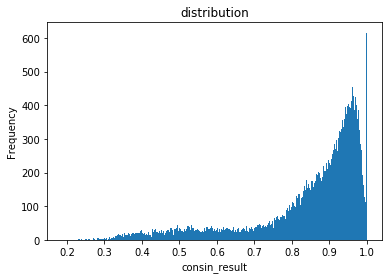

In [20]:
from matplotlib import pyplot
pyplot.hist(np.array(list_consin_result), 1000)
pyplot.xlabel('consin_result')
pyplot.ylabel('Frequency')
pyplot.title('distribution')
pyplot.show()

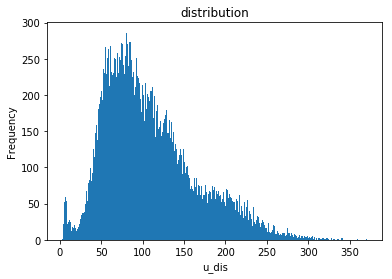

In [10]:
pyplot.hist(np.array(list_u_dis), 1000)
pyplot.xlabel('u_dis')
pyplot.ylabel('Frequency')
pyplot.title('distribution')
pyplot.show()